# **Análise de sentimentos em viagens aéreas**



Este projeto tem como objetivo desenvolver um sistema de análise de sentimentos a partir dos reviews de passageiros. A proposta é utilizar técnicas de processamento de linguagem natural para classificar as opiniões dos clientes, permitindo que as companhias aéreas compreendam melhor os pontos positivos e negativos destacados pelos passageiros. Dessa forma, será possível identificar áreas críticas que necessitam de melhorias, com o intuito de aprimorar a experiência do cliente e otimizar os serviços oferecidos.

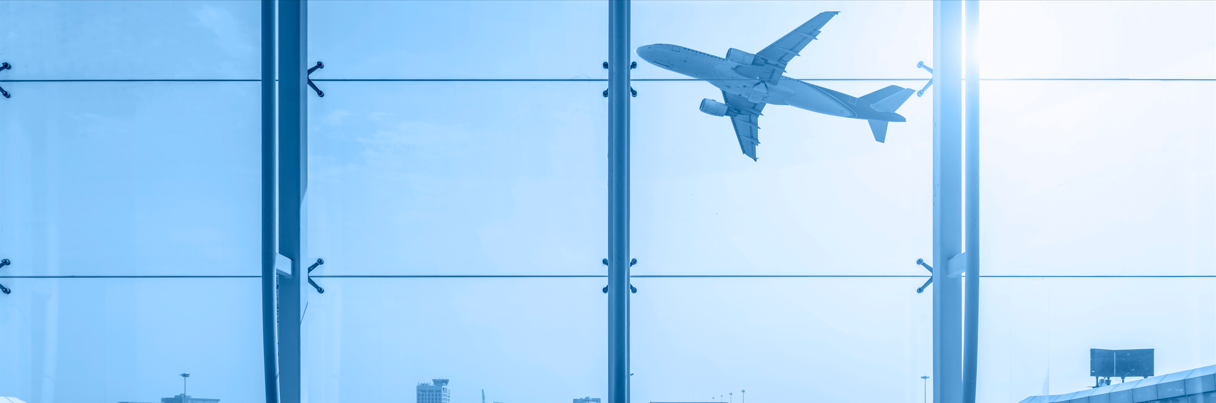

## **Etapas do Projeto**

**1. Processamento de dados:**

Inicialmente, será realizado um processo de verificação dos dados para identificar a presença de valores faltantes ou duplicados. Essa etapa é fundamental para garantir a qualidade e integridade do conjunto de dados.

**2. Pré-processamento de texto:**

Em seguida, serão aplicadas as etapas padrão de Processamento de Linguagem Natural (NLP) nas colunas "Review" e "Review_title". Isso inclui técnicas como tokenização, remoção de stop-words, e outras transformações necessárias para preparar os dados para a análise de sentimentos.

**3. Exploração dos dados:**

Será realizada uma análise exploratória para compreender melhor as distribuições das variáveis. Isso inclui a criação de gráficos para examinar a distribuição da feature "Overall_rating" entre as diferentes companhias aéreas, além de realizar um gráfico semelhante para verificar a distribuição dessa mesma feature em relação aos modelos de aeronaves (Aircraft).

**4. Análise de nuvem de palavras:**
Através de uma visualização de nuvem de palavras, será possível investigar quais palavras mais frequentemente aparecem em reviews com "Overall_rating" inferior ou igual a 3 e com "Overall_rating" superior ou igual a 8, proporcionando uma análise qualitativa dos sentimentos expressos nos textos.

**5. Estudo de correlação:**

Será feita uma análise da correlação entre as colunas que contêm notas separadas, como 'Seat Comfort', 'Cabin Staff Service', 'Food & Beverages', 'Ground Service', 'Inflight Entertainment' e 'Wifi & Connectivity'. O objetivo é entender o impacto dessas variáveis na nota final (Overall_rating), para identificar possíveis fatores que influenciem a avaliação geral.

**6. Classificação de sentimentos:**

Utilizando um critério específico, serão classificados os sentimentos dos reviews como positivo, negativo ou neutro. Esse critério será baseado nas notas finais, onde:

- Nota menor que 4: Negativo

- Nota entre 4 e 7: Neutro

- Nota maior que 7: Positivo

A partir disso, dois modelos de classificação de sentimentos serão desenvolvidos. O primeiro utilizará os textos das colunas "Review" e "Review_title" como entradas, enquanto o segundo usará as notas das features separadas. Ambos os modelos serão comparados para avaliar qual abordagem se mostra mais eficaz.

**7. Análise de impacto no NPS:**

Com base no modelo de classificação de sentimentos, será realizada uma análise para investigar o impacto dos atrasos de viagem no Net Promoter Score (NPS) de três companhias aéreas. O NPS será calculado como a diferença entre a porcentagem de avaliações positivas e negativas, com o objetivo de entender como os atrasos influenciam a percepção dos clientes.

## Processamento de dados

### Leitura dos dados

O primeiro passo a ser feito é realizar a leitura dos dados, a partir do arquivo CSV, extraído a partir do site https://www.airlinequality.com/.

In [ ]:
import pandas as pd
import warnings

warnings.filterwarnings('ignore')

In [ ]:
# url = 'https://raw.githubusercontent.com/Joaovmir/analise_sentimentos_airline/refs/heads/main/dados/Travel_Chalenge.csv'

# dados = pd.read_csv(url, sep = ';')

dados = pd.read_csv('/content/Travel_Chalenge.csv', sep = ';')

Depois de realizar a leitura dos dados, podemos realizar a exploração dos dados, vamos identificar:
- Quantidade de registros
- Quantidade de colunas
- Nomes das colunas
- Quantidade de dados não nulos
- Tipos das colunas

In [ ]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17702 entries, 0 to 17701
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Airline Name            17702 non-null  object 
 1   Overall_Rating          17702 non-null  object 
 2   Review_Title            17702 non-null  object 
 3   Review Date             17702 non-null  object 
 4   Review                  17702 non-null  object 
 5   Aircraft                5665 non-null   object 
 6   Type Of Traveller       15953 non-null  object 
 7   Seat Type               17461 non-null  object 
 8   Route                   15876 non-null  object 
 9   Date Flown              15944 non-null  object 
 10  Seat Comfort            15456 non-null  float64
 11  Cabin Staff Service     15366 non-null  float64
 12  Food & Beverages        11924 non-null  float64
 13  Ground Service          15056 non-null  float64
 14  Inflight Entertainment  9231 non-null 

A base de dados possui **17702** registros em um total de **16** colunas.

A partir do nome das colunas, podemos inferir o seu conteúdo:

- Airline Name: Nome da companhia aérea
- Overall_Rating: Nota geral
- Review_Title: Título da análise
- Review Date: Data da análise
- Review: Análise textual do passageiro
- Aircraft: Modelo da aeronave
- Type Of Traveller: Categoria de tripulante
- Seat Type: Categoria do assento
- Route: Rota de voo
- Date Flown: Data do voo
- Seat Comfort: Conforto do assento
- Cabin Staff Service: Serviço da equipe de bordo
- Food & Beverages: Comidas e bebidas
- Ground Service: Serviço no solo
- Inflight Entertainment: Entretenimento no voo
- Wifi & Connectivity: Conectividade e Wifi

Muitas colunas possuem dados nulos, como pode ser observado pela diferença entre a quantidade de registros da base de dados pela quantidade de dados não-nulos de cada coluna.

A maior parte das colunas é do tipo textual e a outra parte é de colunas numéricas, do tipo decimal. Algumas colunas não parecem condizer com o tipo correto, como Overall_Rating que é uma nota mas está tratada como texto. Além disso, as colunas Review Date e Date Flown não estão formatadas como datas.

Vamos visualizar de forma rápida a base de dados para obter alguns insights.

In [ ]:
dados.head()

Airline Name Overall_Rating  \
0         Air Seychelles              8   
1                CityJet              1   
2      Shanghai Airlines              9   
3  Aerolineas Argentinas              8   
4          Adria Airways              7   

                            Review_Title      Review Date  \
0         Air Seychelles customer review  10th April 2011   
1                CityJet customer review  10th April 2011   
2      Shanghai Airlines customer review  10th April 2012   
3  Aerolineas Argentinas customer review  10th April 2014   
4          Adria Airways customer review  10th April 2015   

                                              Review Aircraft  \
0  LHR-SEZ-LHR. It's true that there aren't perso...      NaN   
1  London City to Antwerp was delayed 3 hours 40 ...      NaN   
2  PEK to HGH in Economy. Slight delay out of PEK...      NaN   
3  Rio to Buenos Aires AEP on 737. Departure dela...      NaN   
4  Outbound flight FRA/PRN A319. 2 hours 10 min f...      NaN   

  Type Of Traveller      Seat Type Route Date Flown  Seat Comfort  \
0               NaN  Economy Class   NaN        NaN           NaN   
1               NaN  Economy Class   NaN        NaN           NaN   
2               NaN  Economy Class   NaN        NaN           3.0   
3               NaN  Economy Class   NaN        NaN           3.0   
4               NaN  Economy Class   NaN        NaN           4.0   

   Cabin Staff Service  Food & Beverages  Ground Service  \
0                  NaN               NaN             NaN   
1                  NaN               NaN             NaN   
2                  4.0               4.0             NaN   
3                  4.0               0.0             NaN   
4                  4.0               4.0             NaN   

   Inflight Entertainment  Wifi & Connectivity  
0                     NaN                  NaN  
1                     NaN                  NaN  
2                     2.0                  NaN  
3                     0.0                  NaN  
4                     0.0                  NaN

A partir da visão geral, já é possível perceber a presença de dados nulos ao longo das colunas, a data em formato de texto por escrito e a coluna Overall_Rating com números, porém em formato de texto.

Vamos começar o tratamento dos dados a partir da detecção de registros duplicados.

### Dados duplicados

Caso algum registro possua todas as informações iguais a de um outro registro, é tratado como valor duplicado e precisa ser removido. Vamos verificar se há algum registro duplicado e, caso tenha, vamos observar esses registros na base de dados.

In [ ]:
print(f'Quantidade de registros duplicados: {dados.duplicated().sum()}')

Quantidade de registros duplicados: 29


Existem 29 registros duplicados, vamos observá-los.

In [ ]:
dados[dados.duplicated(keep=False)]

Airline Name Overall_Rating                   Review_Title  \
513    Edelweiss Air              n  Edelweiss Air customer review   
514    Edelweiss Air              n  Edelweiss Air customer review   
515           Kulula              n         Kulula customer review   
516           Kulula              n         Kulula customer review   
1064          Luxair              n         Luxair customer review   
1065          Luxair              n         Luxair customer review   
1351          Luxair              4         Luxair customer review   
1352          Luxair              4         Luxair customer review   
1548          Kulula              n         Kulula customer review   
1549          Kulula              n         Kulula customer review   
2033          Luxair              n         Luxair customer review   
2034          Luxair              n         Luxair customer review   
2073          Luxair              n         Luxair customer review   
2074          Luxair              n         Luxair customer review   
2903          Luxair              n         Luxair customer review   
2904          Luxair              n         Luxair customer review   
3177          Kulula              n         Kulula customer review   
3178          Kulula              n         Kulula customer review   
4440          Luxair              n         Luxair customer review   
4441          Luxair              n         Luxair customer review   
4754   Edelweiss Air              n  Edelweiss Air customer review   
4755   Edelweiss Air              n  Edelweiss Air customer review   
5910          Luxair              n         Luxair customer review   
5911          Luxair              n         Luxair customer review   
6238          Luxair              n         Luxair customer review   
6239          Luxair              n         Luxair customer review   
8015          Luxair              n         Luxair customer review   
8016          Luxair              n         Luxair customer review   
8135          Kulula              n         Kulula customer review   
8136          Kulula              n         Kulula customer review   
8767          Kulula              n         Kulula customer review   
8768          Kulula              n         Kulula customer review   
9189          Luxair              n         Luxair customer review   
9190          Luxair              n         Luxair customer review   
10447         Luxair              n         Luxair customer review   
10448         Luxair              n         Luxair customer review   
11179  Edelweiss Air              n  Edelweiss Air customer review   
11180  Edelweiss Air              n  Edelweiss Air customer review   
11181         Kulula              n         Kulula customer review   
11182         Kulula              n         Kulula customer review   
11394  Edelweiss Air              n  Edelweiss Air customer review   
11395  Edelweiss Air              n  Edelweiss Air customer review   
12190         Luxair              5         Luxair customer review   
12191         Luxair              5         Luxair customer review   
12446         Luxair              n         Luxair customer review   
12447         Luxair              n         Luxair customer review   
12830         Luxair              n         Luxair customer review   
12831         Luxair              n         Luxair customer review   
13161  Edelweiss Air              n  Edelweiss Air customer review   
13162  Edelweiss Air              n  Edelweiss Air customer review   
14072         Luxair              n         Luxair customer review   
14073         Luxair              n         Luxair customer review   
14938         Luxair              n         Luxair customer review   
14939         Luxair              n         Luxair customer review   
17460         Kulula              n         Kulula customer review   
17461         Kulula              n         Kulula customer review   
17543         Luxa

Além de serem informações duplicadas, estão com a presença muito grande de dados nulos. Inclusive a coluna Overall_Rating possui valores de texto escrito "n", que não pode ser interpretada como uma nota. Vamos remover os dados duplicados e utilizar essa informação para tratar essa coluna posteriormente.

In [ ]:
dados.drop_duplicates(inplace = True, ignore_index = True)

### Tratamento de dados nulos

Vamos realizar a identificação de dados nulos em cada uma das colunas, observando a quantidade e também o percentual.

In [ ]:
print("Dados faltantes por coluna:")
print(dados.isnull().sum())

Dados faltantes por coluna:
Airline Name                  0
Overall_Rating                0
Review_Title                  0
Review Date                   0
Review                        0
Aircraft                  12008
Type Of Traveller          1720
Seat Type                   212
Route                      1797
Date Flown                 1729
Seat Comfort               2217
Cabin Staff Service        2307
Food & Beverages           5749
Ground Service             2617
Inflight Entertainment     8442
Wifi & Connectivity       12430
dtype: int64


In [ ]:
print("Percentual de dados faltantes por coluna:")
print((dados.isnull().sum()/dados.shape[0]*100).round(2))

Percentual de dados faltantes por coluna:
Airline Name               0.00
Overall_Rating             0.00
Review_Title               0.00
Review Date                0.00
Review                     0.00
Aircraft                  67.95
Type Of Traveller          9.73
Seat Type                  1.20
Route                     10.17
Date Flown                 9.78
Seat Comfort              12.54
Cabin Staff Service       13.05
Food & Beverages          32.53
Ground Service            14.81
Inflight Entertainment    47.77
Wifi & Connectivity       70.33
dtype: float64


Notamos uma presença muito grande de dados nulos e precisamos tratar caso a caso, de acordo com a coluna. Alguns dados nulos podem passar despercebidos, com textos vazios ou caracteres que indicam que o texto esteja vazio. Por conta disso, vamos explorar inclusive as colunas que estão com percentual 0 de dados nulos, já que foi observado na coluna Overall_Ratinb um texto "n".

### Coluna Airline Name

Para explorar cada coluna, vamos utilizar a estratégia dos valores únicos/quantidade de valores por categoria, já que nos ajuda a visualizar cada uma das informações de forma mais rápida do que registro por registro da base de dados.

In [ ]:
dados['Airline Name'].unique()

array(['Air Seychelles', 'CityJet', 'Shanghai Airlines',
       'Aerolineas Argentinas', 'Adria Airways', 'QantasLink',
       'Cubana Airlines', 'SilkAir', 'Air Berlin', 'Monarch Airlines',
       'Air Malta', 'Air Arabia', 'Air China', 'Air Tahiti Nui',
       'Blue Air', 'Edelweiss Air', 'Kulula', 'AirAsia Philippines',
       'EVA Air', 'Oman Air', 'Japan Airlines', 'Kenya Airways',
       'ITA Airways', 'Silver Airways', 'Sun Country Airlines',
       'Air France', 'Breeze Airways', 'British Airways',
       'China Airlines', 'Flair Airlines', 'French Bee',
       'KLM Royal Dutch Airlines', 'Malaysia Airlines', 'Nok Air',
       'Porter Airlines', 'Qatar Airways', 'Ryanair',
       'Sky Express Airlines', 'Turkish Airlines', 'Lao Airlines',
       'Olympic Air', 'US Airways', 'South African Airways',
       'Aeroflot Russian Airlines', 'AirAsia India', 'CSA Czech Airlines',
       'Malindo Air', 'SmartWings', 'Thai Lion Air', 'Norwegian',
       'Transavia', 'VivaAerobús', 'Air S

In [ ]:
dados['Airline Name'].value_counts()

Airline Name
CityJet                  100
Aerolineas Argentinas    100
QantasLink               100
Air Berlin               100
SilkAir                  100
                        ... 
Shanghai Airlines         72
Lao Airlines              72
Uzbekistan Airways        72
BA CityFlyer              72
Luxair                    69
Name: count, Length: 182, dtype: int64

A coluna Airline Name não parece apresentar nenhuma inconsistência. Possui valores únicos bem distribuídos.

### Coluna Overall_Rating

In [ ]:
dados['Overall_Rating'].unique()

array(['8', '1', '9', '7', '2', '3', '6', '5', '4', 'n'], dtype=object)

In [ ]:
dados['Overall_Rating'].value_counts()

Overall_Rating
1    9370
2    1873
9    1293
8    1252
3    1047
7     840
4     606
5     600
6     487
n     305
Name: count, dtype: int64

Como já observamos anteriormente, o caractere n representa uma inconsistência na coluna Overall_Rating. Por ser uma coluna muito importante para a solução do problema, vamos remover os registros que estiverem com o valor n para não prejudicar a interpretação da coluna, além desses valores representar um percentual muito pequeno em relação a quantidade de registros dessa coluna.

In [ ]:
dados = dados[dados['Overall_Rating'] != 'n']

In [ ]:
dados['Overall_Rating'] = dados['Overall_Rating'].astype('float')

In [ ]:
dados['Overall_Rating'].value_counts()

Overall_Rating
1.0    9370
2.0    1873
9.0    1293
8.0    1252
3.0    1047
7.0     840
4.0     606
5.0     600
6.0     487
Name: count, dtype: int64

Agora podemos prosseguir com outros tratamentos.

### Coluna Review_Title

A coluna Review_Title não possui dados nulos. Vamos explorar seus valores únicos.

In [ ]:
dados['Review_Title'].unique()

array(['Air Seychelles customer review', 'CityJet customer review',
       'Shanghai Airlines customer review', ...,
       '"No proper customer care"',
       '"cabin luggage policy is disappointing"',
       '"be more friendly with the passengers"'], dtype=object)

Por se tratar de um título deixado por cada passageiro, há uma variação muito grande e não é possível visualizar todos os valores únicos. Por se tratar de um texto, pode ser que algum valor nulo pode estar com um texto em branco ou caractere especial que represente um valor nulo. Vamos buscar esses registros.

In [ ]:
dados[dados['Review_Title'].isin(['""', "''", ' ', '-'])]

Airline Name  Overall_Rating Review_Title          Review Date  \
4578     Blue Air             1.0           ""  17th September 2018   

                                                 Review Aircraft  \
4578    Rome to Bucharest. The flight was delayed an...      NaN   

     Type Of Traveller      Seat Type              Route      Date Flown  \
4578    Couple Leisure  Economy Class  Rome to Bucharest  September 2018   

      Seat Comfort  Cabin Staff Service  Food & Beverages  Ground Service  \
4578           3.0                  3.0               NaN             1.0   

      Inflight Entertainment  Wifi & Connectivity  
4578                     NaN                  NaN

Identificamos um registro de título nulo. Vamos ver a ideia geral da Review e colocar o título como sendo um resumo dessa ideia.

In [ ]:
dados.loc[4578, 'Review']

'  Rome to Bucharest. The flight was delayed and we were waiting in the queue for more than an hour as per the boarding time shown in the screen. When I asked about the delay and told the lady (who came 45 minutes late), she was very rude and told me to sit down and "stand up" when I hear the announcement. There were no apology or anything about the delayed flight. I am currently waiting in the queue, still there is no announcement.'

A review trata principalmente em relação a um atraso no voo, vamos registrar isso no título da análise.

In [ ]:
dados.loc[4578, 'Review_Title'] = 'Delayed flight'

In [ ]:
dados.loc[4578]

Airline Name                                                       Blue Air
Overall_Rating                                                          1.0
Review_Title                                                 Delayed flight
Review Date                                             17th September 2018
Review                      Rome to Bucharest. The flight was delayed an...
Aircraft                                                                NaN
Type Of Traveller                                            Couple Leisure
Seat Type                                                     Economy Class
Route                                                     Rome to Bucharest
Date Flown                                                   September 2018
Seat Comfort                                                            3.0
Cabin Staff Service                                                     3.0
Food & Beverages                                                        NaN
Ground Service                                                          1.0
Inflight Entertainment                                                  NaN
Wifi & Connectivity                                                     NaN
Name: 4578, dtype: object

### Coluna Review

A coluna Review também não possui nenhum valor nulo aparente. Vamos explorar possíveis textos em branco.

In [ ]:
dados[dados['Review'].isin(['""', "''", ' ', '-'])]

Empty DataFrame
Columns: [Airline Name, Overall_Rating, Review_Title, Review Date, Review, Aircraft, Type Of Traveller, Seat Type, Route, Date Flown, Seat Comfort, Cabin Staff Service, Food & Beverages, Ground Service, Inflight Entertainment, Wifi & Connectivity]
Index: []

A coluna não apresenta nenhuma informação em branco. Vamos prosseguir com as outras colunas.

### Coluna Aircraft

In [ ]:
dados['Aircraft'].unique()

array([nan, 'A320', 'A340-300', 'Boeing 738', 'Boeing 777-300',
       'Boeing 777-200', 'Boeing 777', 'Boeing 737 800', 'A350-1000',
       'Boeing 737', 'DHC-8-400', 'A320, Dash 400', 'Boeing 747',
       'Boeing 737-900', 'Boeing 787', 'ATR 42', 'A330-300', '787',
       'A320-200', 'Dreamliner', 'A319', 'A319-100', 'Boeing 777-300ER',
       'A321', 'A330-200', 'A330', 'A330-300, A321', 'Boeing 767-300ER',
       'A330, Boeing 787', 'Boeing 787 / A330', 'Boeing 737-800',
       'A320neo', 'A340', 'Boeing 757-200', 'Boeing 737-800 NG', 'B304',
       'Boeing 787 / 737', 'Boeing 787 / 767-300', 'A220-300 / E190',
       'A350', 'Boeing 787 / A320', 'Boeing 767-300', 'CRJ700',
       'Boeing 747-8', 'A320NEO', 'Boeing 757', 'A359', 'A350-900',
       'embraer', 'Boeing 737 Max 8', 'B74', 'Boeing 787-9',
       'Boeing 787 ', 'A320 neo', 'Boeing 737-700', 'Boeing 737 / 787',
       'Dash8 / A220', 'A321 neo', 'Boeing 788, Boeing 738',
       'Boeing 737-800 / 787', 'ERJ-145',
       'A

A coluna Aircraft está com muitos problemas. Além de 67.95%, que corresponde a 12008 registros serem nulos, a coluna ainda possui muita variação de tipos de aeronave, escritas por extenso pelos passageiros.

Estamos visualizando apenas registros únicos, então cada um destes textos pode estar presente mais de uma vez na base de dados. Ainda assim, há muitos tipos de aeronave que estão representadas por textos diferentes.

Há ainda informações prejudicando a análise, como 'who cares', 'don't know', '?' e erros de digitação como "Boing". Vamos realizar um processo de tratamento no texto para resumir os tipos de aeronave dentre as principais utilizadas pelas empresas.

A partir de uma pesquisa pela internet (https://www.nordinvestimentos.com.br/blog/top-10-maiores-fabricantes-de-avioes-do-mundo/), é possível identificar as principais aeronaves em circulação e praticamente todas elas estão descritas de alguma forma na coluna Aircraft, como A320 e Boeing 737.

In [ ]:
dados['Aircraft'] = dados['Aircraft'].fillna('unknown')
dados['Aircraft'] = dados['Aircraft'].astype(str).str.lower().str.strip()

In [ ]:
def simplificar_nome_aeronave(texto):
    if texto in ['nan', 'unknown', '?', '-', 'who cares', 'don’t know', 'not applicable']:
        return 'unknown'

    texto = texto.lower()

    mapeamento = {
        'a320': 'airbus a320',
        'a321': 'airbus a321',
        'a319': 'airbus a319',
        'a350': 'airbus a350',
        'a330': 'airbus a330',
        'a380': 'airbus a380',
        '737': 'boeing 737',
        '747': 'boeing 747',
        '757': 'boeing 757',
        '767': 'boeing 767',
        '777': 'boeing 777',
        '787': 'boeing 787',
        'dreamliner': 'boeing 787',
        'embraer': 'embraer',
        'erj': 'embraer',
        'atr': 'atr',
        'dash': 'dash 8',
        'dhc': 'dash 8',
        'crj': 'crj',
        'fokker': 'fokker',
        'saab': 'saab'
    }

    for chave, nome in mapeamento.items():
        if chave in texto:
            return nome

    return 'other'

In [ ]:
dados['Aircraft_simplificado'] = dados['Aircraft'].apply(simplificar_nome_aeronave)

In [ ]:
dados['Aircraft_simplificado'].value_counts()

Aircraft_simplificado
unknown        11713
airbus a320     1067
boeing 737      1053
boeing 787       653
airbus a330      596
other            474
boeing 777       437
airbus a321      349
airbus a350      270
airbus a319      202
airbus a380      101
atr               98
boeing 767        90
embraer           84
boeing 757        54
dash 8            46
boeing 747        41
crj               24
saab              10
fokker             6
Name: count, dtype: int64

Agora temos uma categorização mais limpa e mais fácil de identificar cada tipo de aeronave. Essa categorização pode ser mais simplória do que a informação real da base de dados, mas pode nos trazer mais clareza ao analisar as notas de cada modelo de aeronave.

### Coluna Type Of Traveller

A coluna Type Of Traveller não será utilizada diretamente no modelo de análise de sentimento, mas por possuir um percentual baixo de dados nulos, podemos realizar o tratamento com substituição pela moda (valor mais frequente).

In [ ]:
dados['Type Of Traveller'].unique()

array([nan, 'Family Leisure', 'Couple Leisure', 'Solo Leisure',
       'Business'], dtype=object)

In [ ]:
dados['Type Of Traveller'].value_counts(dropna=False)

Type Of Traveller
Solo Leisure      5780
Couple Leisure    4334
Family Leisure    3668
Business          2171
NaN               1415
Name: count, dtype: int64

In [ ]:
dados['Type Of Traveller'] = dados['Type Of Traveller'].fillna('Solo Leisure')

In [ ]:
dados['Type Of Traveller'].value_counts(dropna=False)

Type Of Traveller
Solo Leisure      7195
Couple Leisure    4334
Family Leisure    3668
Business          2171
Name: count, dtype: int64

### Coluna Seat Type

O mesmo tratamento pode ser feito na coluna Seat Type, vamos substituir os valores nulos pelo valor mais frequente. Essa coluna também não será utilizada no modelo de análise de sentimentos.

In [ ]:
dados['Seat Type'].unique()

array(['Economy Class', 'Business Class', 'Premium Economy',
       'First Class', nan], dtype=object)

In [ ]:
dados['Seat Type'].value_counts(dropna=False)

Seat Type
Economy Class      14786
Business Class      1728
Premium Economy      582
First Class          154
NaN                  118
Name: count, dtype: int64

In [ ]:
dados['Seat Type'] = dados['Seat Type'].fillna('Economy Class')

In [ ]:
dados['Seat Type'].value_counts(dropna=False)

Seat Type
Economy Class      14904
Business Class      1728
Premium Economy      582
First Class          154
Name: count, dtype: int64

### Coluna Route

A coluna Route também não será utilizada no modelo de análise de sentimento. Mas vamos analisá-la rapidamente.

In [ ]:
dados['Route'].unique()

array([nan, 'VRA to YYZ', 'SIN to KMG', ..., 'Berlin to Warsaw via Delhi',
       'Toulouse to Strasbourg', 'Asturias to Malaga'], dtype=object)

In [ ]:
dados['Route'].value_counts(dropna=False)

Route
NaN                              1492
Melbourne to Sydney                38
Sydney to Melbourne                31
Bangkok to Phuket                  28
Kuala Lumpur to Singapore          27
                                 ... 
İstanbul to Sharja                  1
Hanoi to Paris                      1
Houston to Monterrey                1
Calgary to Zagreb via Toronto       1
NAN to LBS via SUV                  1
Name: count, Length: 11295, dtype: int64

Há muita variabilidade nas rotas, uma vez que cada passageiro terá uma partida e destino diferentes. A presença de dados nulos é muito grande e talvez tenha alguma informação na avaliação do passageiro.

In [ ]:
dados[dados['Route'].isna()].loc[:,['Review', 'Route']]

Review Route
0      LHR-SEZ-LHR. It's true that there aren't perso...   NaN
1      London City to Antwerp was delayed 3 hours 40 ...   NaN
2      PEK to HGH in Economy. Slight delay out of PEK...   NaN
3      Rio to Buenos Aires AEP on 737. Departure dela...   NaN
4      Outbound flight FRA/PRN A319. 2 hours 10 min f...   NaN
...                                                  ...   ...
17601  BKK-TAS. Plane interior was yellow with age an...   NaN
17643  After defunct Mexicana left us high and dry in...   NaN
17644  LHR-CGN-LHR. An excellent flight for a busines...   NaN
17645  Flew on a charter from Gatwick to Verona on an...   NaN
17646  EDI-LCY on 31/08/14 and LCY-EDI on 03/09/14. T...   NaN

[1492 rows x 2 columns]

Analisando a coluna de Reviews, é possível perceber que muitos passageiros inserem a rota logo no início da análise. Poderíamos utilizar essa informação de texto para preencher valores faltantes da coluna Route.

Porém, a coluna Route não será utilizada na análise de sentimentos e portanto não será feito o tratamento desta coluna.

Além disso, caso seja relevante, o modelo de análise de sentimentos irá utilizar esse texto como fonte de informação durante a análise do texto da review.

### Coluna Date Flown

A coluna de data do voo também não será utilizada no modelo de análise de sentimentos.

In [ ]:
dados['Date Flown'].unique()

array([nan, 'April 2016', 'December 2015', 'April 2017', 'March 2017',
       'March 2018', 'December 2018', 'April 2019', 'April 2020',
       'November 2019', 'March 2020', 'April 2021', 'December 2021',
       'April 2022', 'February 2023', 'April 2023', 'December 2022',
       'July 2015', 'August 2015', 'August 2017', 'July 2017',
       'June 2019', 'August 2019', 'July 2019', 'August 2020',
       'July 2020', 'June 2021', 'August 2021', 'August 2022',
       'July 2022', 'November 2015', 'December 2016', 'November 2016',
       'January 2017', 'December 2017', 'June 2018', 'November 2018',
       'December 2019', 'September 2019', 'December 2020', 'October 2020',
       'October 2022', 'November 2022', 'February 2016', 'September 2016',
       'February 2018', 'February 2019', 'February 2020', 'January 2020',
       'March 2019', 'November 2020', 'February 2021', 'February 2022',
       'January 2023', 'January 2016', 'January 2019', 'August 2018',
       'October 2019', 'Janua

In [ ]:
dados['Date Flown'].value_counts(dropna=False)

Date Flown
NaN              1424
June 2023         998
July 2023         764
May 2023          729
April 2023        641
                 ... 
December 2014       2
April 2015          2
August 2014         2
November 2014       1
August 2023         1
Name: count, Length: 109, dtype: int64

In [ ]:
dados[['Date Flown', 'Review Date']]

Date Flown         Review Date
0                 NaN     10th April 2011
1                 NaN     10th April 2011
2                 NaN     10th April 2012
3                 NaN     10th April 2014
4                 NaN     10th April 2015
...               ...                 ...
17668  September 2022  9th September 2022
17669  September 2022  9th September 2022
17670       July 2022  9th September 2022
17671   December 2021  9th September 2022
17672       June 2022  9th September 2022

[17368 rows x 2 columns]

Existe uma grande quantidade de dados nulos na coluna da data de voo. Porém não vamos remover ou realizar tratamentos nesta coluna porque ela não será utilizada na análise de sentimentos.

Um possível tratamento é utilizar o mês da data da review para preencher os valores faltantes.

### Coluna Seat Comfort

Agora podemos iniciar a exploração de dados nulos das colunas numéricas da base de dados. Vamos iniciar pela coluna de conforto do assento.

In [ ]:
dados['Seat Comfort'].unique()

array([nan,  3.,  4.,  0.,  2.,  1.,  5.])

In [ ]:
dados['Seat Comfort'].value_counts(dropna=False)

Seat Comfort
1.0    5234
3.0    2911
4.0    2629
2.0    2358
5.0    2139
NaN    2052
0.0      45
Name: count, dtype: int64

Podemos utilizar diferentes estratégias para o tratamento desta coluna:

- Remover registros nulos
- Preencher dados nulos pelo valor mais frequente
- Preencher dados nulos com valor intermediário (média/mediana)

Por enquanto, vamos analisar as outras colunas numéricas para tomar a decisão final.

### Coluna Cabin Staff Service

In [ ]:
dados['Cabin Staff Service'].unique()

array([nan,  4.,  0.,  3.,  1.,  5.,  2.])

In [ ]:
dados['Cabin Staff Service'].value_counts(dropna=False)

Cabin Staff Service
1.0    4877
5.0    3714
3.0    2334
4.0    2314
NaN    2142
2.0    1947
0.0      40
Name: count, dtype: int64

### Coluna Food & Beverages

In [ ]:
dados['Food & Beverages'].unique()

array([nan,  4.,  0.,  3.,  1.,  5.,  2.])

In [ ]:
dados['Food & Beverages'].value_counts(dropna=False)

Food & Beverages
NaN    5584
1.0    4406
3.0    1965
4.0    1869
5.0    1806
2.0    1649
0.0      89
Name: count, dtype: int64

### Coluna Ground Service

In [ ]:
dados['Ground Service'].unique()

array([nan,  2.,  5.,  1.,  3.,  4.])

In [ ]:
dados['Ground Service'].value_counts(dropna=False)

Ground Service
1.0    7861
5.0    2558
NaN    2312
4.0    1856
3.0    1450
2.0    1331
Name: count, dtype: int64

### Coluna Inflight Entertainment

In [ ]:
dados['Inflight Entertainment'].unique()

array([nan,  2.,  0.,  1.,  4.,  5.,  3.])

In [ ]:
dados['Inflight Entertainment'].value_counts(dropna=False)

Inflight Entertainment
NaN    8276
1.0    4024
3.0    1489
4.0    1180
2.0    1110
5.0    1038
0.0     251
Name: count, dtype: int64

### Coluna Wifi & Connectivity

In [ ]:
dados['Wifi & Connectivity'].unique()

array([nan,  2.,  1.,  3.,  5.,  4.,  0.])

In [ ]:
dados['Wifi & Connectivity'].value_counts(dropna=False)

Wifi & Connectivity
NaN    12125
1.0     3547
3.0      444
2.0      441
5.0      441
4.0      369
0.0        1
Name: count, dtype: int64

Analisando cada uma das colunas numéricas, podemos perceber que a presença de dados nulos é muito alta, principalmente nas colunas Wifi & Connectivity, Inflight Entertainment e Food & Beverages.

Caso optemos por remover os dados nulos, a base de dados iria perder muita informação relevante de outras colunas, uma vez que quando um dos registros de uma coluna é nulo, não quer dizer que outra coluna também tenha um dado nulo. Então na união dessas remoções, podemos ficar com uma base de dados muito enxuta, e que pode fazer o modelo interpretar os dados de forma diferente da realidade.

Preencher os valores com dados como valor mais frequente ou média/mediana também pode fazer com que o modelo interprete as informações de forma irreal, principalmente em colunas como Wifi que possui mais de 70% de dados nulos.

Aqui, vamos utilizar diferentes estratégias para o tratamento dos dados nulos, ramificando as possibilidades e criando modelos diferentes para cada abordagem, comparando os resultados e escolhendo aquele que tenha um desempenho melhor dentro de algo que faça sentido (sem prejudicar a interpretação do modelo ao inferir informações demais).

Vamos realizar as ramificações e tratamentos dos dados nulos das colunas numéricas quando iniciarmos a etapa de treinamento do modelo:

- Tratamento 1: Removendo totalmente os dados nulos
- Tratamento 2: Substituindo nulos pelo valor mais frequente. Todos os valores mais frequentes das variáveis são iguais a 1.

### Remoção de features

Avaliando o escopo deste projeto para a análise de sentimentos, algumas features não serão utilizadas na análise e portanto serão removidas. São elas:

- Review Date: Data da review do cliente
- Type Of Traveller: Tipo do passageiro
- Seat Type: Tipo do assento
- Route: Rota da viagem
- Date Flown: Data do voo

In [ ]:
dados.drop(['Review Date', 'Type Of Traveller', 'Seat Type', 'Route', 'Date Flown'], axis = 1, inplace = True)

## Pré-processamento de texto

Agora vamos realizar o processo de pré-processamento de texto, transformando todo o texto para letras minúsculas, remover pontuações, caracteres especiais, números e palavras que são muito frequentes mas que não trazem significado ao texto, que são as stop_words.

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('punkt_tab')
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


In [ ]:
stop_words = set(stopwords.words('english'))

Depois de carregar as bibliotecas e inicializar as stop_words, vamos processar o texto e criar os tokens que serão usados para o modelo de classificação.

In [ ]:
import re

In [ ]:
def preprocessamento_texto(texto):

    texto = texto.lower()
    texto = re.sub(r'[^a-z\s]', '', texto)
    tokens = word_tokenize(texto)
    tokens = [palavra for palavra in tokens if palavra not in stop_words]
    return ' '.join(tokens)

dados['Review completa'] = dados['Review_Title'] + ' ' + dados['Review']
dados['Review processada'] = dados['Review completa'].apply(preprocessamento_texto)

In [ ]:
dados['Review processada']

0        air seychelles customer review lhrsezlhr true ...
1        cityjet customer review london city antwerp de...
2        shanghai airlines customer review pek hgh econ...
3        aerolineas argentinas customer review rio buen...
4        adria airways customer review outbound flight ...
                               ...                        
17668    denied provide lounge access poor service leav...
17669    kg extra told cough sydney gold coast please a...
17670    proper customer care berlin warsaw via delhi t...
17671    cabin luggage policy disappointing volotea nic...
17672    friendly passengers ladies staff land airport ...
Name: Review processada, Length: 17368, dtype: object

Podemos utilizar uma segunda abordagem, que é um pouco mais sofisticada e extrai o significado geral da palavra com uso da lematização. Vamos armazenar em uma coluna separada na base de dados para que seja possível comparar os resultados de um modelo com tokens de palavras e outro com tokens lematizados.

In [ ]:
!pip install spacy
!python -m spacy download en_core_web_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 84.8 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [ ]:
import spacy

In [ ]:
modelo = spacy.load('en_core_web_sm')

In [ ]:
def lematizar_texto(texto):
    texto = texto.lower()
    texto = re.sub(r'[^a-z\s]', '', texto)
    documento = modelo(texto)
    return ' '.join([token.lemma_ for token in documento])

dados['Review lematizada'] = dados['Review completa'].apply(lematizar_texto)

In [ ]:
dados['Review lematizada']

0        air seychelle customer review lhrsezlhr its tr...
1        cityjet customer review london city to antwerp...
2        shanghai airlines customer review pek to hgh i...
3        aerolineas argentinas customer review rio to b...
4        adria airways customer review outbound flight ...
                               ...                        
17668    deny to provide lounge access   very poor serv...
17669    kg extra and tell I to cough up    sydney to g...
17670    no proper customer care   berlin to warsaw via...
17671    cabin luggage policy be disappointing    volot...
17672    be more friendly with the passenger    some la...
Name: Review lematizada, Length: 17368, dtype: object

## Exploração de dados

Agora que já realizamos o processo de pré-processamento do texto, vamos explorar os dados a partir de gráficos. Podemos identificar padrões de companhias aéreas e de tipos de aeronave, relacionando com a nota dada pelo passageiro.

Vamos utilizar gráficos de boxplot e violino para analisar a distribuição das notas de cada companhia aérea e de cada tipo de aeronave.

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

Vamos ordenar as companhias aéreas por ordem da maior mediana para a menor.

In [ ]:
companhias_aereas_ordenadas = dados.groupby('Airline Name')['Overall_Rating'].median().sort_values(ascending=False).index

Podemos criar um gráfico horizontal com todas as companhias aéreas ordenadas. Será um gráfico muito extenso por existir muitas companhias aéreas distintas, mas por estar ordenado, conseguimos comparar as companhias aéreas mais bem avaliadas e depois as companhias aéreas com pior avaliação mediana.

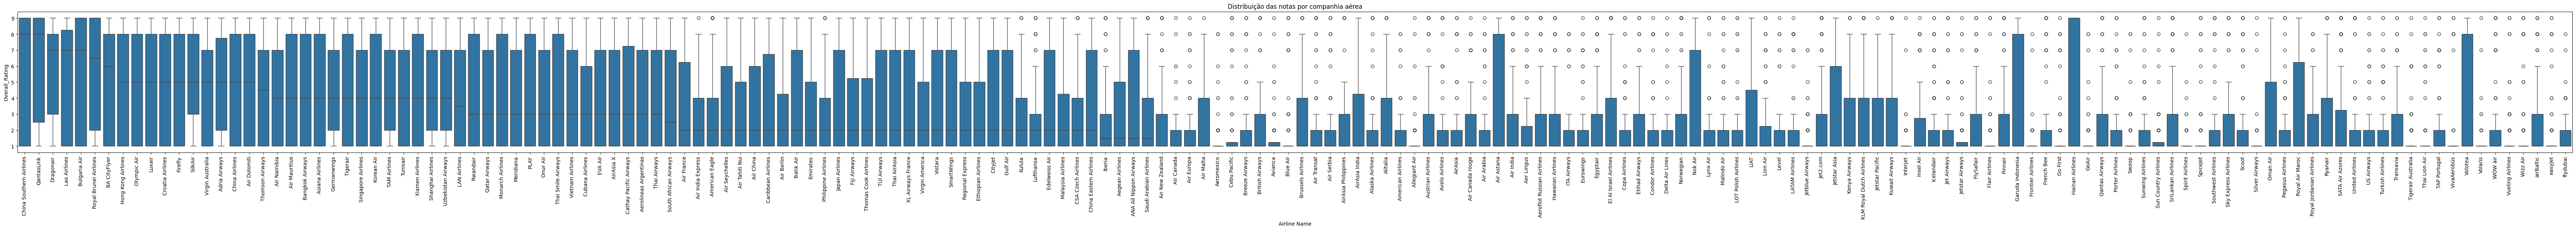

In [ ]:
plt.figure(figsize=(90,5))
sns.boxplot(data=dados, x='Airline Name', y='Overall_Rating', order=companhias_aereas_ordenadas)
plt.xticks(rotation=90)
plt.title('Distribuição das notas por companhia aérea')
plt.show()

Se clicarmos na imagem de output, podemos ter uma visão mais detalhada dos gráficos de distribuição.

Identificamos a partir do gráfico que a variação das notas é bem grande,sempre com notas de 1 a 9.

Existem poucas companhias que conseguem manter uma concentração maior de avaliações maiores que 6. como pode ser identificado pela caixa do boxplot acima da linha da mediana.

Apenas 7 companhias das 182 possuem mediana acima de 6, sendo elas China Southern Airlines, QantasLink, Dragonair, Lao Airlines, Bulgaria Air, Royal Brunei Airlines e BA CityFlyer.

Após isso, há uma grande quantidade de companhias com mediana em torno de 3,4 e 5.

Se avaliarmos as piores companhias aéreas em relação a distribuição de notas, estão com mediana 1, que é a pior nota possível, muitas delas com poucas notas altas, sendo consideradas outliers, valores muito distantes da maior parte das notas que continua sendo 1.

Dentre as piores companhias em relação a notas dos passageiros estão a flydubai, easyJet e airBaltic.

Para ter uma visibilidade ainda melhor, podemos dividir a visualização em blocos, comparando de 15 em 15 companhias aéreas.

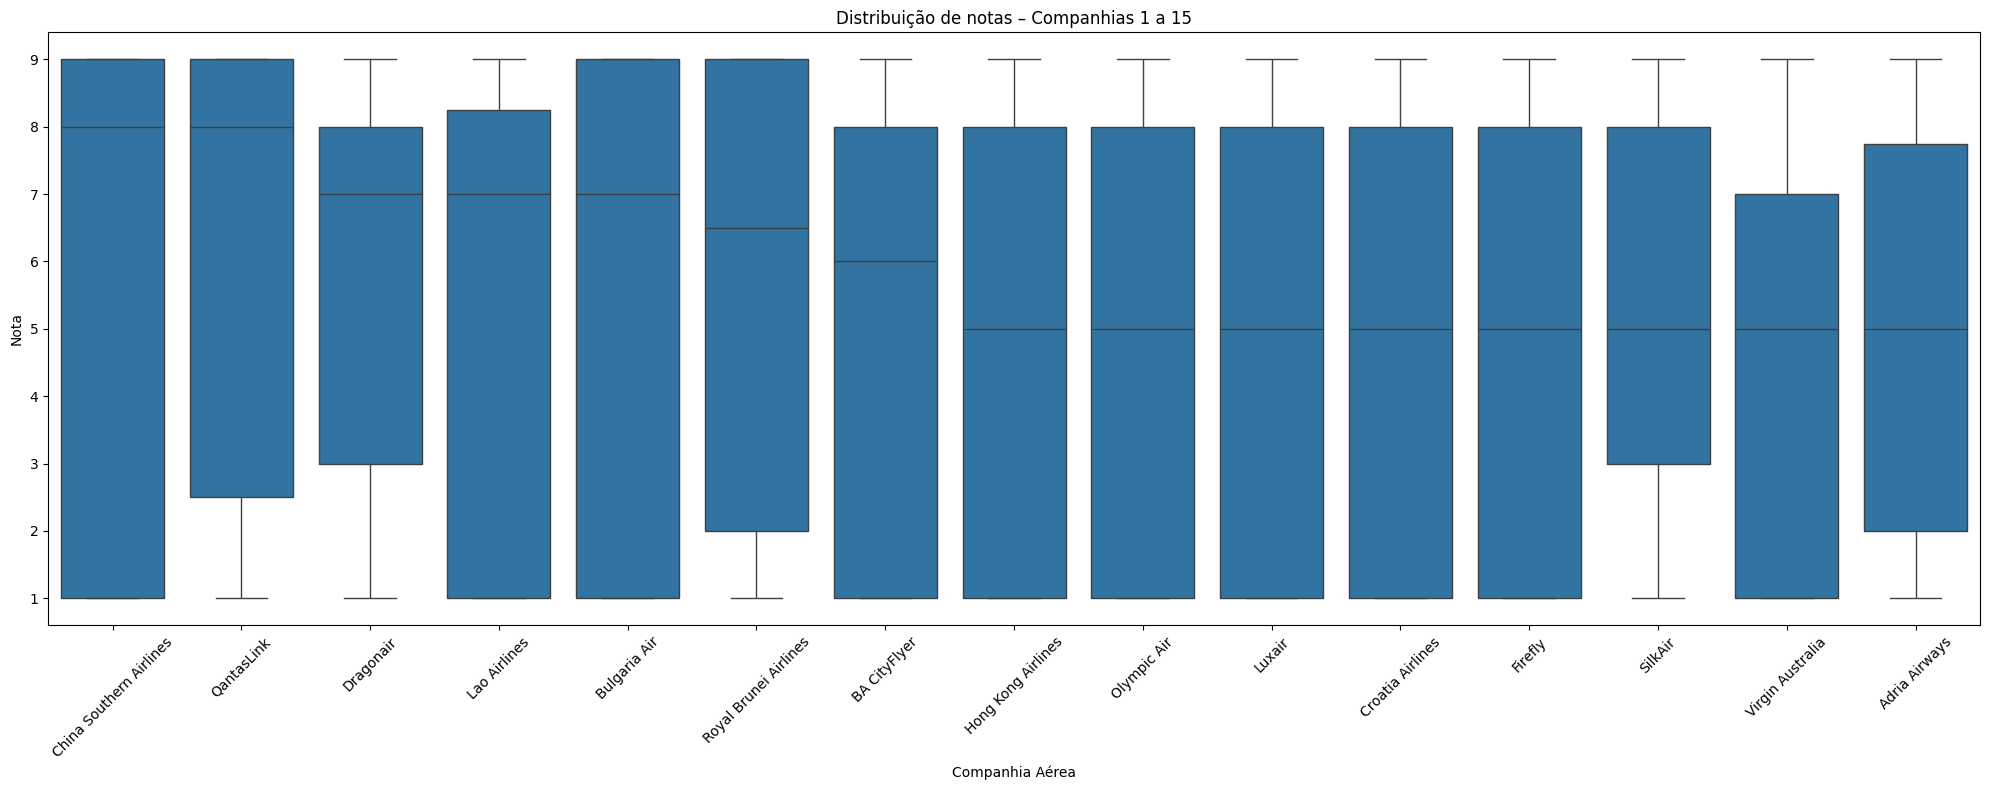

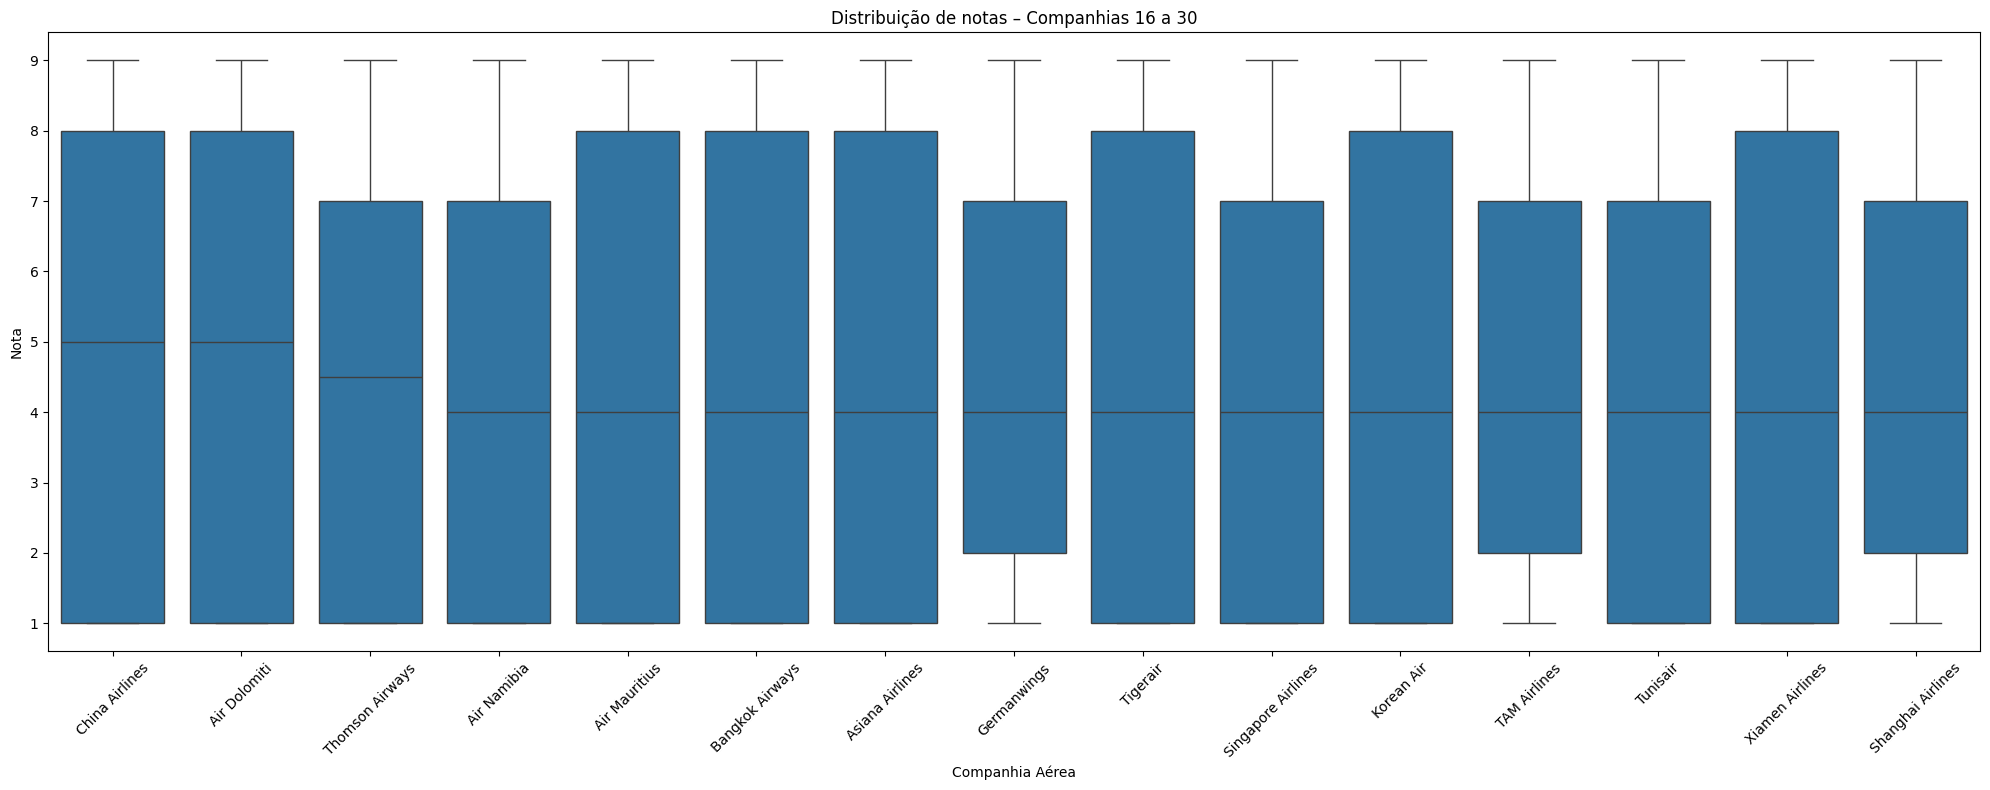

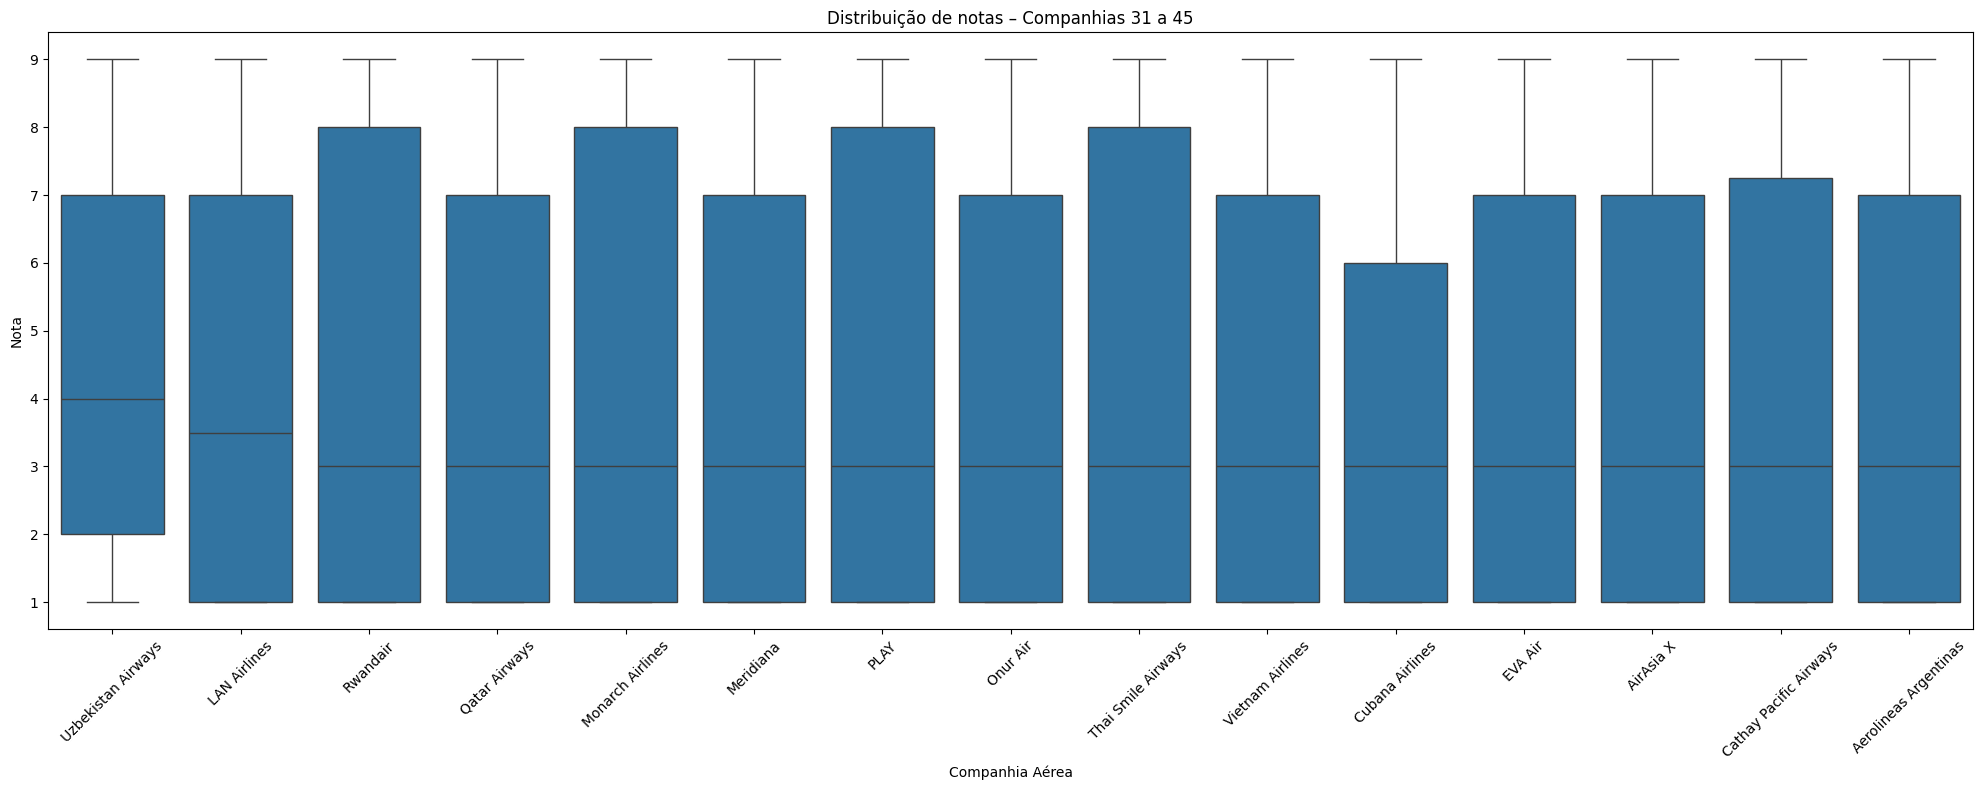

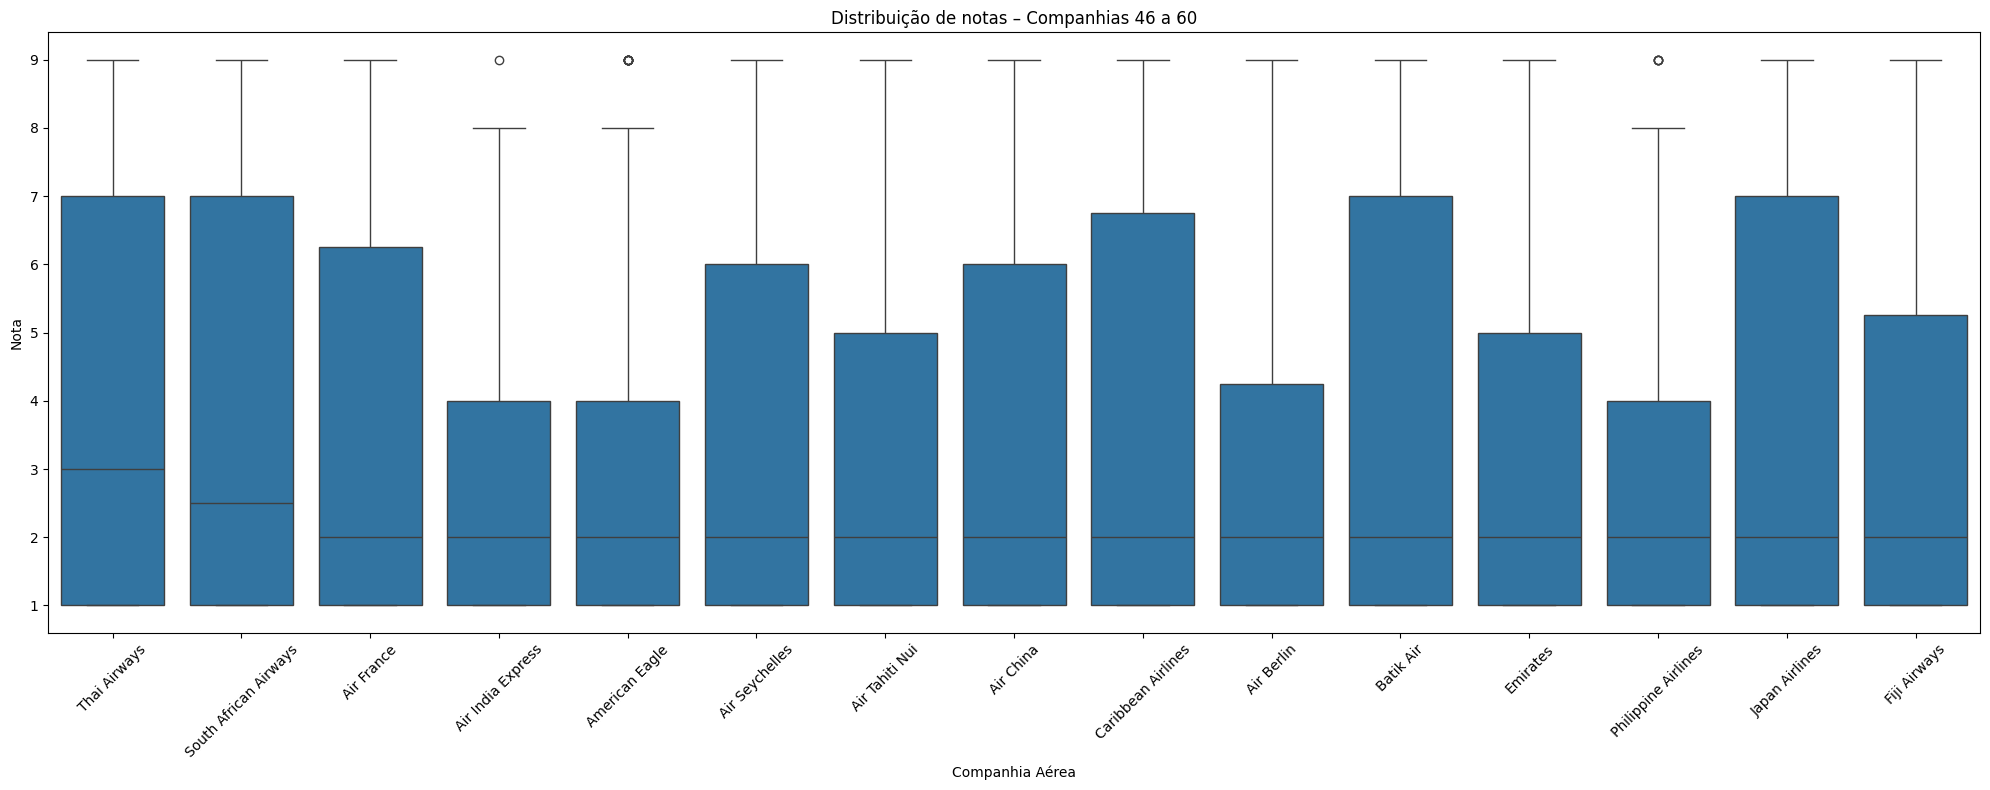

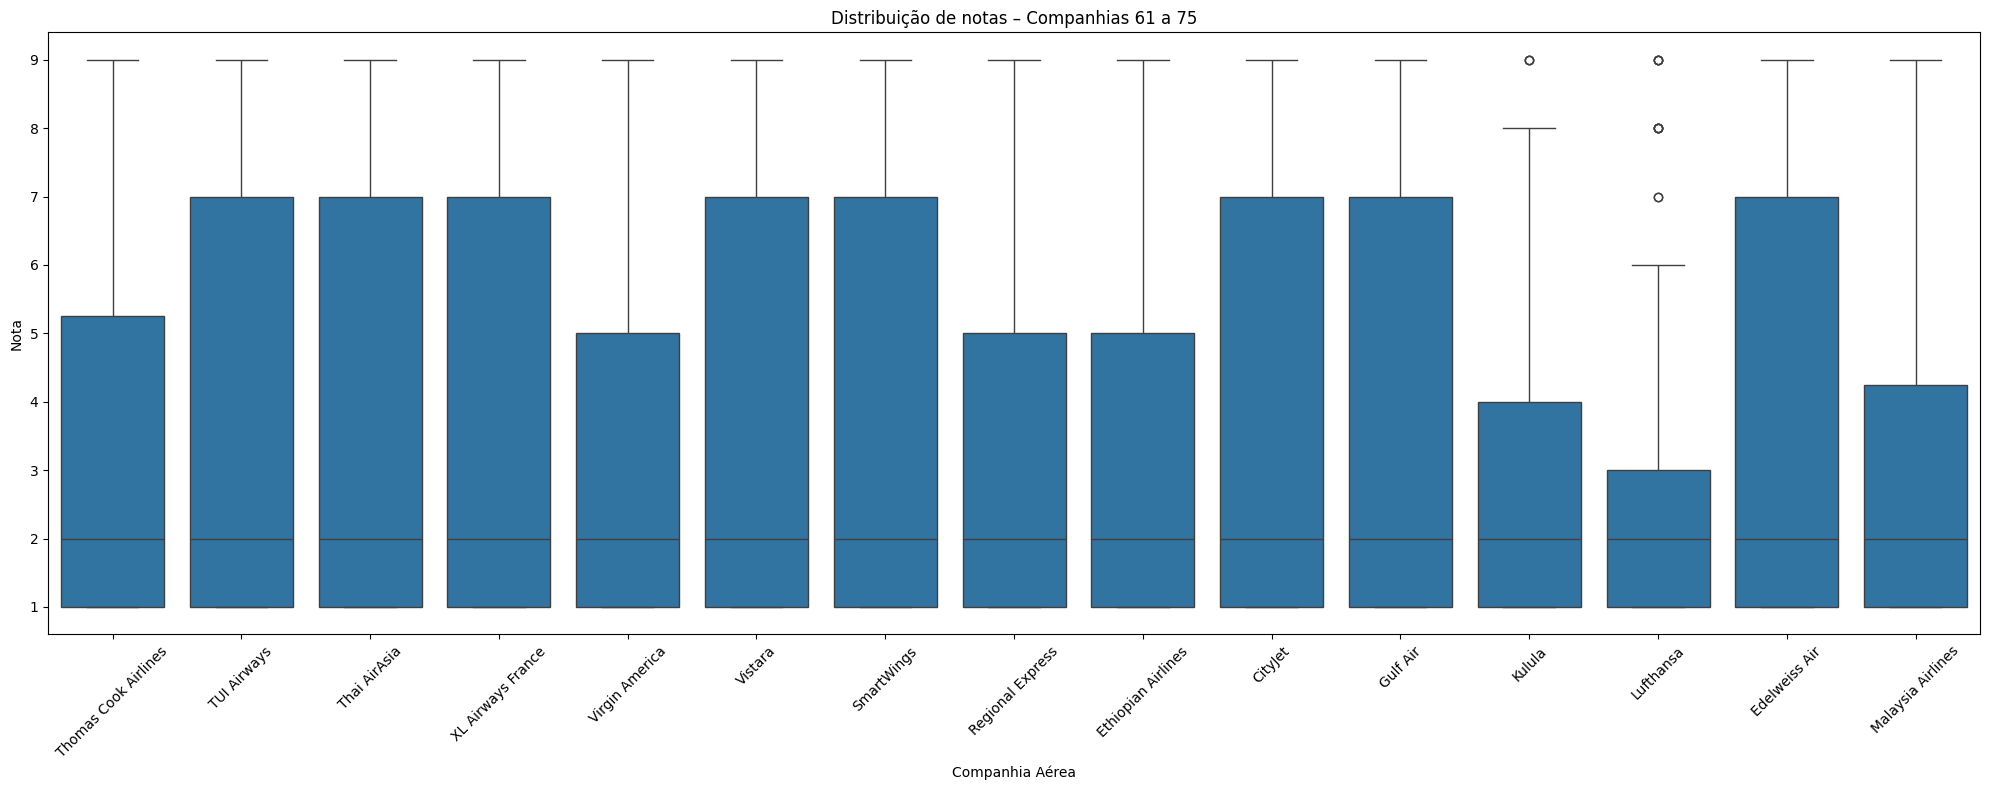

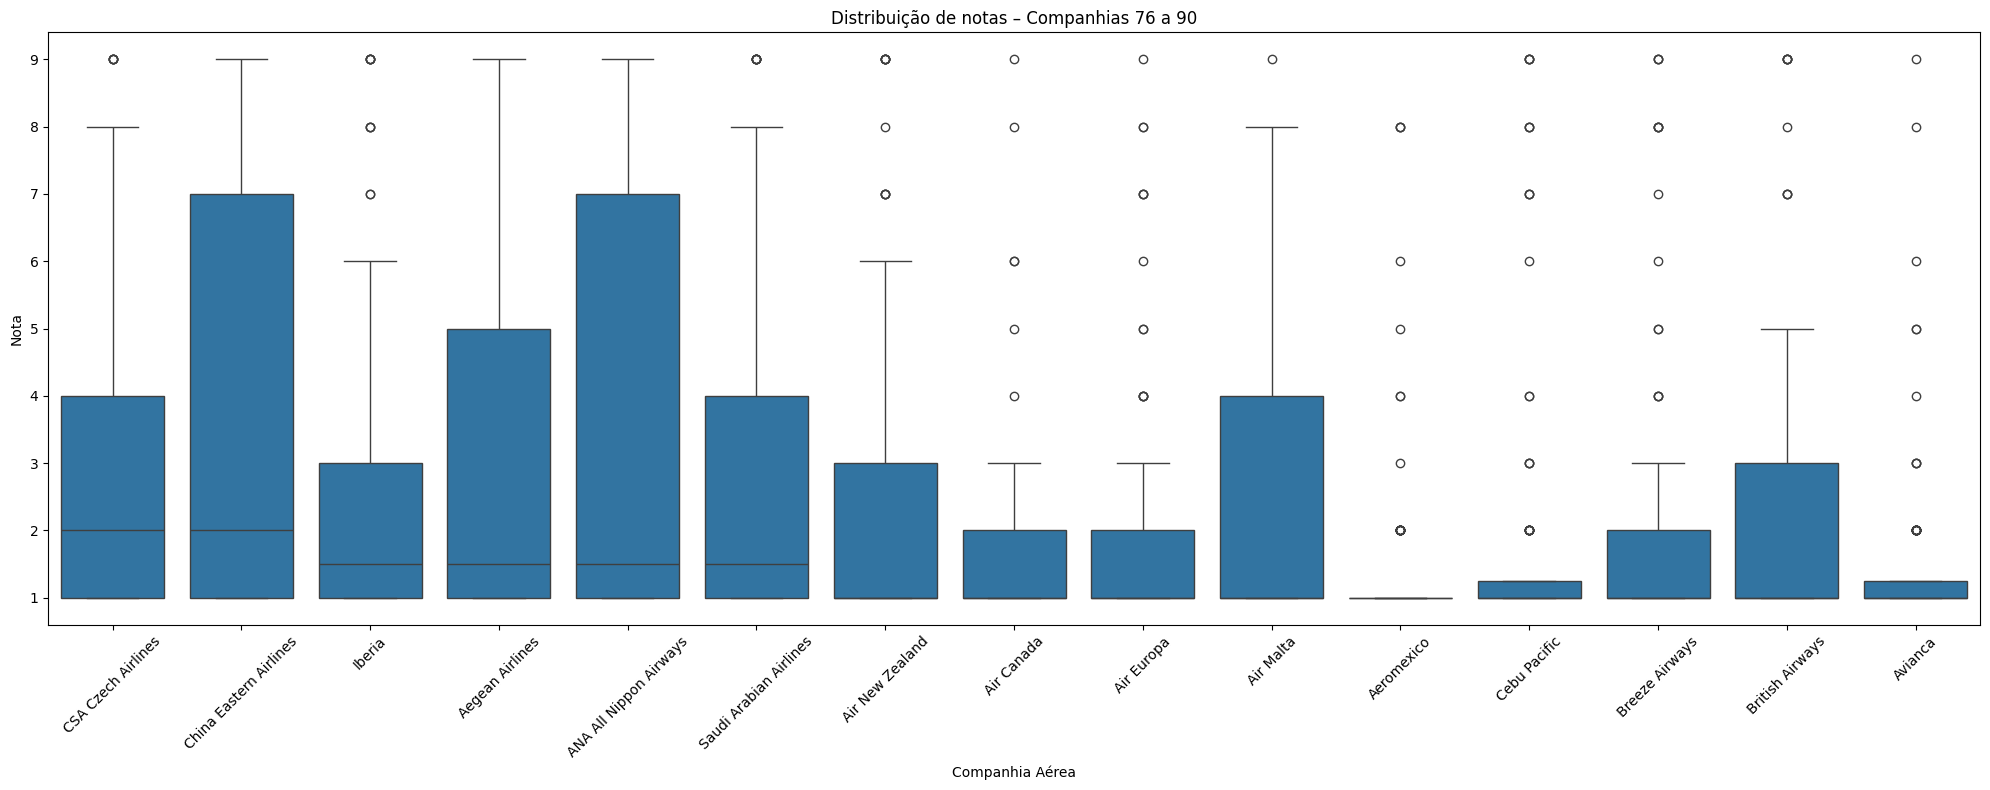

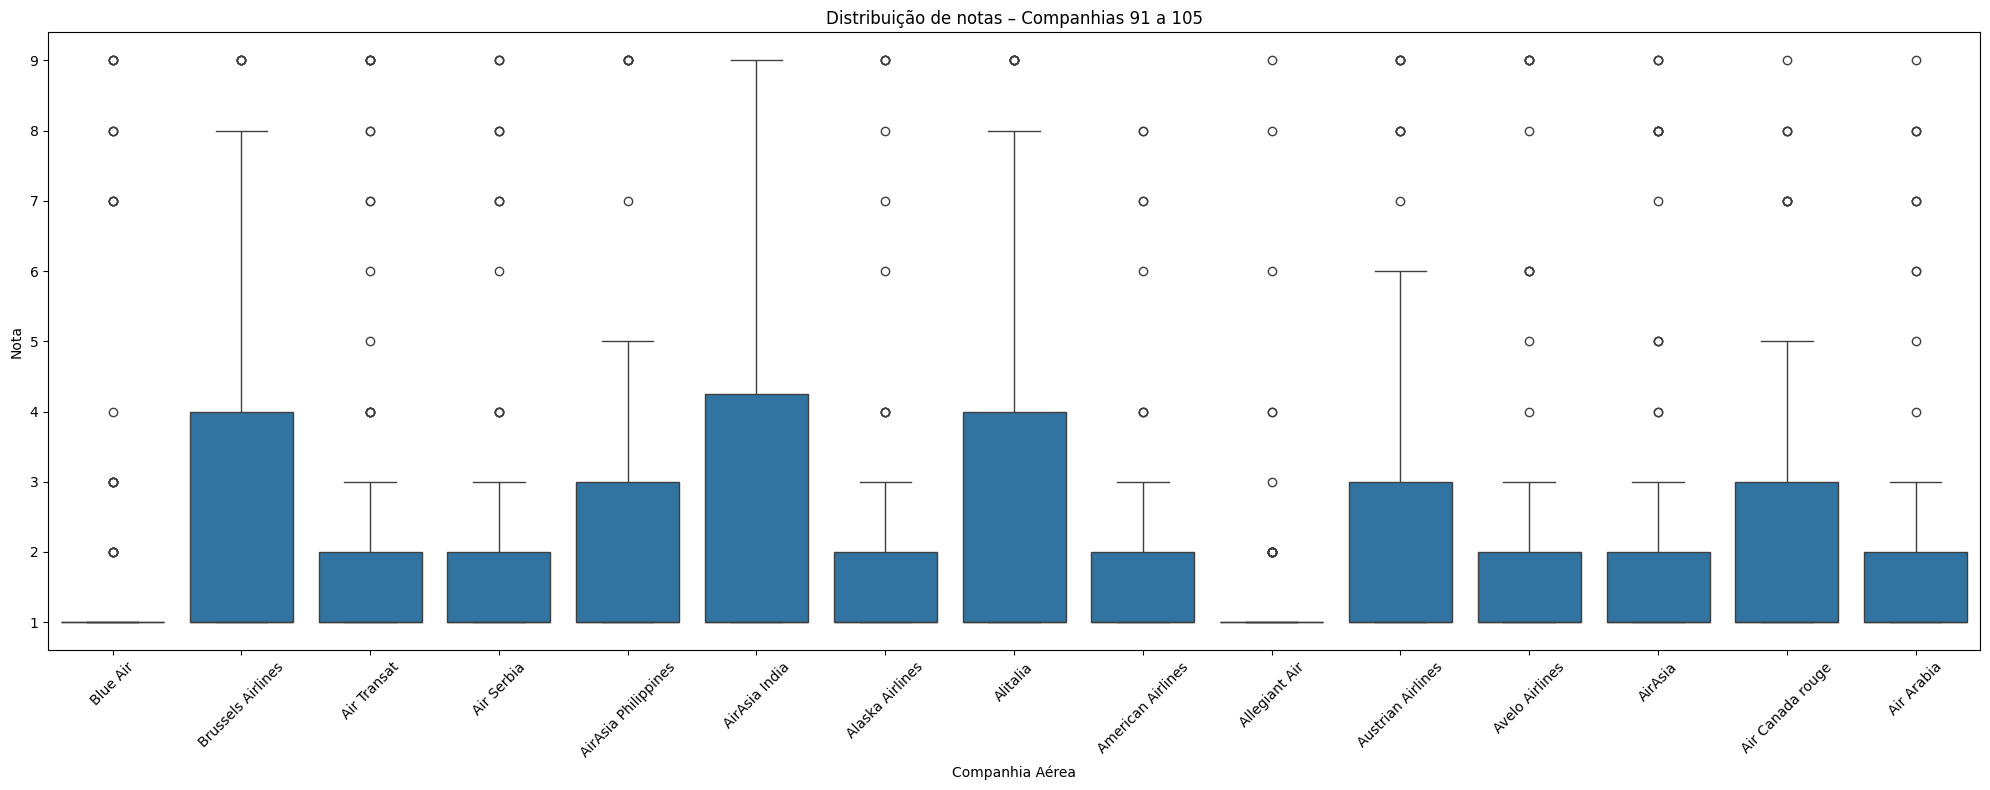

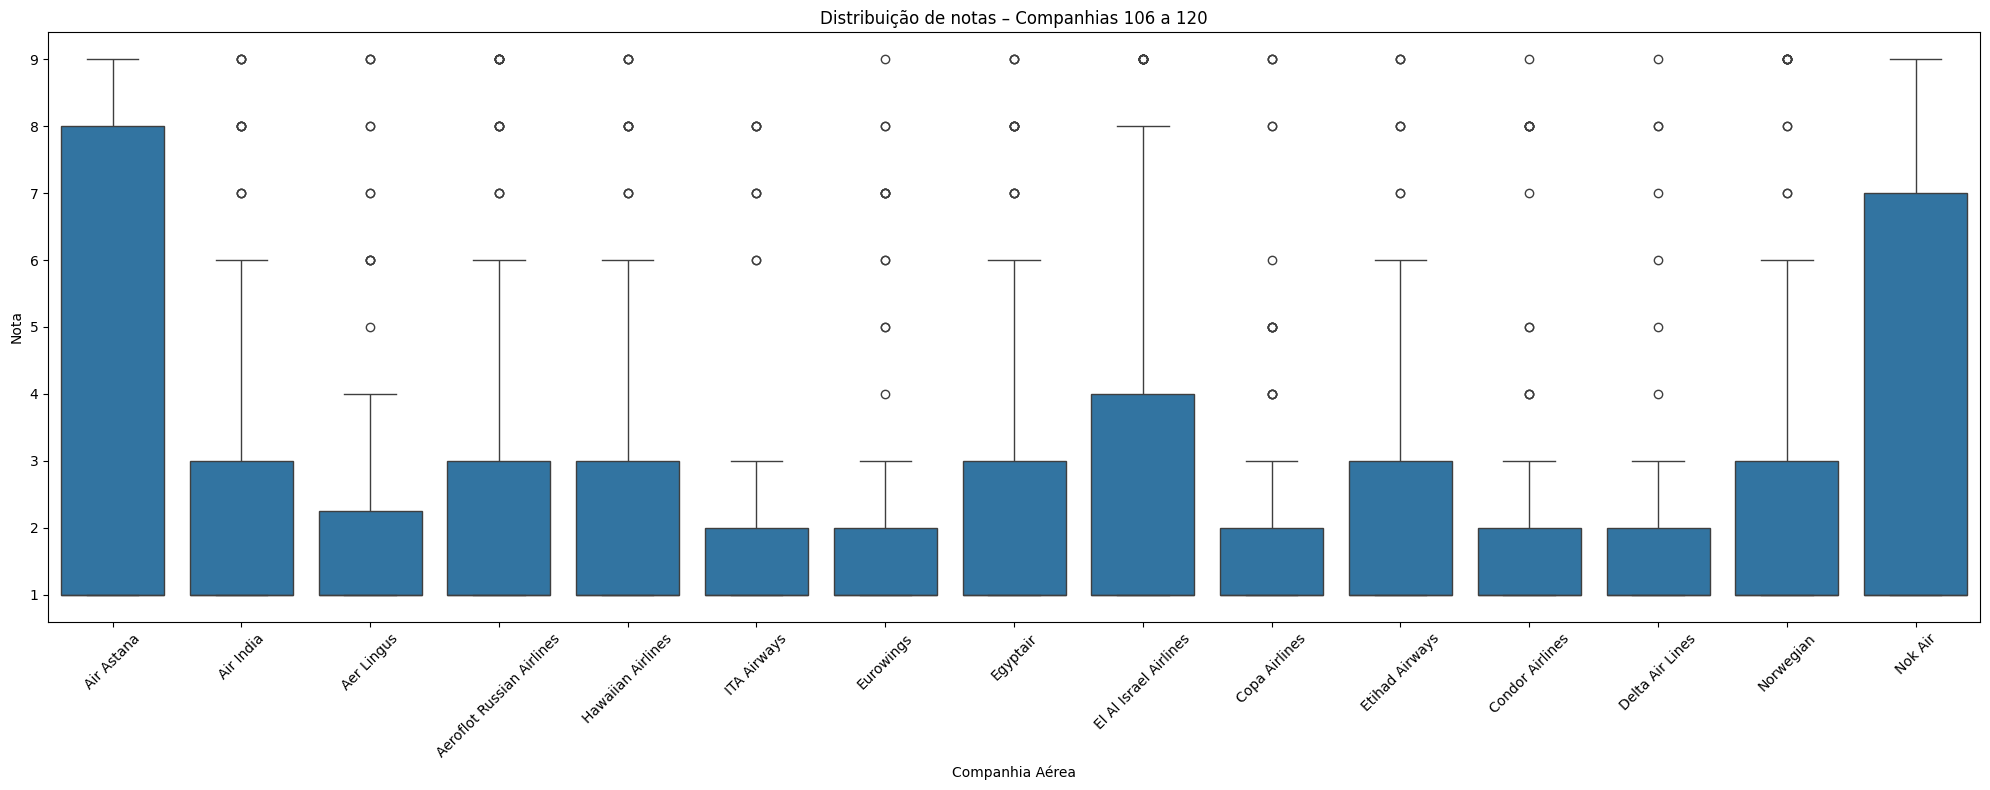

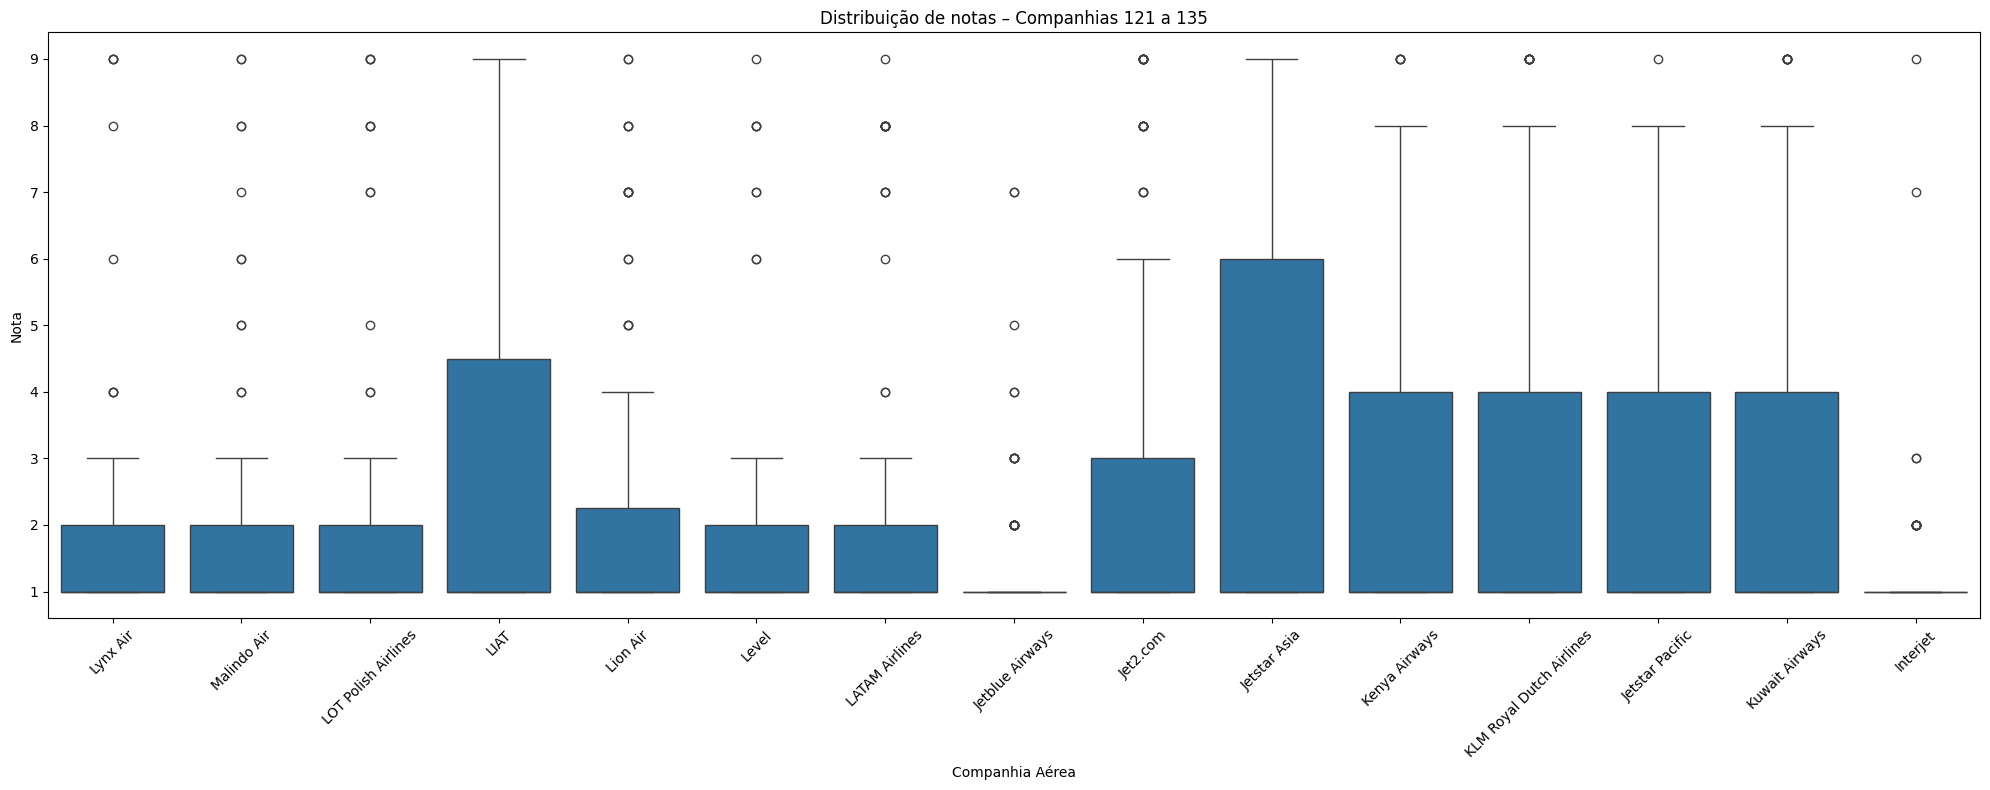

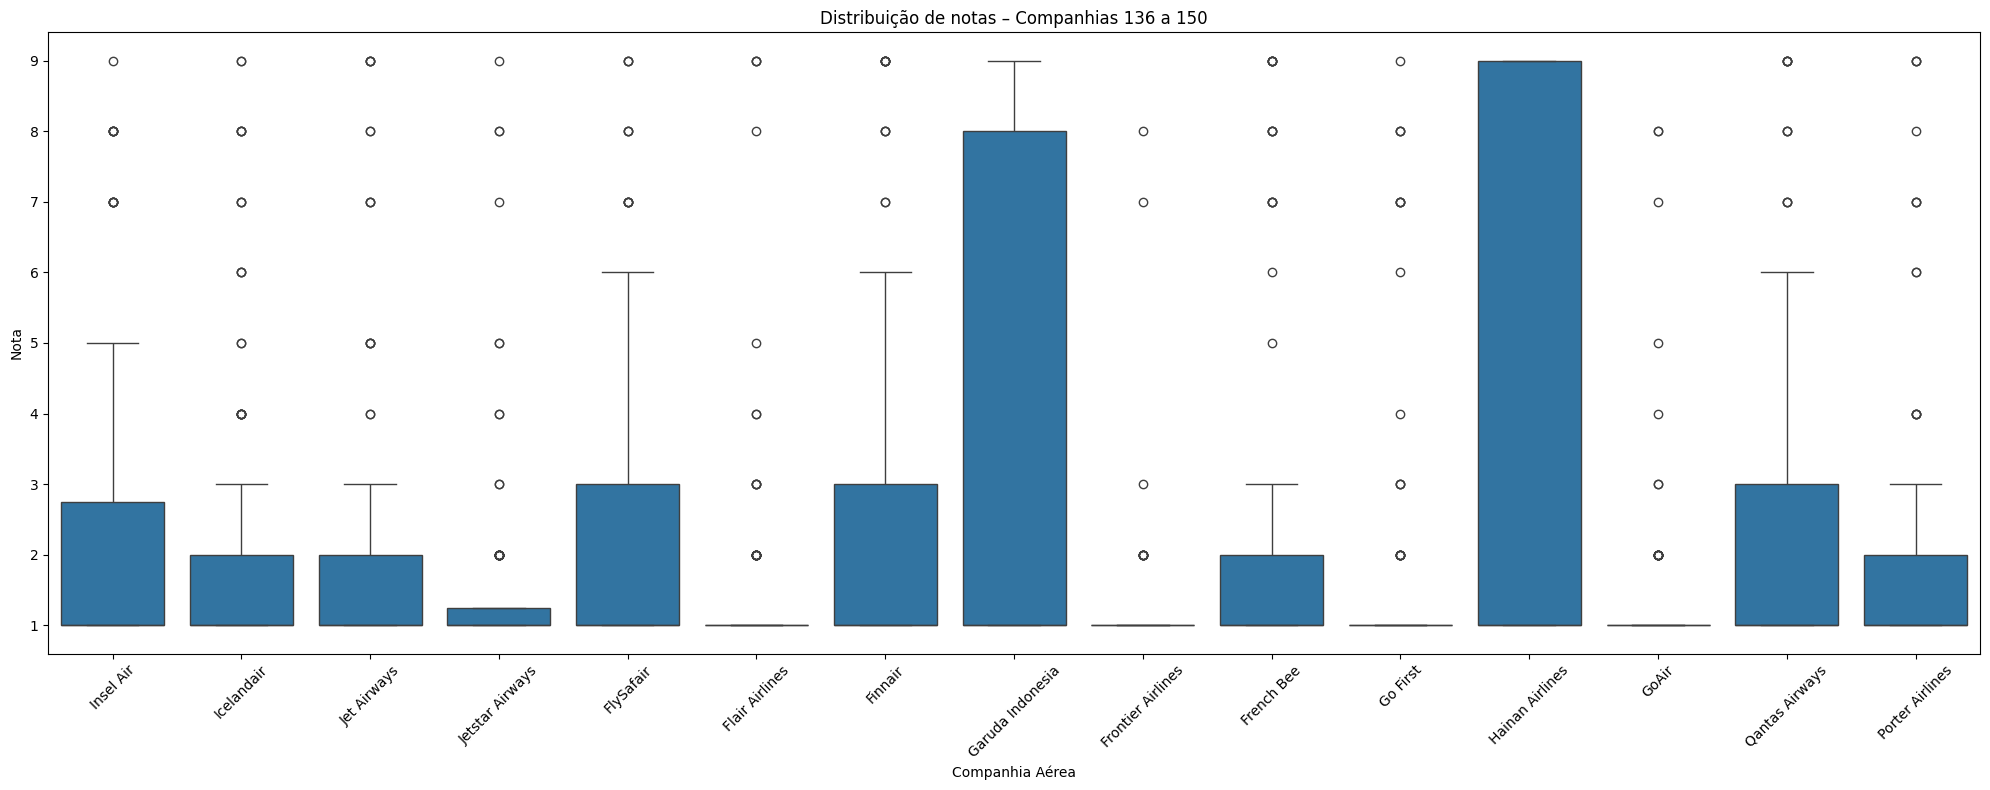

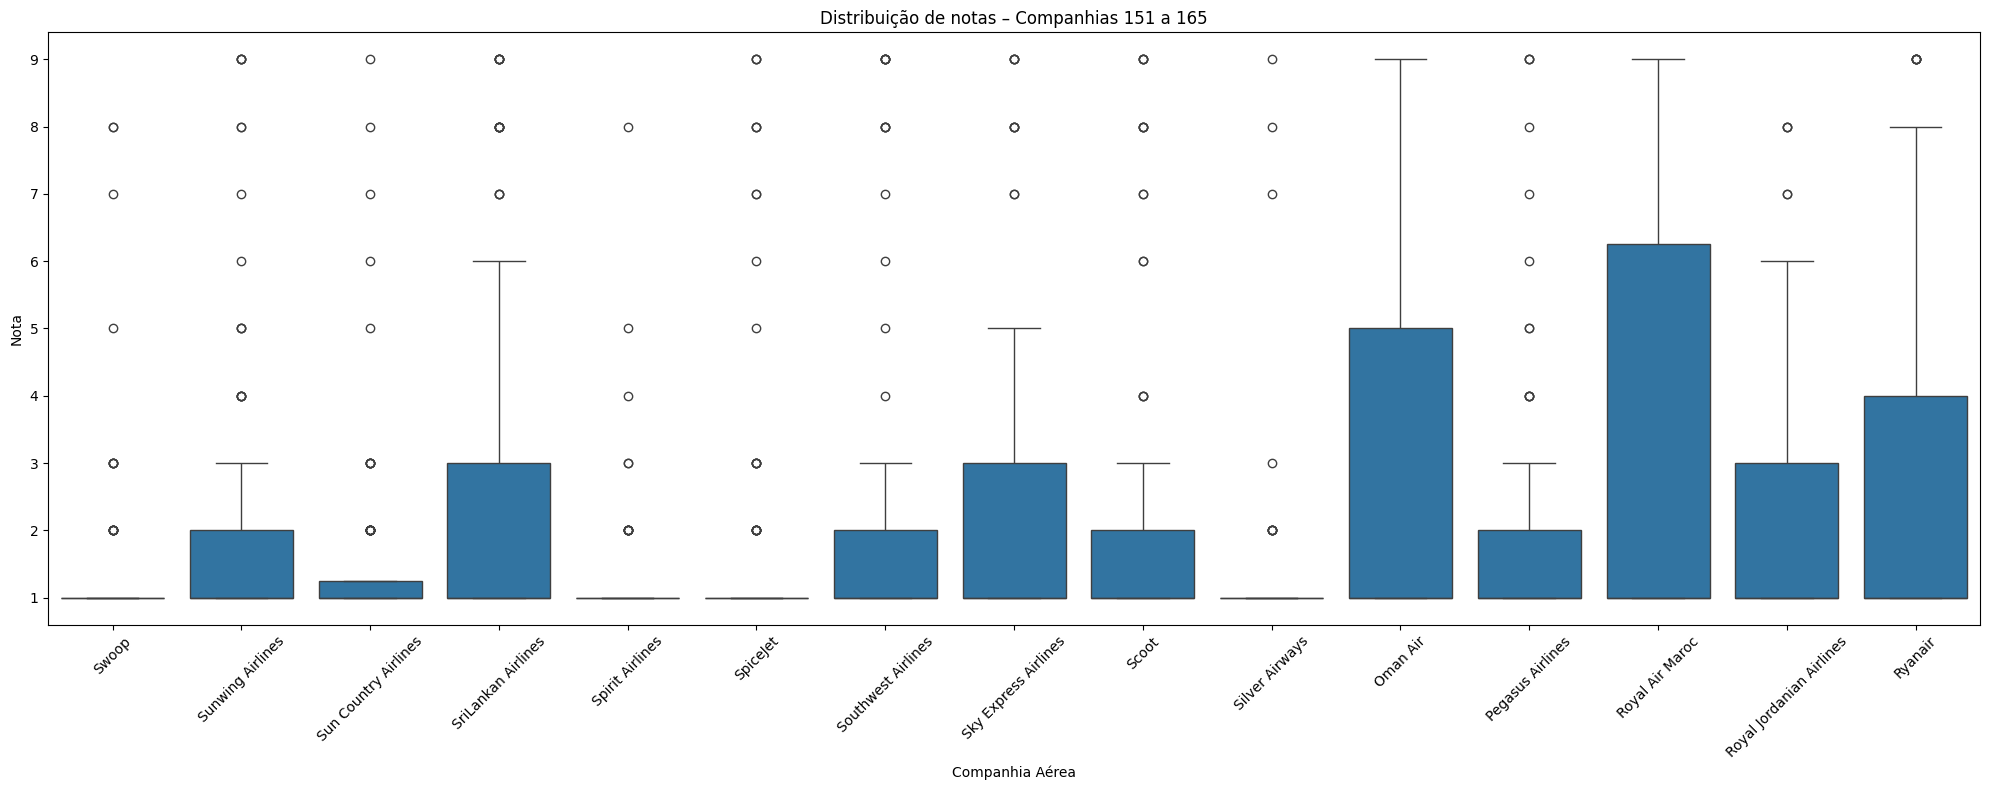

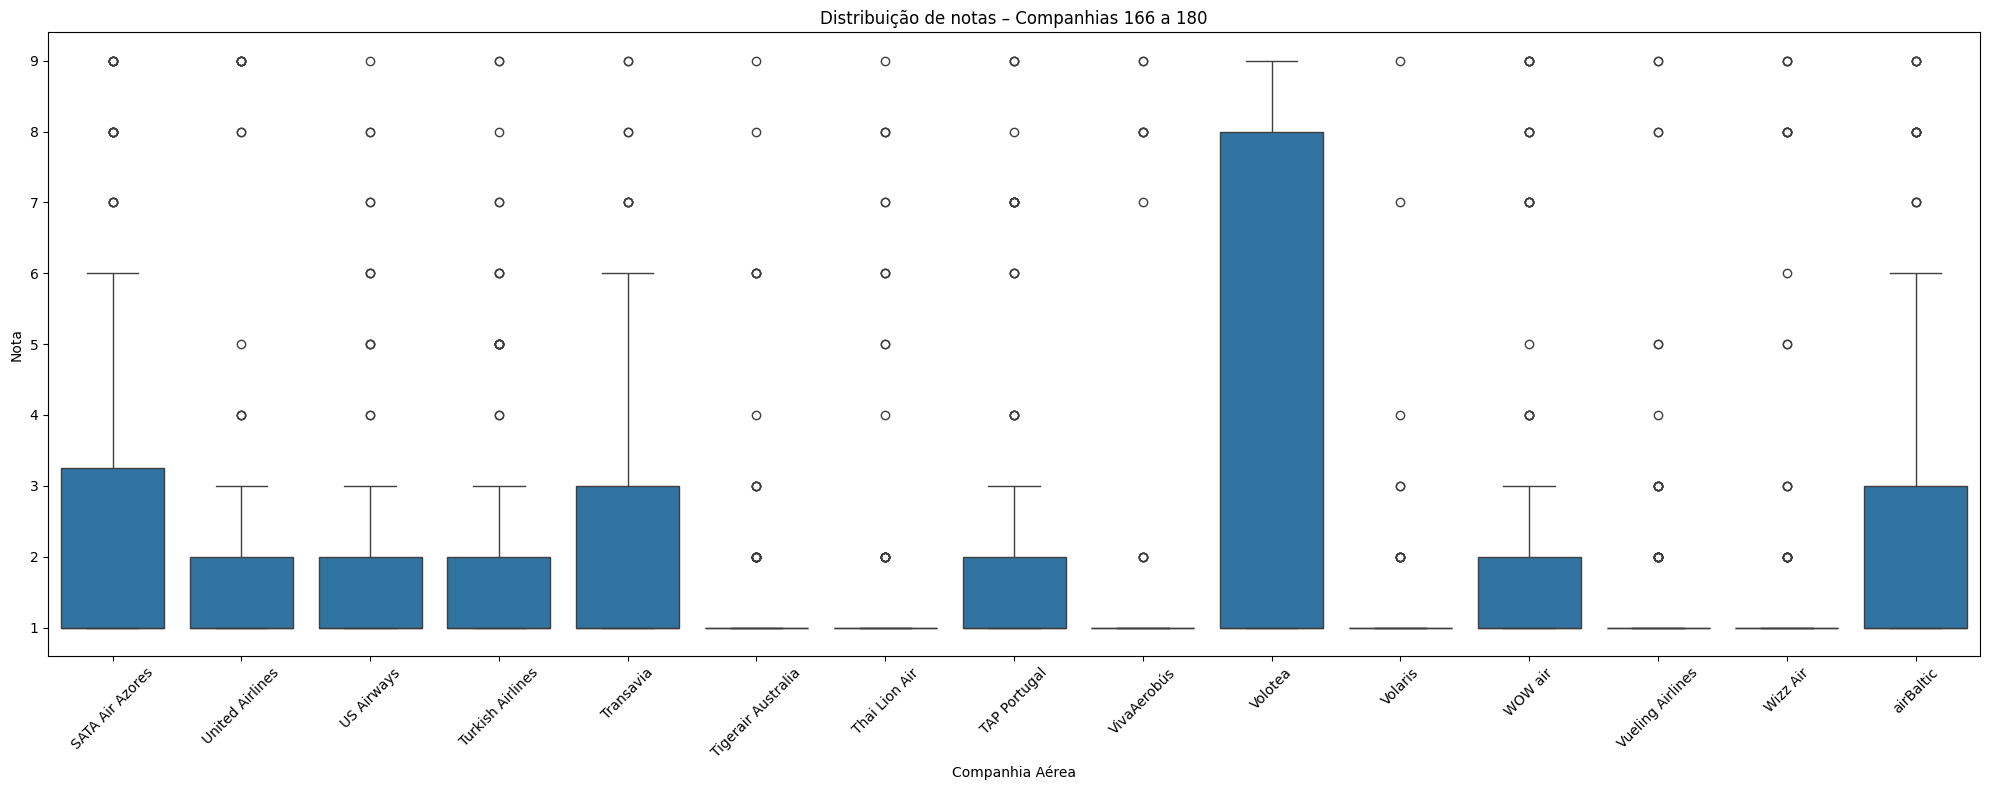

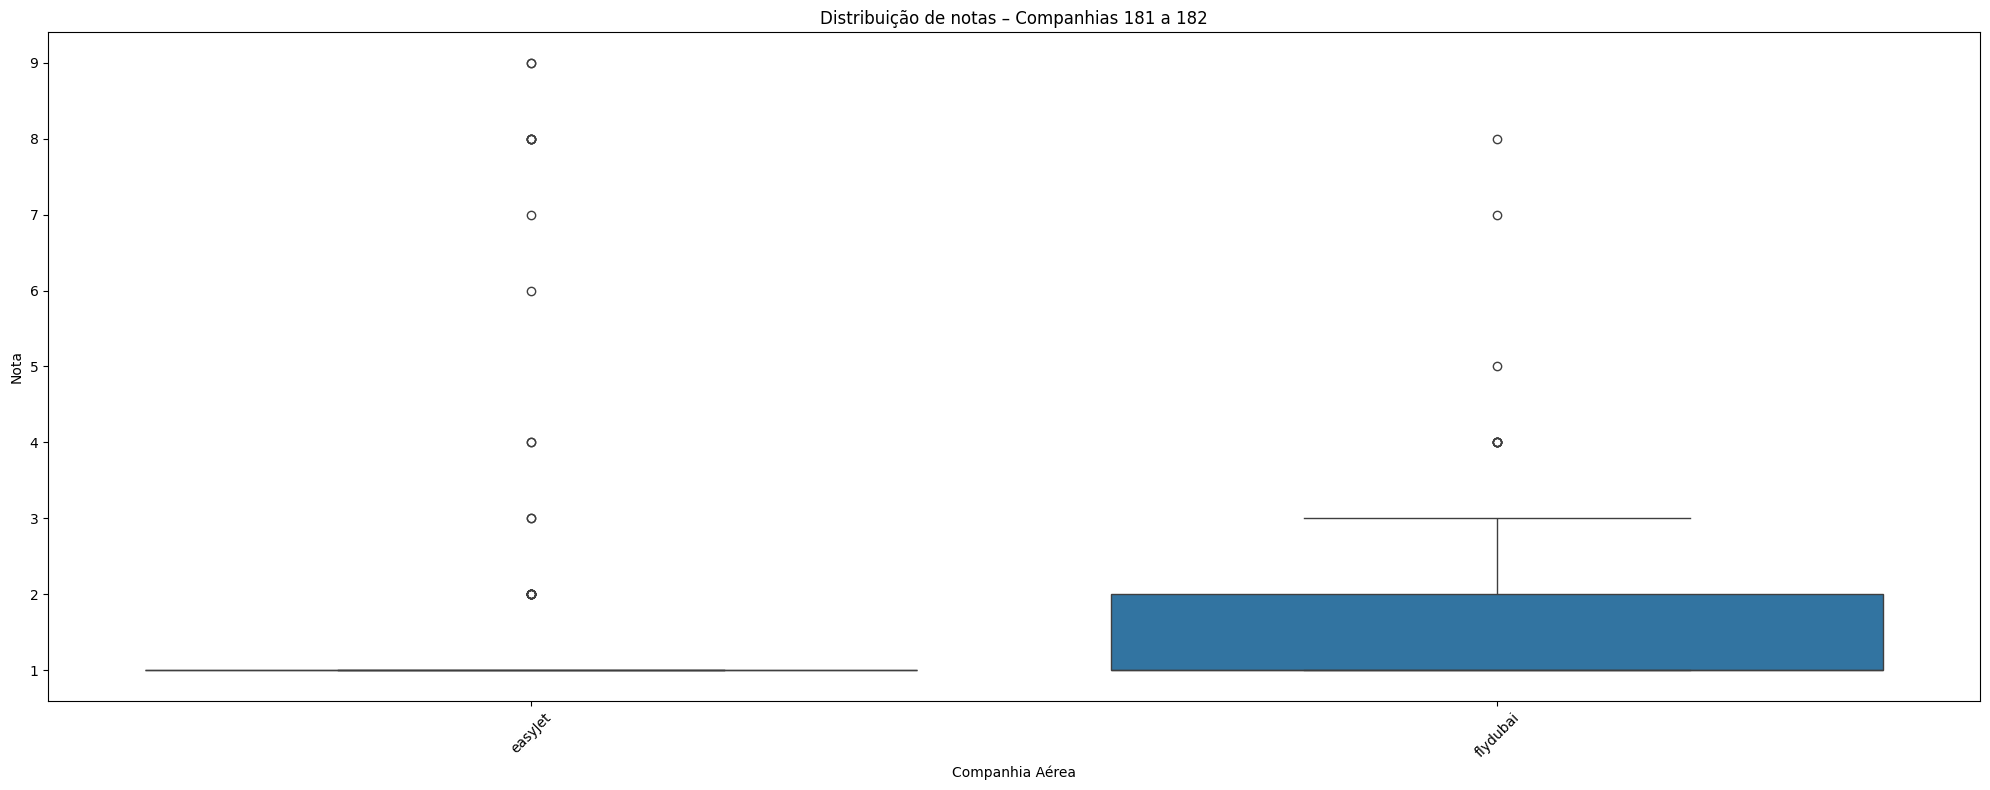

In [ ]:
tamanho_bloco = 15
for i in range(0, len(companhias_aereas_ordenadas), tamanho_bloco):
    subconjunto = companhias_aereas_ordenadas[i:i + tamanho_bloco]
    dados_subconjunto = dados[dados['Airline Name'].isin(subconjunto)]

    plt.figure(figsize=(20, 8))
    sns.boxplot(data=dados_subconjunto, x='Airline Name', y='Overall_Rating', order=subconjunto)
    plt.xticks(rotation=45)
    plt.title(f'Distribuição de notas – Companhias {i+1} a {i+len(subconjunto)}')
    plt.xlabel('Companhia Aérea')
    plt.ylabel('Nota')
    plt.tight_layout()
    plt.show()

Ainda podemos utilizar uma visualização de violino, para identificar em quais valores há uma concentração maior de votos.

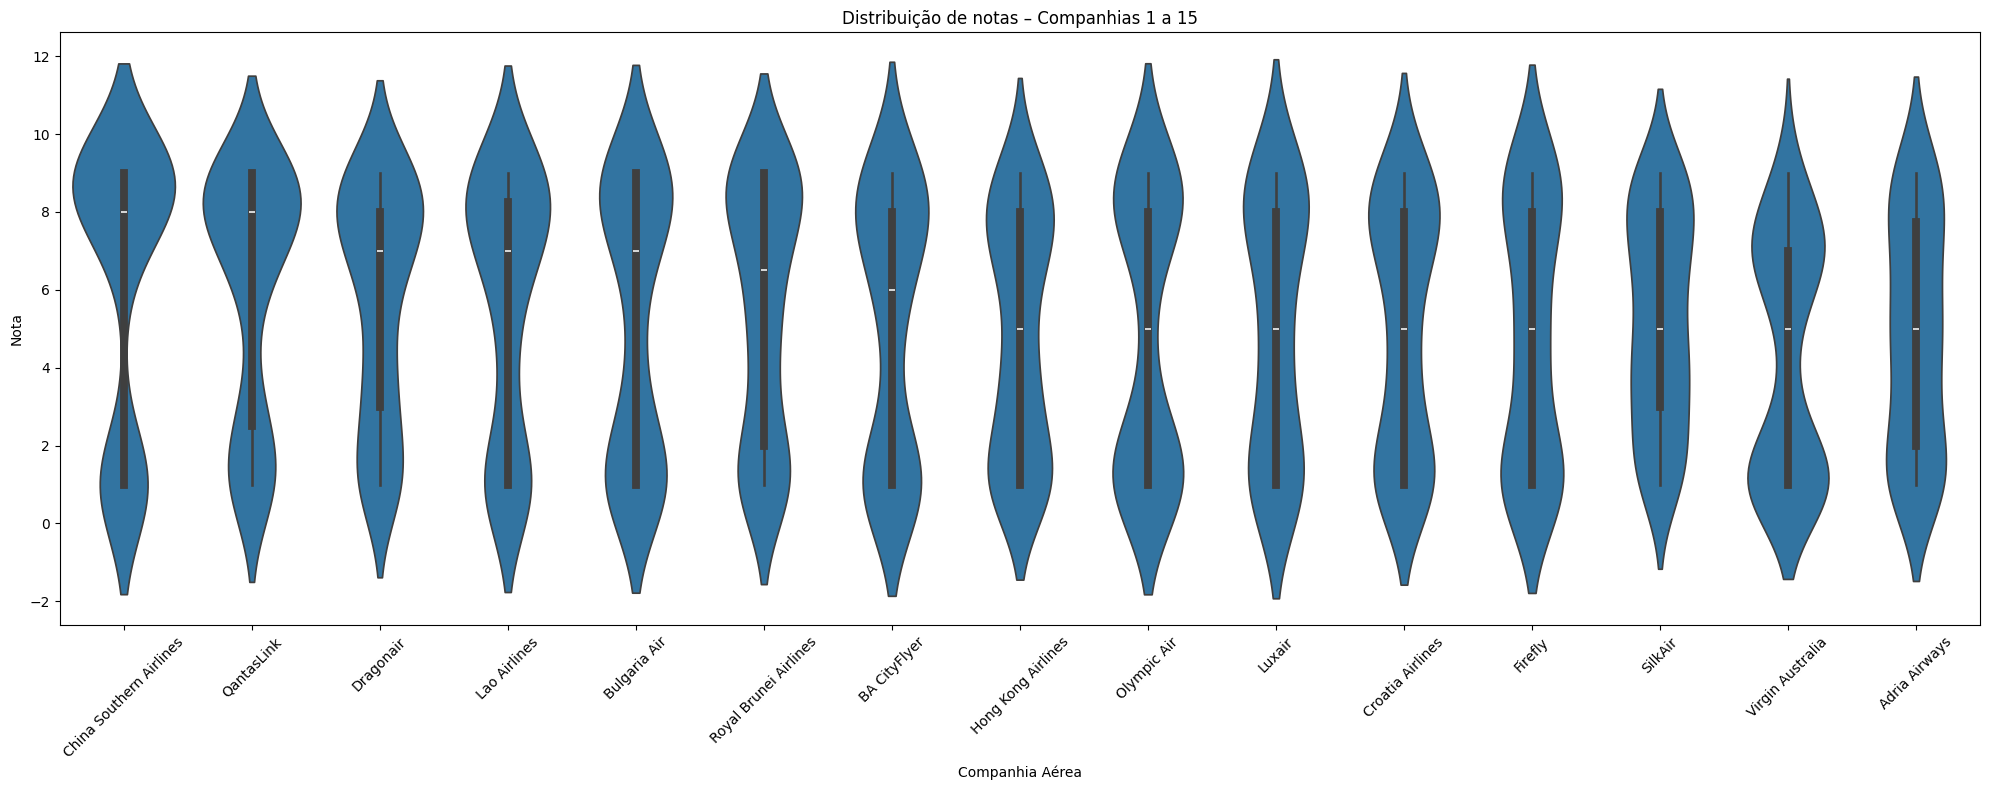

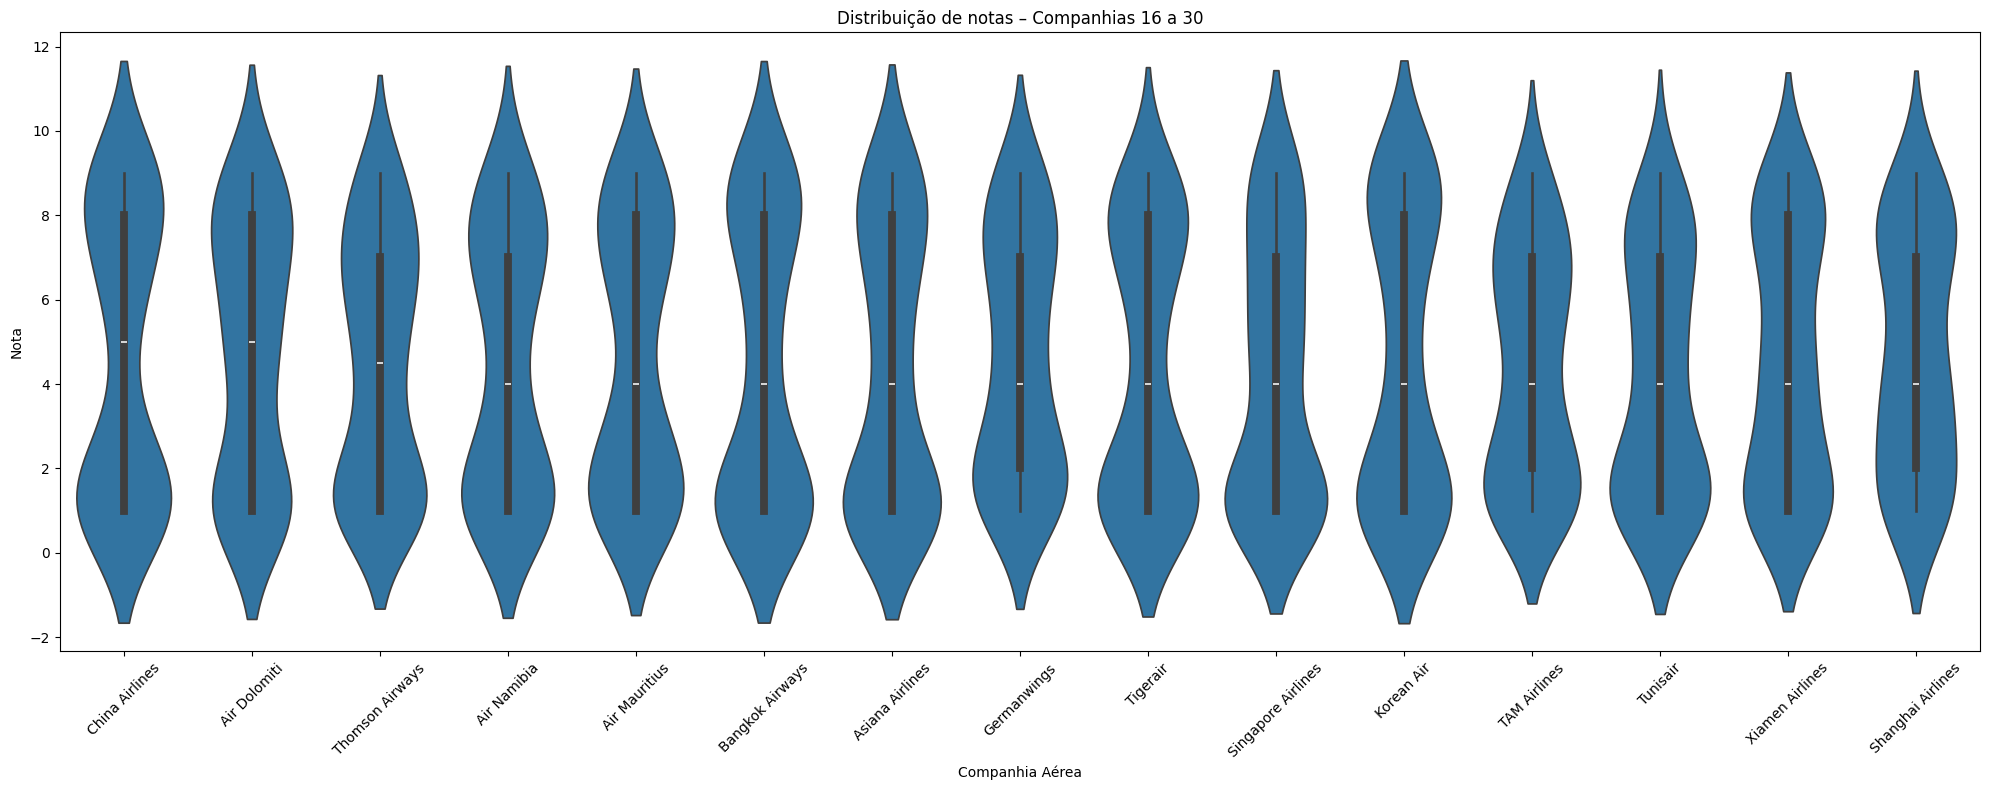

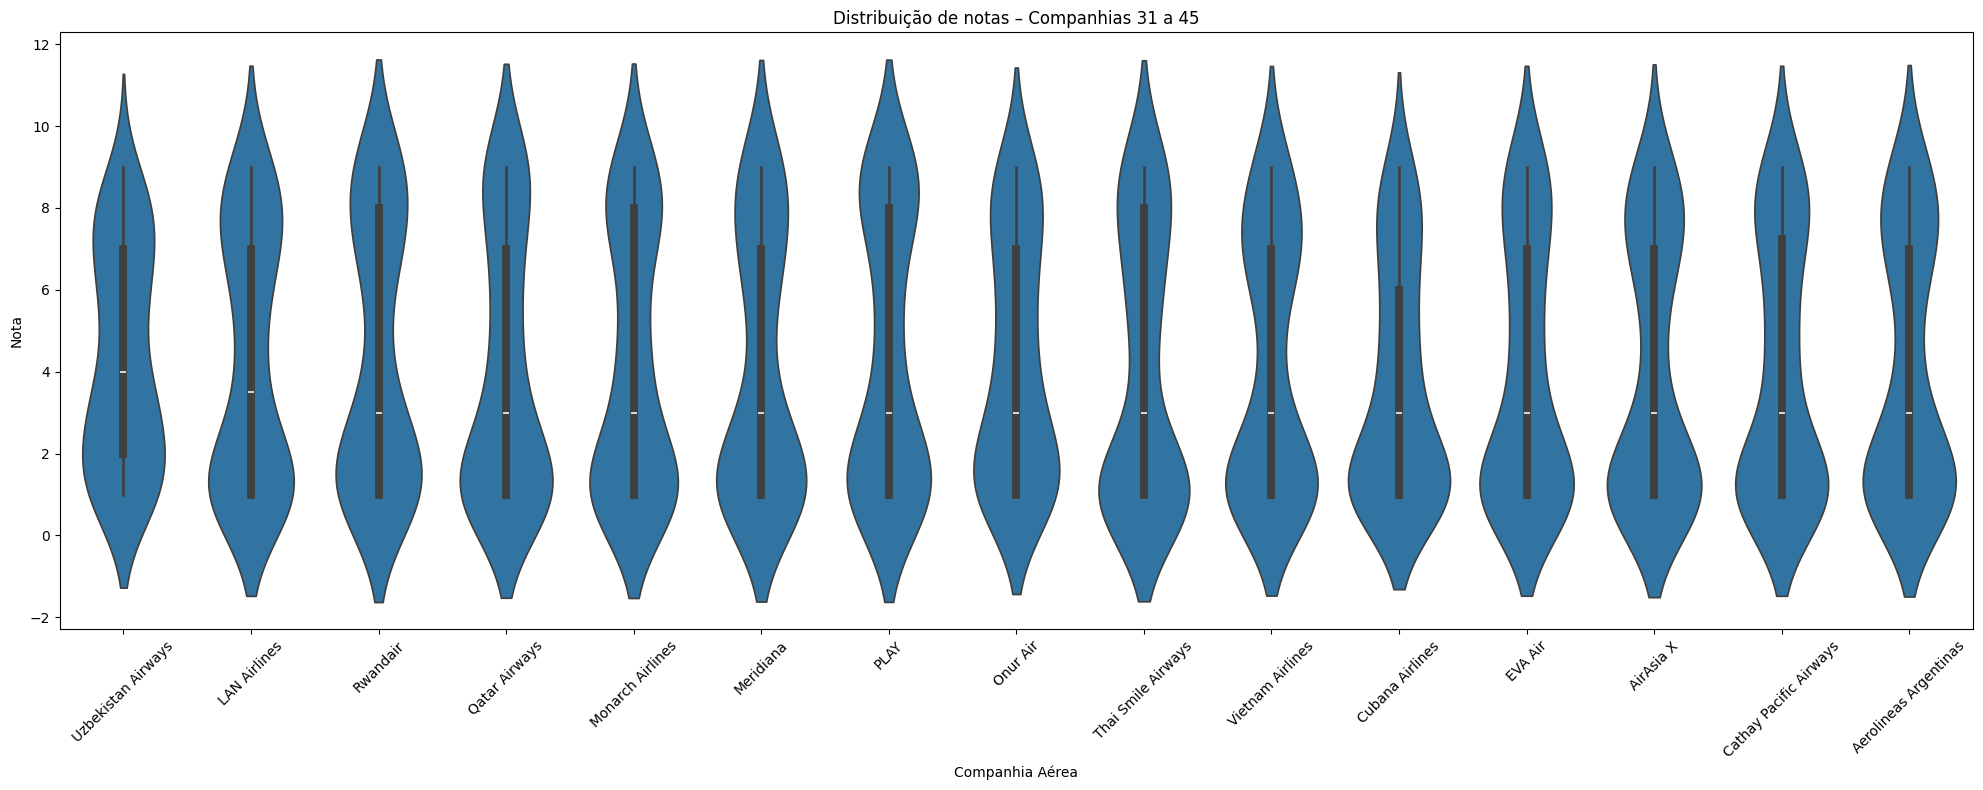

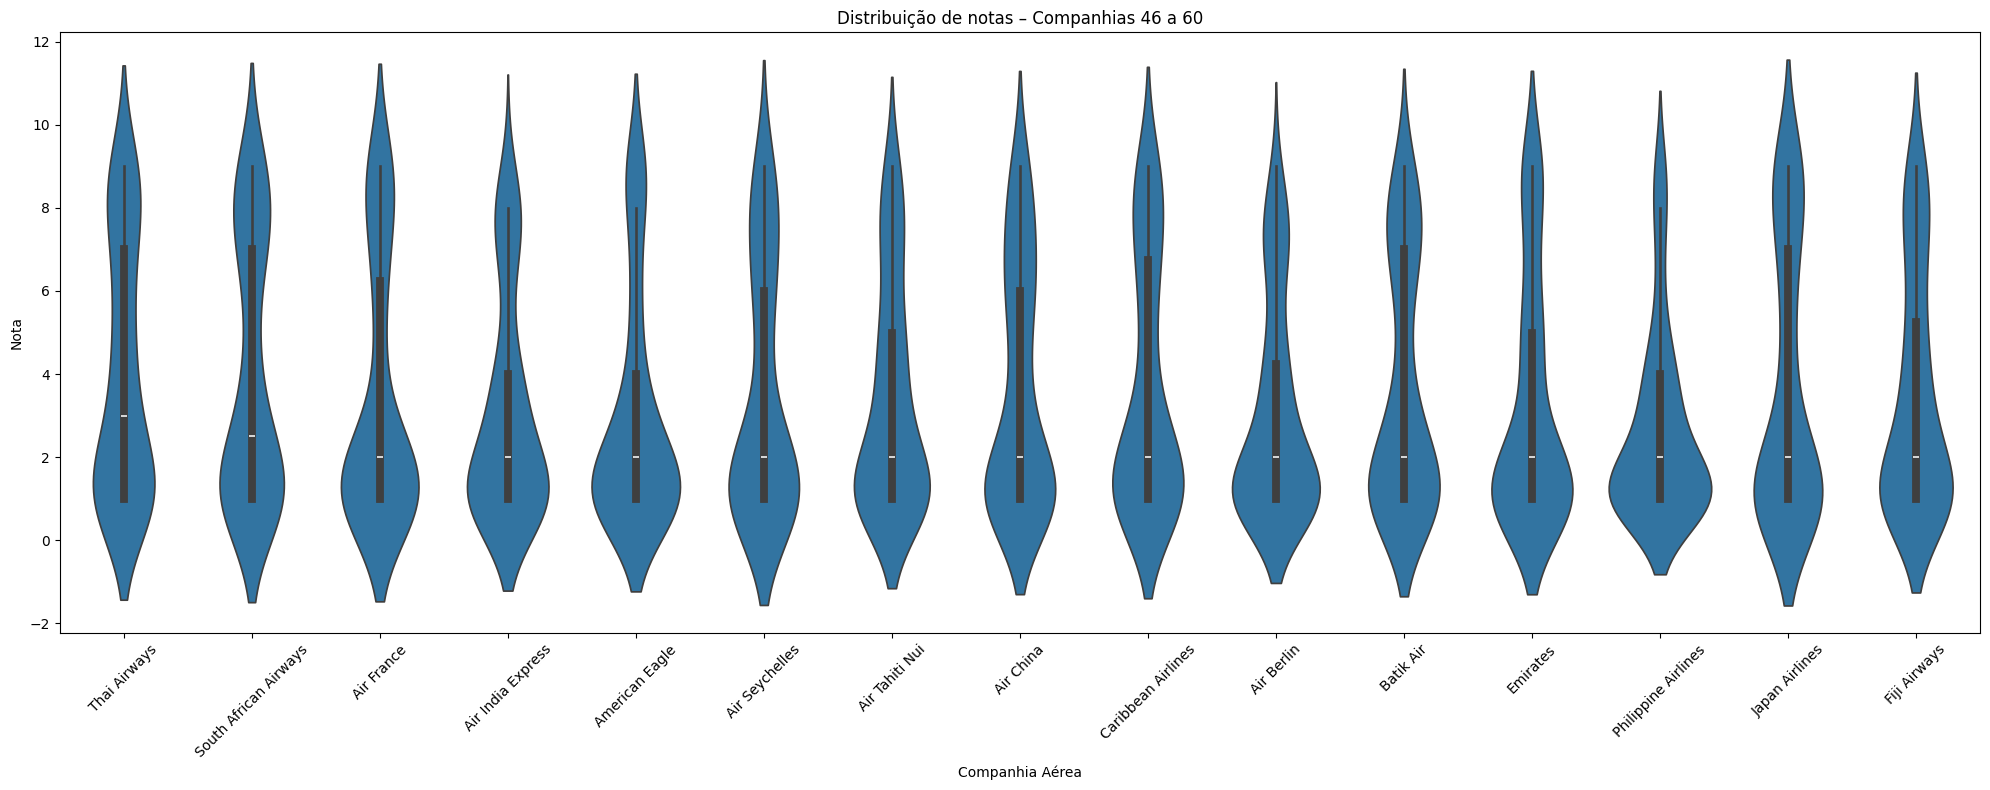

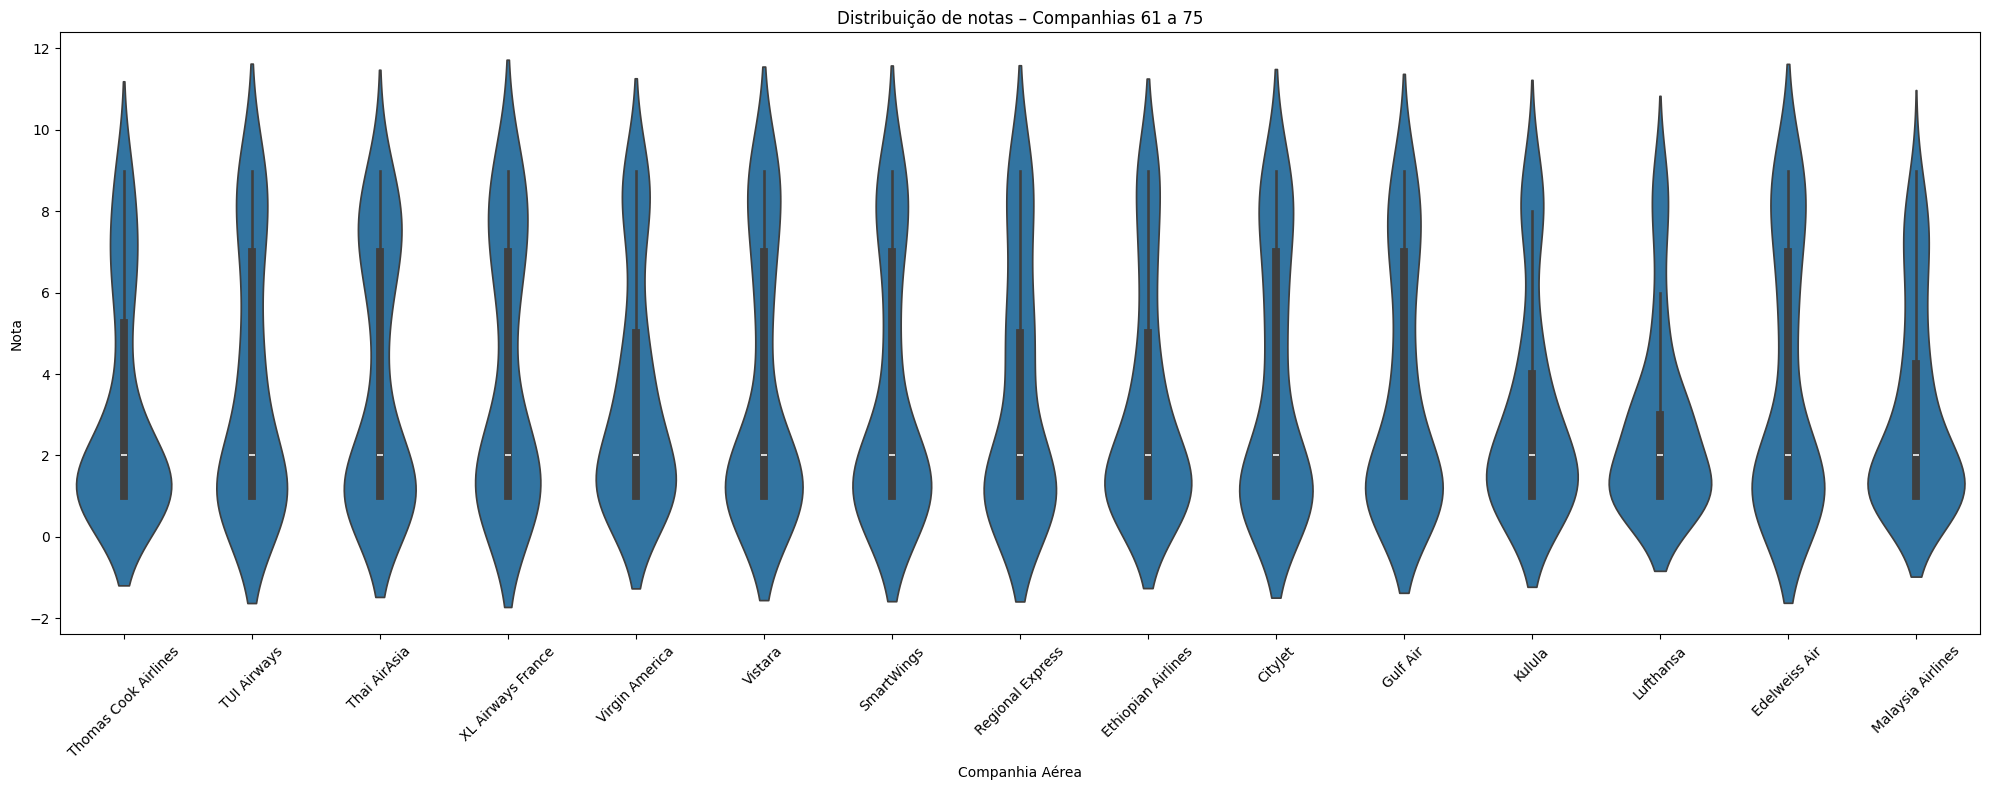

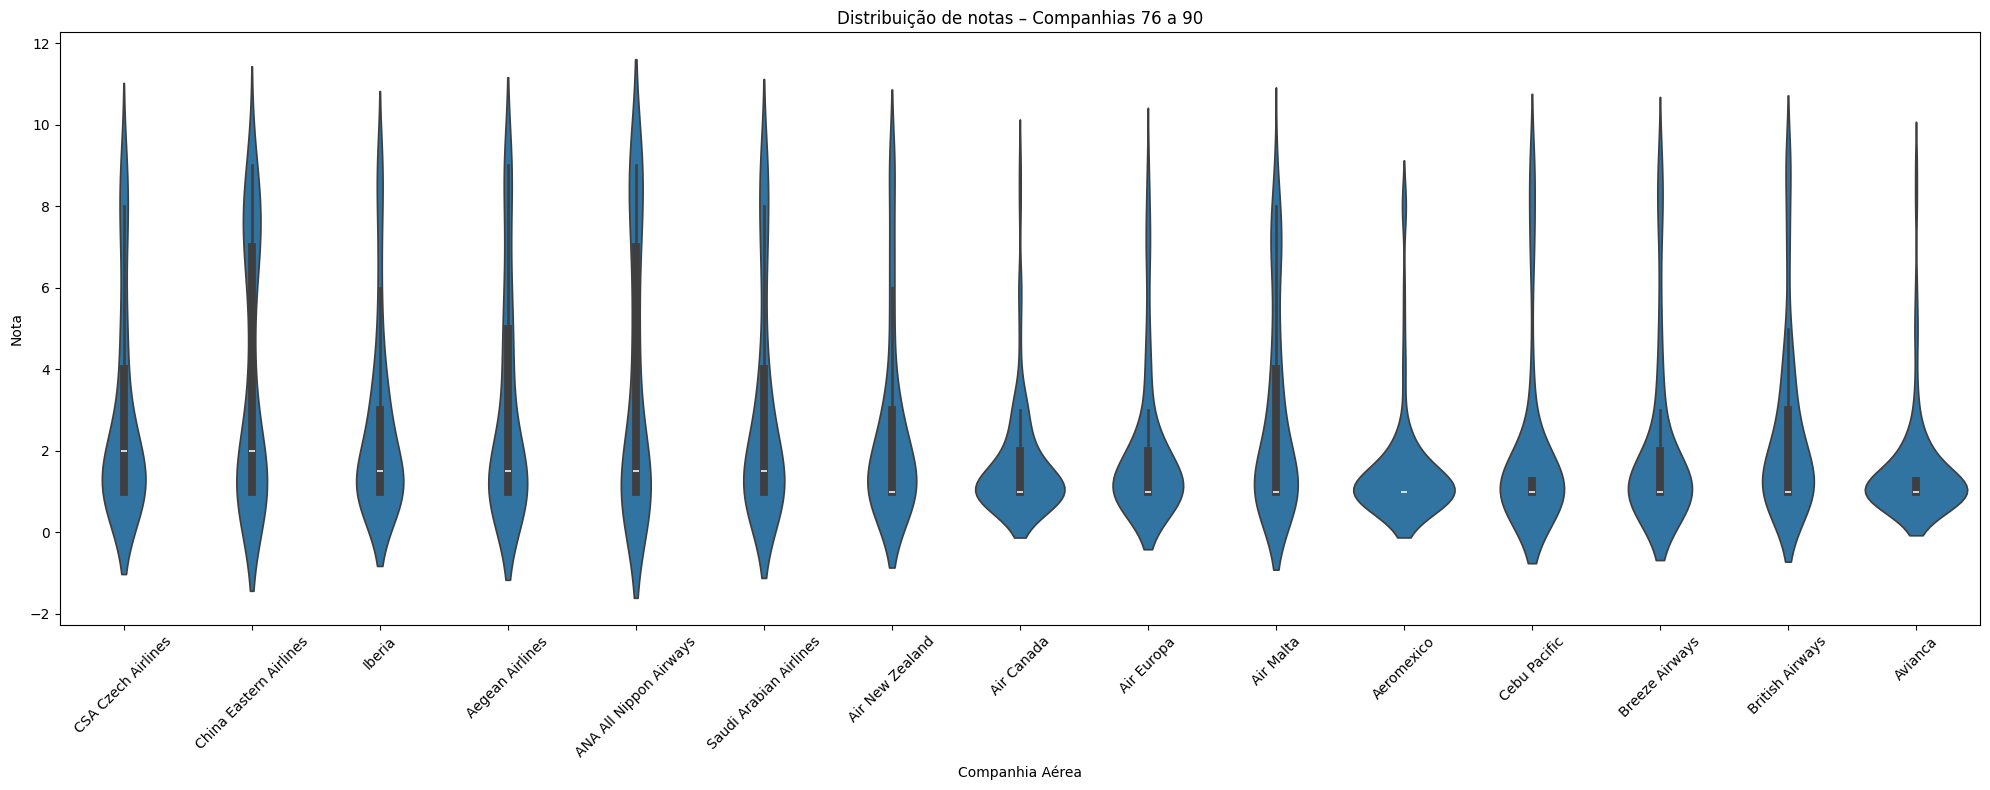

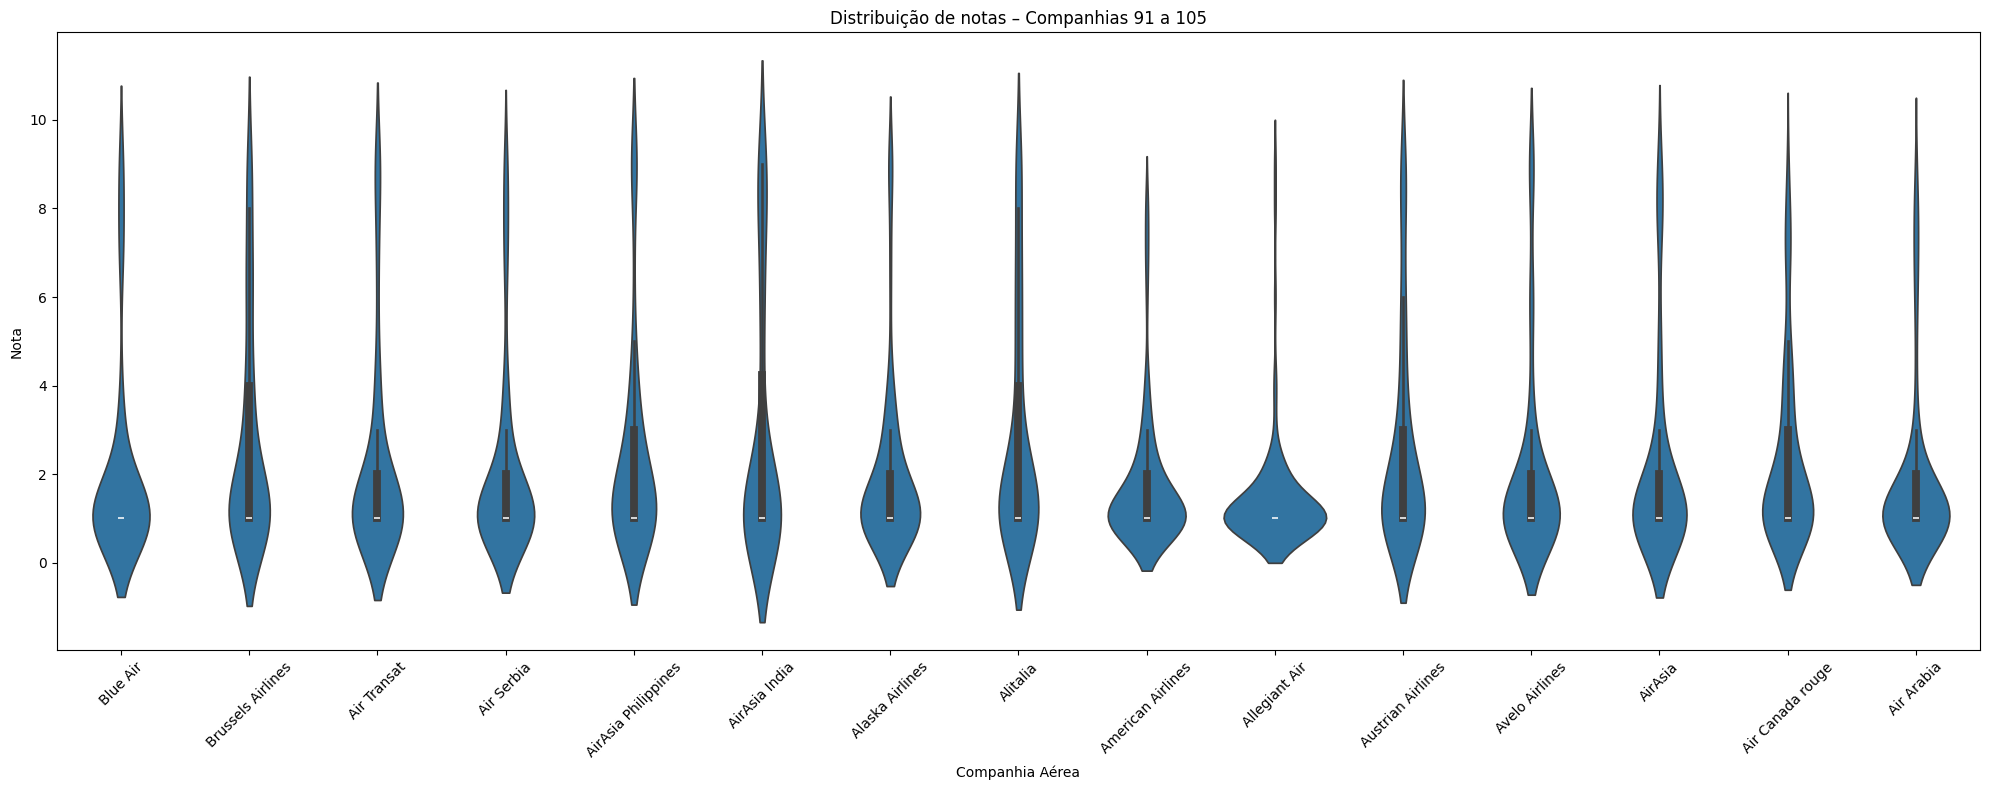

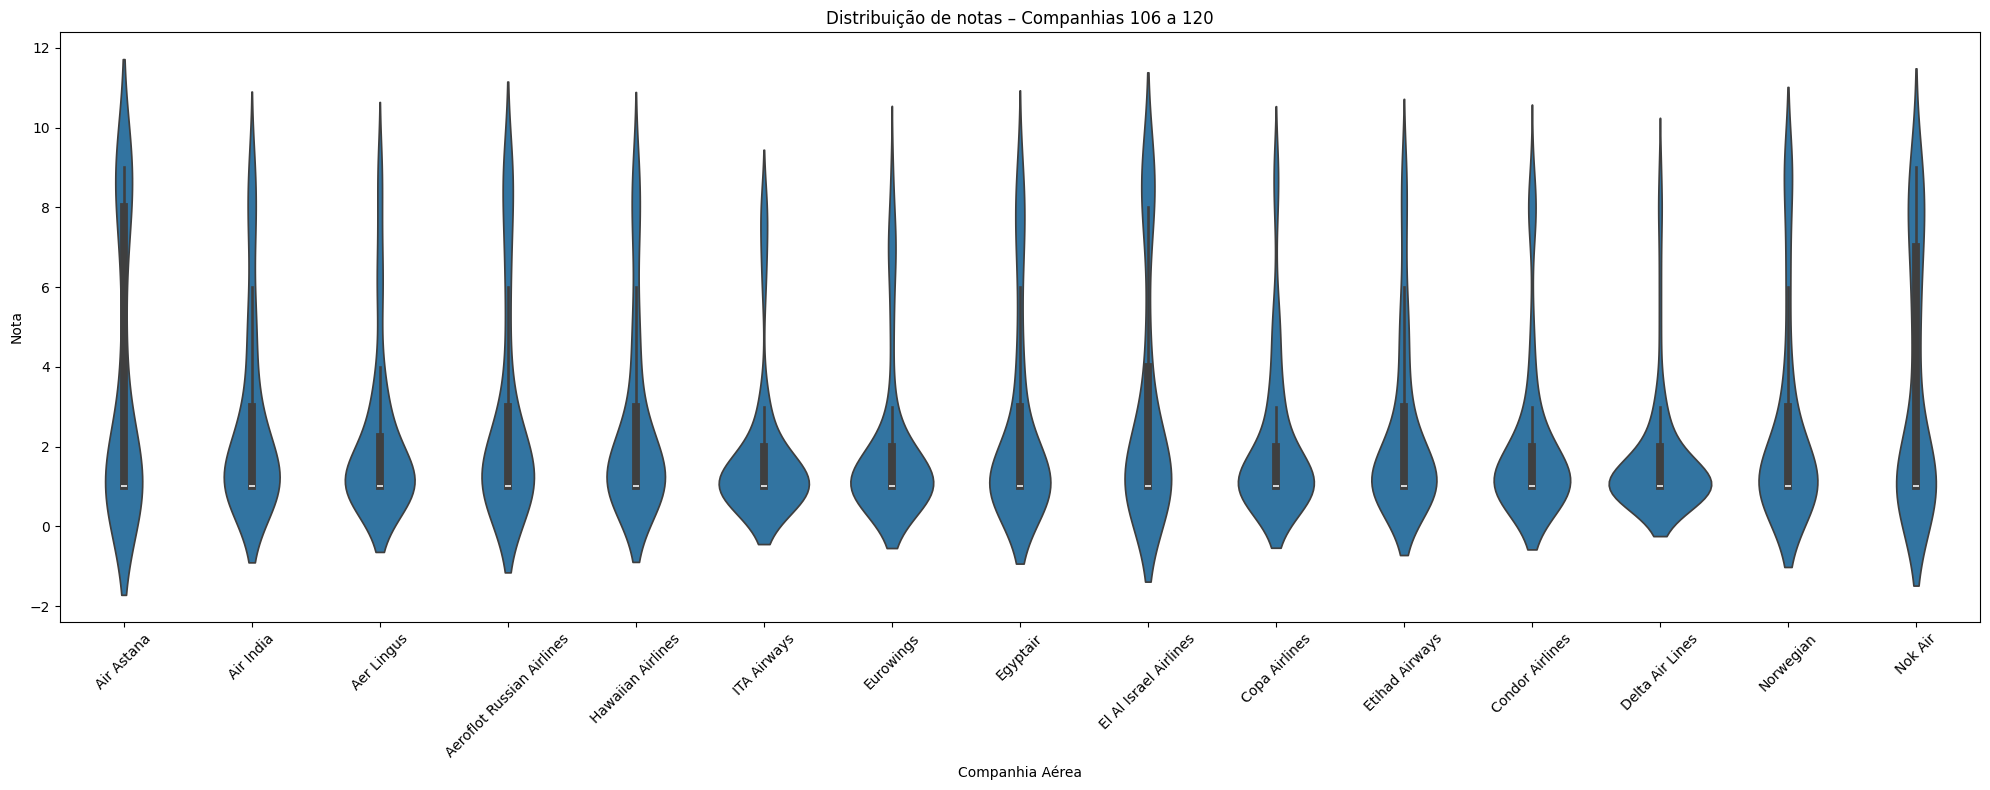

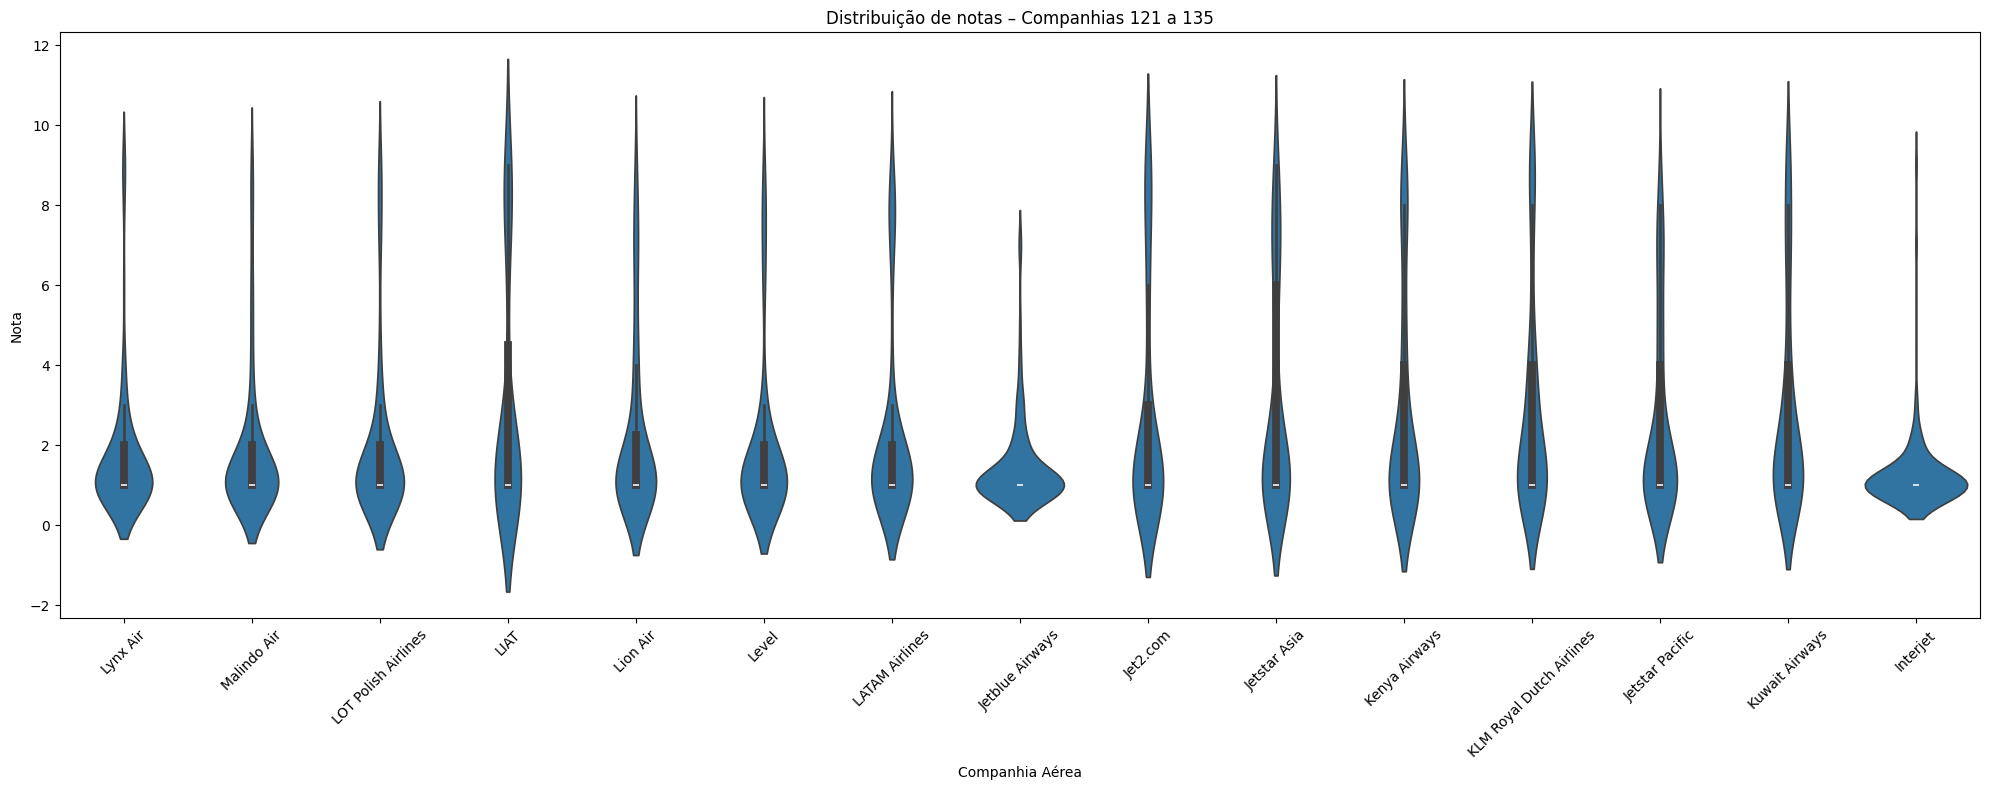

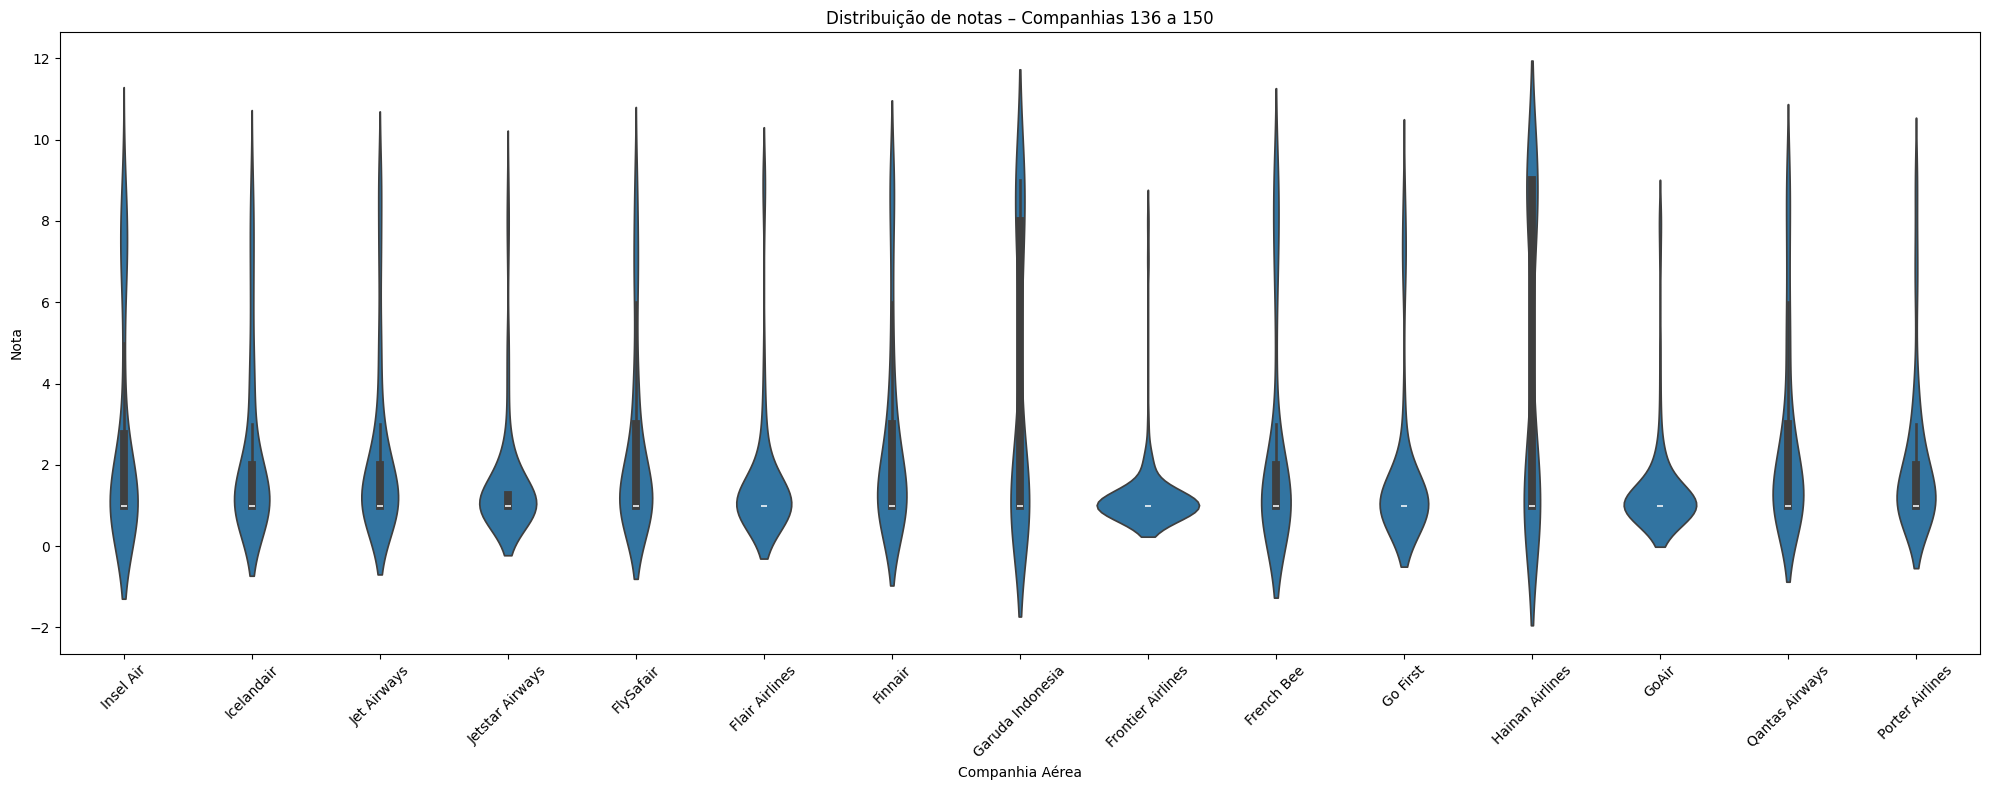

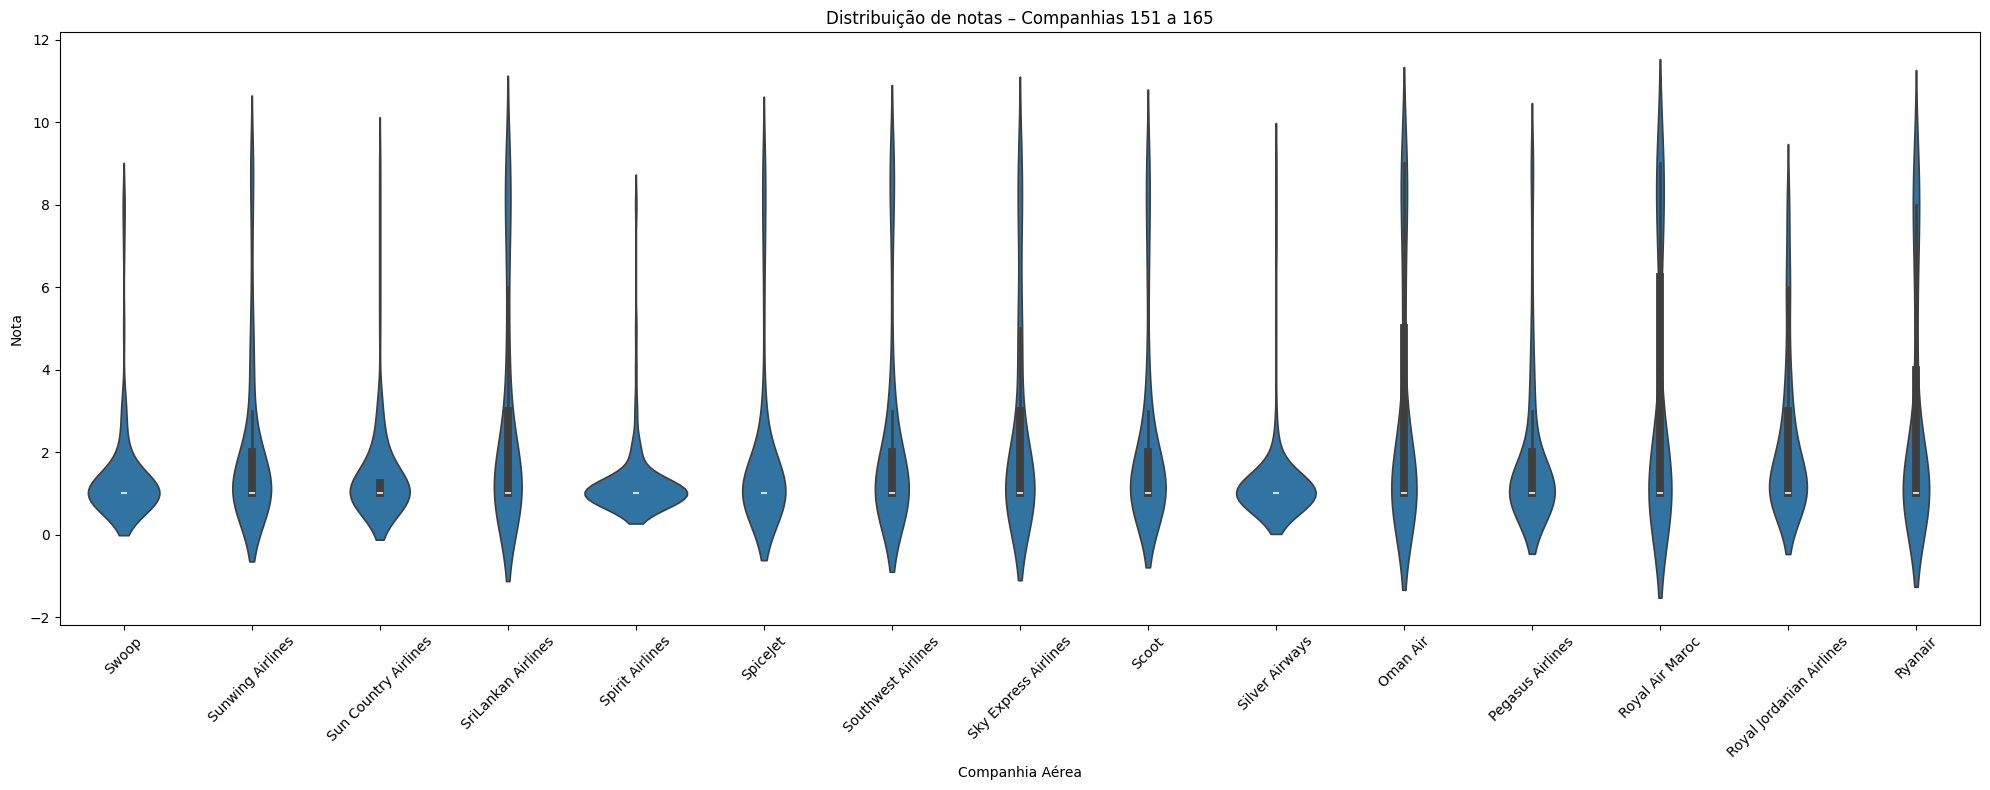

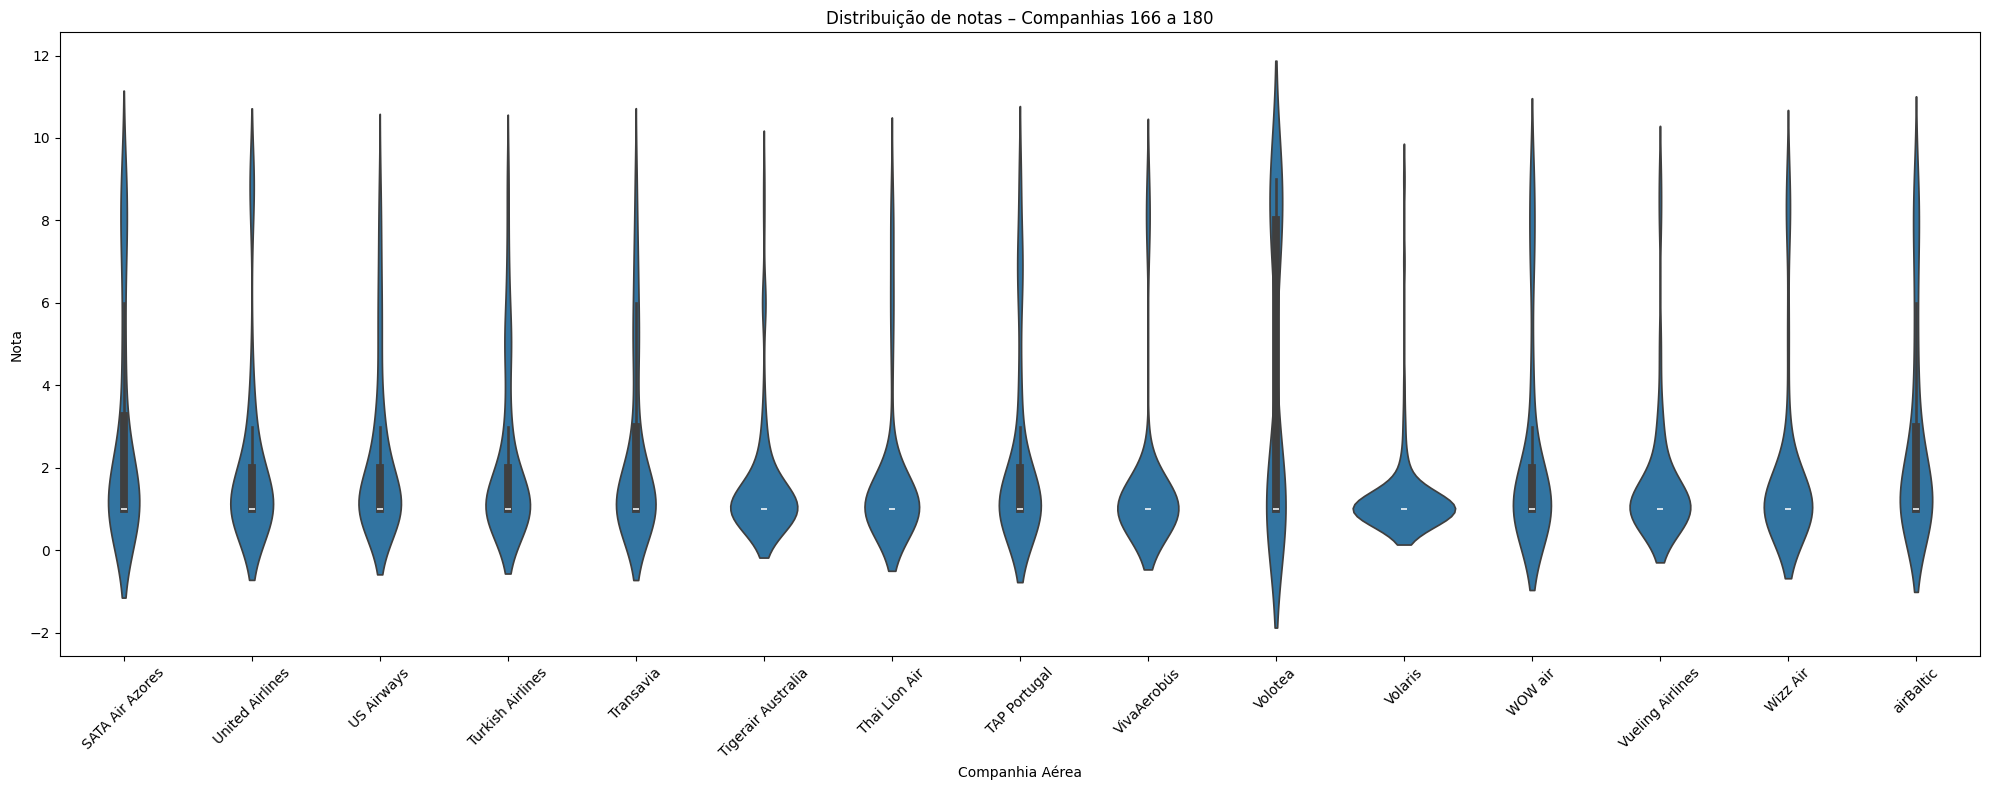

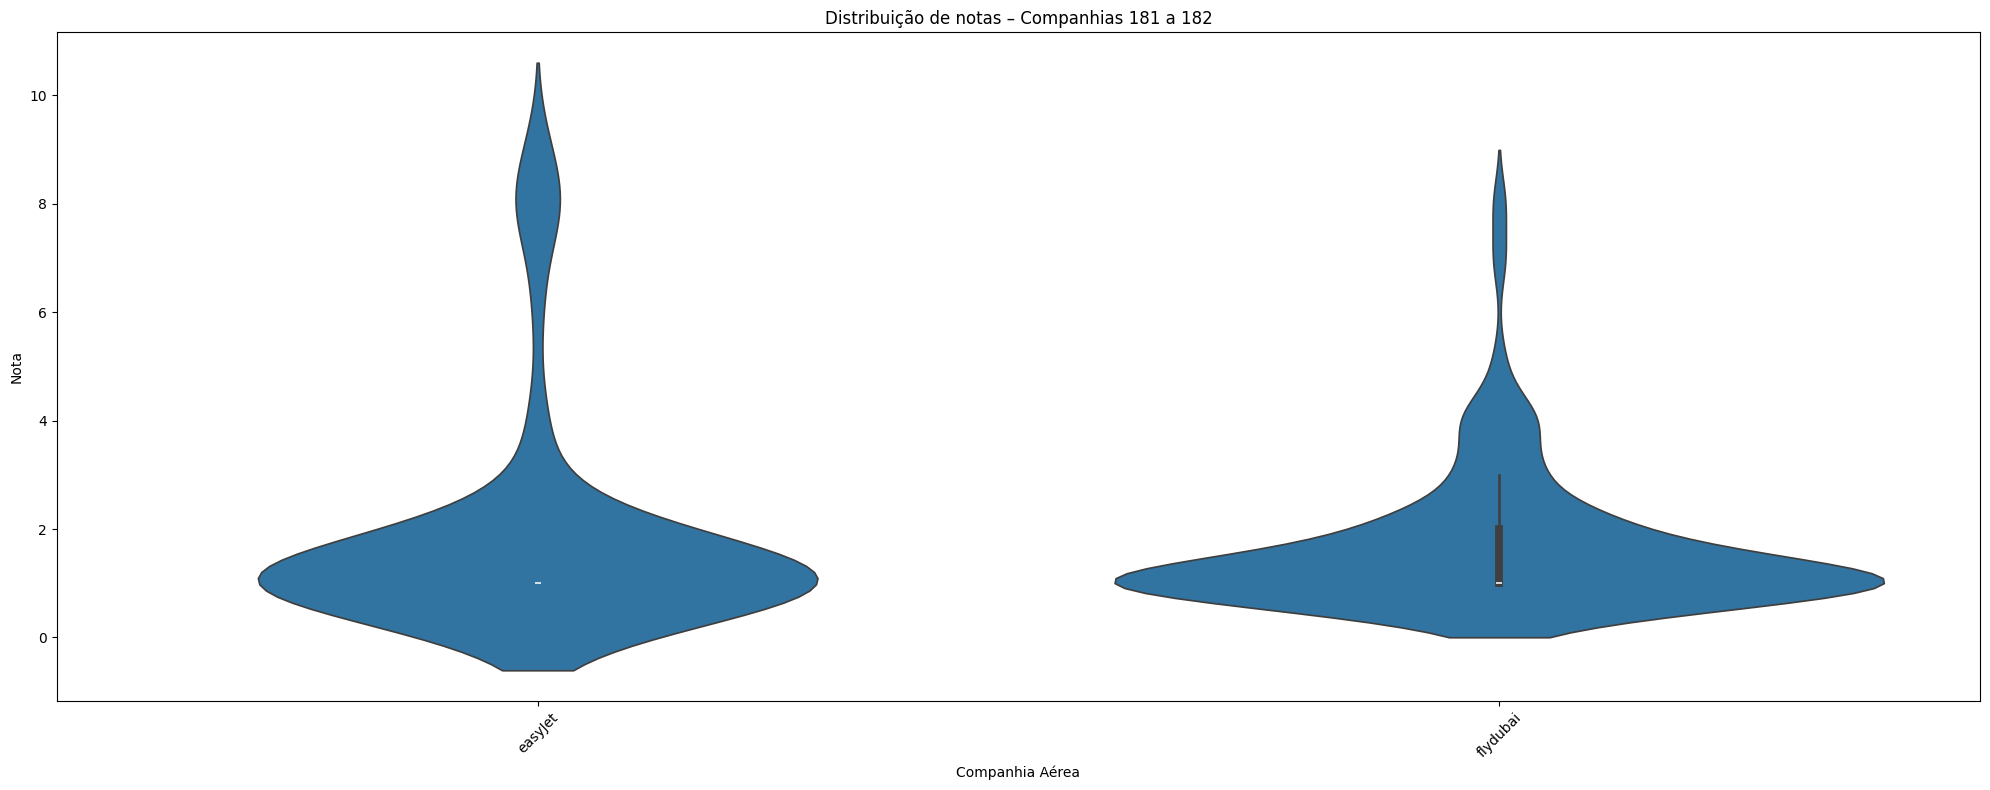

In [ ]:
tamanho_bloco = 15
for i in range(0, len(companhias_aereas_ordenadas), tamanho_bloco):
    subconjunto = companhias_aereas_ordenadas[i:i + tamanho_bloco]
    dados_subconjunto = dados[dados['Airline Name'].isin(subconjunto)]

    plt.figure(figsize=(20, 8))
    sns.violinplot(data=dados_subconjunto, x='Airline Name', y='Overall_Rating', order=subconjunto)
    plt.xticks(rotation=45)
    plt.title(f'Distribuição de notas – Companhias {i+1} a {i+len(subconjunto)}')
    plt.xlabel('Companhia Aérea')
    plt.ylabel('Nota')
    plt.tight_layout()
    plt.show()

Nessa visualização de violino, conseguimos perceber um fato ainda mais interessante. A concentração de votos dos passageiros se concentra bem mais em notas extremas, com valores próximos de 1 ou próximos da nota máxima, mesmo entre as companhias mais bem avaliadas, é um padrão dos passageiros votar em menor quantidade em notas intermediárias. Eles tem uma preferência em votar em notas muito boas quando estão satisfeitos ou notas muito baixas quando estão insatisfeitos.

Isso pode ser observado pelo padrão da imagem do violino que é mais largo na parte superior e na parte inferior, mas muito fino na região central.

Em companhias com as piores avaliações, o padrão é diferente, onde há uma concentração muito grande de notas baixas, próximas a 1, e pouca concentração de notas altas, o que acaba deixando a avaliação média muito baixa.

In [ ]:
tabela_estatisticas_companhias = dados.groupby('Airline Name')['Overall_Rating'].agg(
    contagem = 'count',
    media='mean',
    mediana='median',
    minimo='min',
    maximo='max',
    desvio_padrao='std'
)

tabela_estatisticas_companhias = tabela_estatisticas_companhias.sort_values(by='mediana', ascending=False)

tabela_estatisticas_companhias.reset_index(inplace=True)

In [ ]:
tabela_estatisticas_companhias

Airline Name  contagem     media  mediana  minimo  maximo  \
0    China Southern Airlines       100  6.310000      8.0     1.0     9.0   
1                 QantasLink        99  6.020202      8.0     1.0     9.0   
2                  Dragonair        95  5.705263      7.0     1.0     9.0   
3               Lao Airlines        72  5.736111      7.0     1.0     9.0   
4               Bulgaria Air        95  5.178947      7.0     1.0     9.0   
..                       ...       ...       ...      ...     ...     ...   
177         Vueling Airlines       100  1.640000      1.0     1.0     9.0   
178                 Wizz Air       100  1.860000      1.0     1.0     9.0   
179                airBaltic       100  2.660000      1.0     1.0     9.0   
180                  easyJet       100  1.830000      1.0     1.0     9.0   
181                 flydubai       100  1.650000      1.0     1.0     8.0   

     desvio_padrao  
0         3.535377  
1         3.133036  
2         2.960282  
3         3.245769  
4         3.451731  
..             ...  
177       1.623813  
178       2.108281  
179       2.523506  
180       2.015370  
181       1.250252  

[182 rows x 7 columns]

### Exploração de notas por modelo de aeronave

In [ ]:
modelos_aeronave_ordenados = dados.groupby('Aircraft_simplificado')['Overall_Rating'].median().sort_values(ascending=False).index

Para explorar a distribuição de notas por modelos de aeronave, podemos utilizar a mesma estratégia, a partir de um gráfico de boxplot.

Como foi realizado um tratamento nos dados de texto, reduzindo as categorias dos modelos de aeronave, o gráfico ficará bem mais reduzido e com interpretação mais simples.

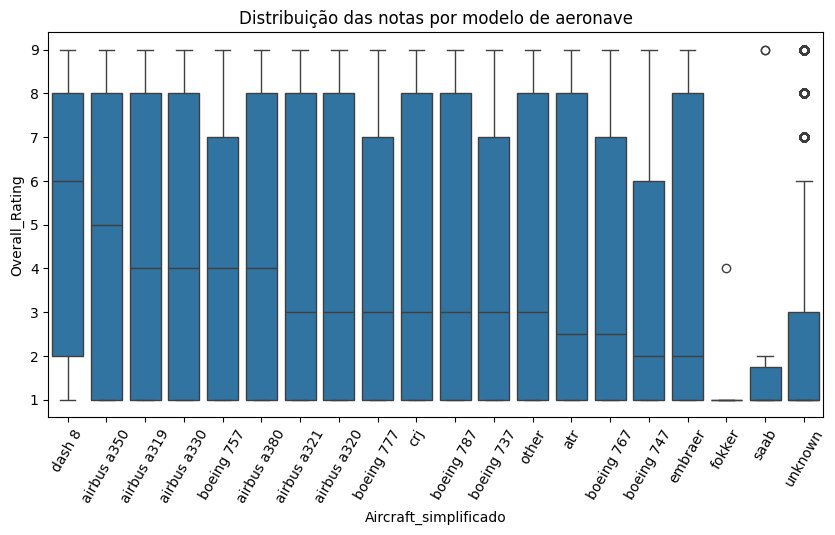

In [ ]:
plt.figure(figsize=(10,5))
sns.boxplot(data=dados, x='Aircraft_simplificado', y='Overall_Rating', order = modelos_aeronave_ordenados)
plt.xticks(rotation=60)
plt.title('Distribuição das notas por modelo de aeronave')
plt.show()

Em geral, a mediana da nota para os modelos de aeronave fica bem baixa, com valores entre 2 a 4. Os dois modelos que mais se destacam positivamente são o dash 8 e airbus a350, com medianas de 6 e 5.

Já os modelos que se destacam negativamente são o fokker e saab, com mediana 1.

Os modelos que não foram identificados, seja por serem dados nulos ou com informação discrepante deixada pelo passageiro também não tem uma avaliação geral muito boa, com mediana 1 e com alguns outliers de notas maiores.

Também podemos explorar o gráfico de violino para entender se o padrão se mantém aqui para os modelos de aeronave.

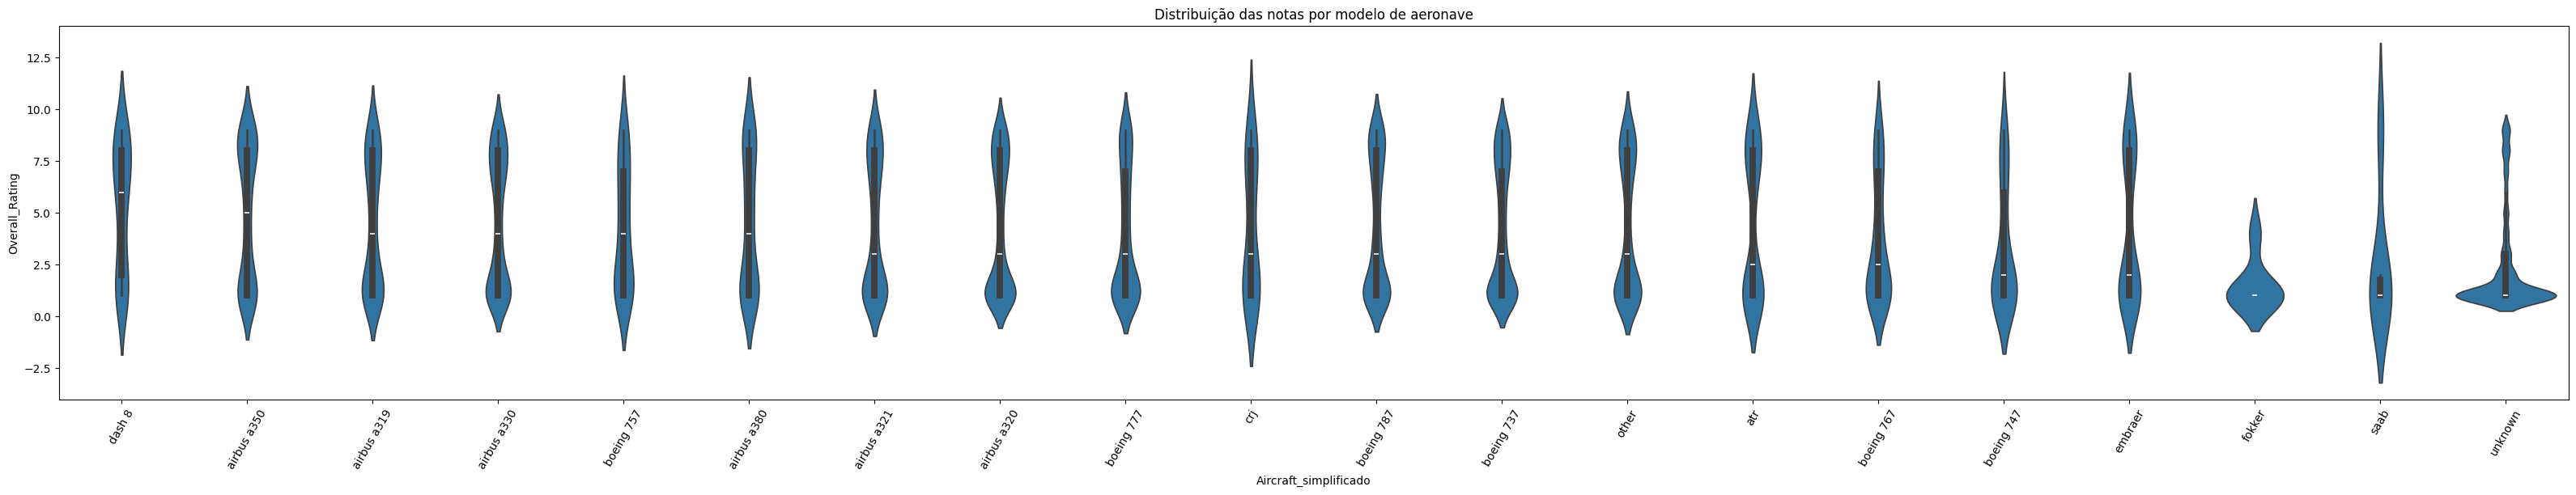

In [ ]:
plt.figure(figsize=(40,6))
sns.violinplot(data=dados, x='Aircraft_simplificado', y='Overall_Rating', order = modelos_aeronave_ordenados)
plt.xticks(rotation=60)
plt.title('Distribuição das notas por modelo de aeronave')
plt.show()

O padrão se mantém, com concentração de avaliações em valores extremos, notas altas e baixas são mais votadas, enquanto notas intermediárias são pouco frequentes.

O padrão para as piores avaliações também se repete, uma concentração alta em valores baixos e quase ou nenhuma concentração em valores altos.

In [ ]:
tabela_estatisticas_aeronaves = dados.groupby('Aircraft_simplificado')['Overall_Rating'].agg(
    contagem = 'count',
    media='mean',
    mediana='median',
    minimo='min',
    maximo='max',
    desvio_padrao='std'
)

tabela_estatisticas_aeronaves = tabela_estatisticas_aeronaves.sort_values(by='mediana', ascending=False)

tabela_estatisticas_aeronaves.reset_index(inplace=True)

In [ ]:
tabela_estatisticas_aeronaves

Aircraft_simplificado  contagem     media  mediana  minimo  maximo  \
0                 dash 8        46  5.260870      6.0     1.0     9.0   
1            airbus a350       270  4.985185      5.0     1.0     9.0   
2            airbus a319       202  4.485149      4.0     1.0     9.0   
3            airbus a330       596  4.531879      4.0     1.0     9.0   
4             boeing 757        54  4.203704      4.0     1.0     9.0   
5            airbus a380       101  4.495050      4.0     1.0     9.0   
6            airbus a321       349  4.323782      3.0     1.0     9.0   
7            airbus a320      1067  4.279288      3.0     1.0     9.0   
8             boeing 777       437  3.967963      3.0     1.0     9.0   
9                    crj        24  4.208333      3.0     1.0     9.0   
10            boeing 787       653  4.332312      3.0     1.0     9.0   
11            boeing 737      1053  4.193732      3.0     1.0     9.0   
12                 other       474  4.240506      3.0     1.0     9.0   
13                   atr        98  4.387755      2.5     1.0     9.0   
14            boeing 767        90  3.644444      2.5     1.0     9.0   
15            boeing 747        41  3.292683      2.0     1.0     9.0   
16               embraer        84  4.119048      2.0     1.0     9.0   
17                fokker         6  1.500000      1.0     1.0     4.0   
18                  saab        10  2.700000      1.0     1.0     9.0   
19               unknown     11713  2.375139      1.0     1.0     9.0   

    desvio_padrao  
0        3.072710  
1        3.256073  
2        3.118278  
3        3.097951  
4        2.922777  
5        3.211304  
6        3.154277  
7        3.151100  
8        3.070857  
9        3.216522  
10       3.188574  
11       3.091826  
12       3.202332  
13       3.427098  
14       2.927249  
15       2.951643  
16       3.356004  
17       1.224745  
18       3.335000  
19       2.406333

## Análise de nuvem de palavras

Agora vamos analisar as palavras mais frequentes deixadas nas análises dos passageiros, sejam em análises positivas ou negativas.

Vamos filtrar os textos com base na nota deixada pelo passageiro, onde o texto é negativo caso tenha uma nota menor ou igual a 3. Um texto é considerado positivo caso tenha nota maior ou igual a 8.

Podemos agrupar todo o texto positivo em uma mesma string e todo o texto negativo em outra string. Desse modo é possível contar a frequência de palavras desses textos e criar uma visualização de nuvem de palavras, que destaca palavras com mais frequência com um tamanho maior na imagem, enquanto palavras menos frequentes ficam pequenas.

In [ ]:
texto_negativo = ' '.join(dados[dados['Overall_Rating'] <= 3]['Review processada'])
texto_positivo = ' '.join(dados[dados['Overall_Rating'] >= 8]['Review processada'])

In [ ]:
from wordcloud import WordCloud

In [ ]:
wordcloud_negativa = WordCloud(width=800, height=400, background_color='white', colormap='OrRd').generate(texto_negativo)
wordcloud_positiva = WordCloud(width=800, height=400, background_color='white', colormap='winter_r').generate(texto_positivo)

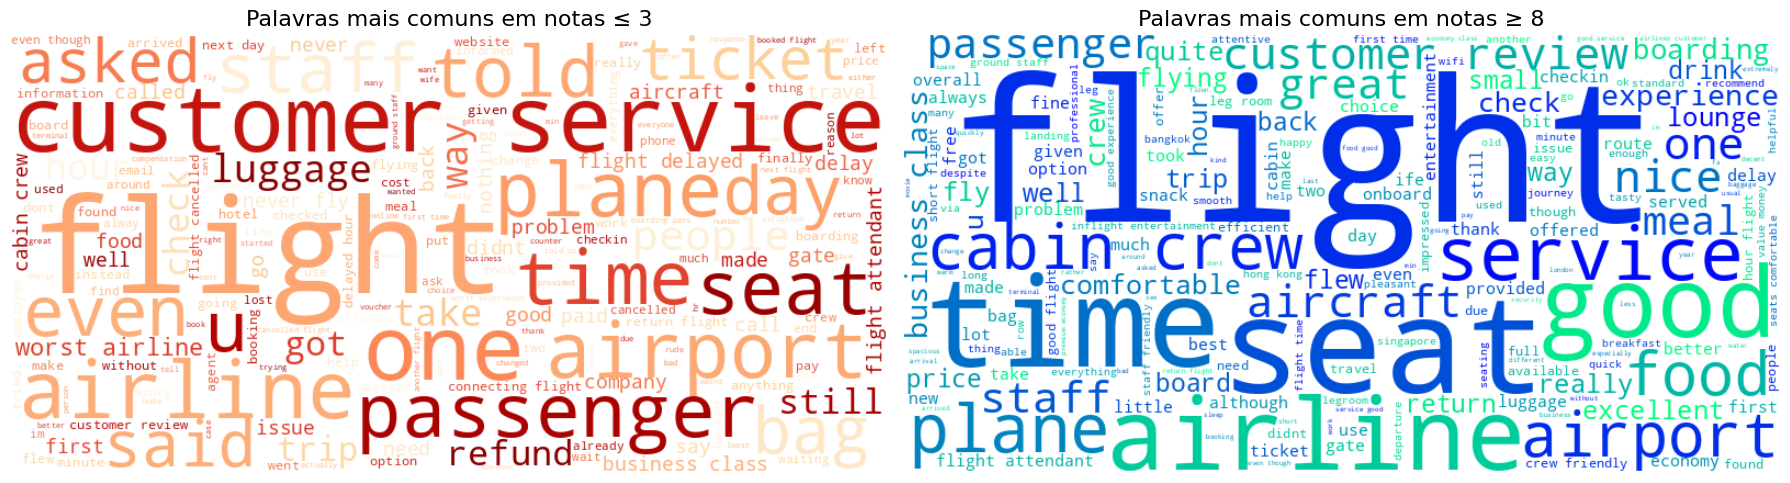

In [ ]:
plt.figure(figsize=(18, 8))

plt.subplot(1, 2, 1)
plt.imshow(wordcloud_negativa, interpolation='bilinear')
plt.title('Palavras mais comuns em notas ≤ 3', fontsize=16)
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(wordcloud_positiva, interpolation='bilinear')
plt.title('Palavras mais comuns em notas ≥ 8', fontsize=16)
plt.axis('off')

plt.tight_layout()
plt.show()

**Avaliações negativas**

Em avaliações negativas (notas <=3), na imagem da esquerda, podemos notar presença de palavras óbvias de cunho negativo como:

- problem
- worst airline
- worst experience
- issue
- never fly

Que ajudam a identificar que o texto se trata de algo negativo, e que pode ser útil em um algoritmo de análise de sentimento. Mas ao mesmo tempo, podemos identificar possíveis causas da review do passageiro, ou seja, a motivação da insatisfação, em palavras como:

- delay
- refund
- waiting
- flight delayed
- cancelled
- luggage
- staff
- seat
- cabin crew

Que pode identificar motivos como espera, demora, atrasos, cancelamentoos, reembolsos, algo que aconteceu com a bagagem, assento ruim, algo com a bagagem, algo com o serviço de atendimento no voo.

---

**Avaliações positivas**

Em avaliações positivas (notas >=8), na imagem da direita, podemos notar presença de palavras óbvias de cunho positivas como:

- good
- excellent
- well
- easy
- nice
- great
- experience

Que ajudam a identificar que o texto se trata de algo positivo, e que pode ser útil em um algoritmo de análise de sentimento. Mas ao mesmo tempo, podemos identificar possíveis causas da review do passageiro, ou seja, a motivação da satisfação, em palavras como:

- meal
- food
- entertainment
- service
- wifi
- free
- drink

Que pode identificar motivos como boa comida, bom entretenimento, bom serviço, boa bebida.

## Estudo de correlação

Vamos agora analisar as variáveis numéricas, calculando a correlação das variáveis para compreender o impacto das avaliações segmentadas na avaliação geral do passageiro.

Vamos selecionar apenas as variáveis de interesse e depois vamos calcular a correlação entre as variáveis. A função automaticamente remove os dados nulos ao calcular a correlação entre duas variáveis.

In [ ]:
colunas_numericas = ['Seat Comfort', 'Cabin Staff Service', 'Food & Beverages',
           'Ground Service', 'Inflight Entertainment',
           'Wifi & Connectivity','Overall_Rating'
]

In [ ]:
dados_corr = dados[colunas_numericas]

In [ ]:
dados_corr

Seat Comfort  Cabin Staff Service  Food & Beverages  Ground Service  \
0               NaN                  NaN               NaN             NaN   
1               NaN                  NaN               NaN             NaN   
2               3.0                  4.0               4.0             NaN   
3               3.0                  4.0               0.0             NaN   
4               4.0                  4.0               4.0             NaN   
...             ...                  ...               ...             ...   
17668           1.0                  1.0               NaN             1.0   
17669           2.0                  2.0               1.0             1.0   
17670           1.0                  1.0               1.0             1.0   
17671           3.0                  4.0               NaN             4.0   
17672           3.0                  4.0               4.0             3.0   

       Inflight Entertainment  Wifi & Connectivity  Overall_Rating  
0                         NaN                  NaN             8.0  
1                         NaN                  NaN             1.0  
2                         2.0                  NaN             9.0  
3                         0.0                  NaN             8.0  
4                         0.0                  NaN             7.0  
...                       ...                  ...             ...  
17668                     NaN                  NaN             1.0  
17669                     NaN                  NaN             1.0  
17670                     1.0                  1.0             1.0  
17671                     NaN                  NaN             7.0  
17672                     NaN                  NaN             9.0  

[17368 rows x 7 columns]

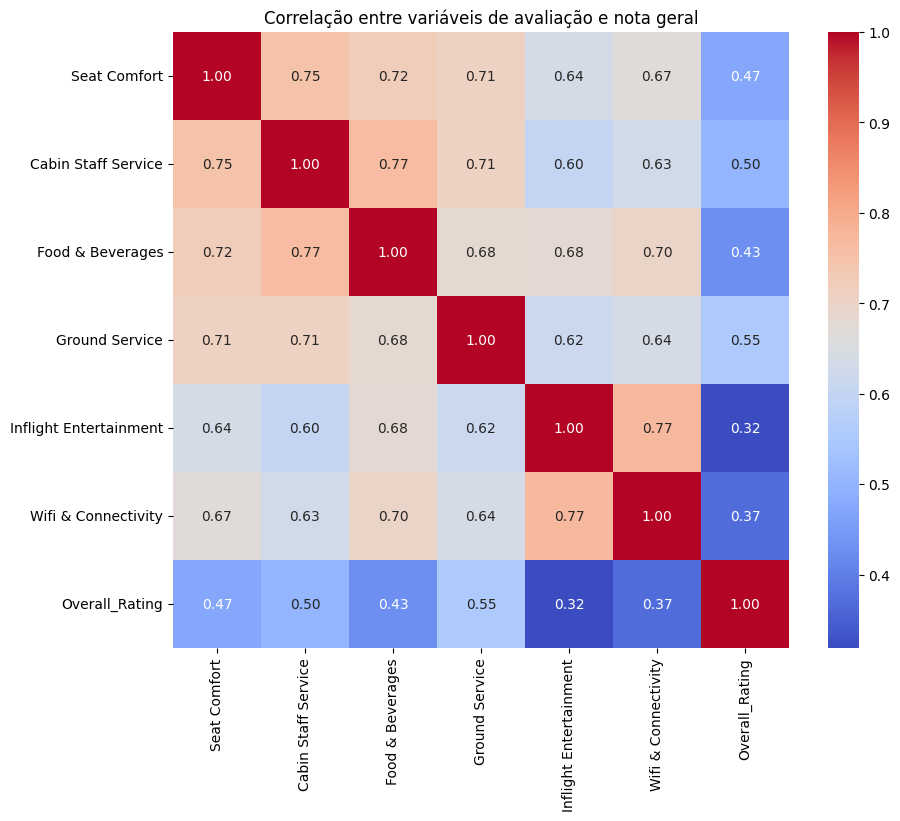

In [ ]:
matriz_correlacao = dados_corr.corr(method='pearson')
plt.figure(figsize=(10, 8))
sns.heatmap(matriz_correlacao, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title('Correlação entre variáveis de avaliação e nota geral')
plt.show()

Aplicando diretamente a correlação, conseguimos avaliar na **última linha ou última coluna** a relação entre a variável Overall_Rating com cada variável numérica.

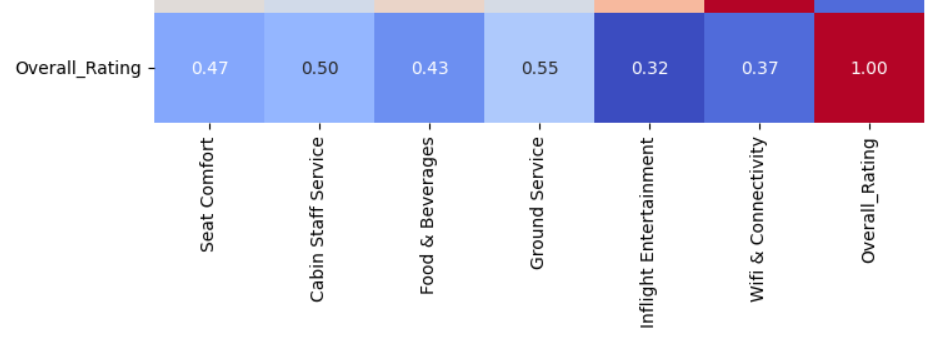

A correlação entre essas variáveis é positiva, indica que quando uma variável aumenta a outra também aumenta, mas com intensidade fraca a média, por serem valores entre 0.32 a 0.55.

Porém, se desejarmos criar um modelo de machine learning com essas variáveis, não iremos conseguir usar os dados se existir dados faltantes.

Vamos utilizar 2 estratégias distintas para conseguir construir o modelo e ver o impacto dessas estratégias na correlação e consequentemente no modelo de machine learning. Vamos começar removendo todos os dados nulos.

### Correlação excluindo dados nulos

In [ ]:
dados_corr_sem_nulos = dados[colunas_numericas].dropna()
dados_corr_sem_nulos

Seat Comfort  Cabin Staff Service  Food & Beverages  Ground Service  \
10              5.0                  5.0               5.0             5.0   
15              1.0                  3.0               1.0             2.0   
21              1.0                  2.0               1.0             1.0   
22              1.0                  1.0               1.0             1.0   
26              1.0                  1.0               1.0             1.0   
...             ...                  ...               ...             ...   
17655           3.0                  2.0               1.0             1.0   
17659           1.0                  1.0               1.0             1.0   
17666           4.0                  5.0               5.0             3.0   
17667           1.0                  1.0               1.0             1.0   
17670           1.0                  1.0               1.0             1.0   

       Inflight Entertainment  Wifi & Connectivity  Overall_Rating  
10                        2.0                  2.0             1.0  
15                        4.0                  1.0             2.0  
21                        1.0                  1.0             1.0  
22                        1.0                  1.0             1.0  
26                        1.0                  1.0             1.0  
...                       ...                  ...             ...  
17655                     1.0                  1.0             2.0  
17659                     2.0                  2.0             2.0  
17666                     5.0                  3.0             9.0  
17667                     1.0                  1.0             1.0  
17670                     1.0                  1.0             1.0  

[4767 rows x 7 columns]

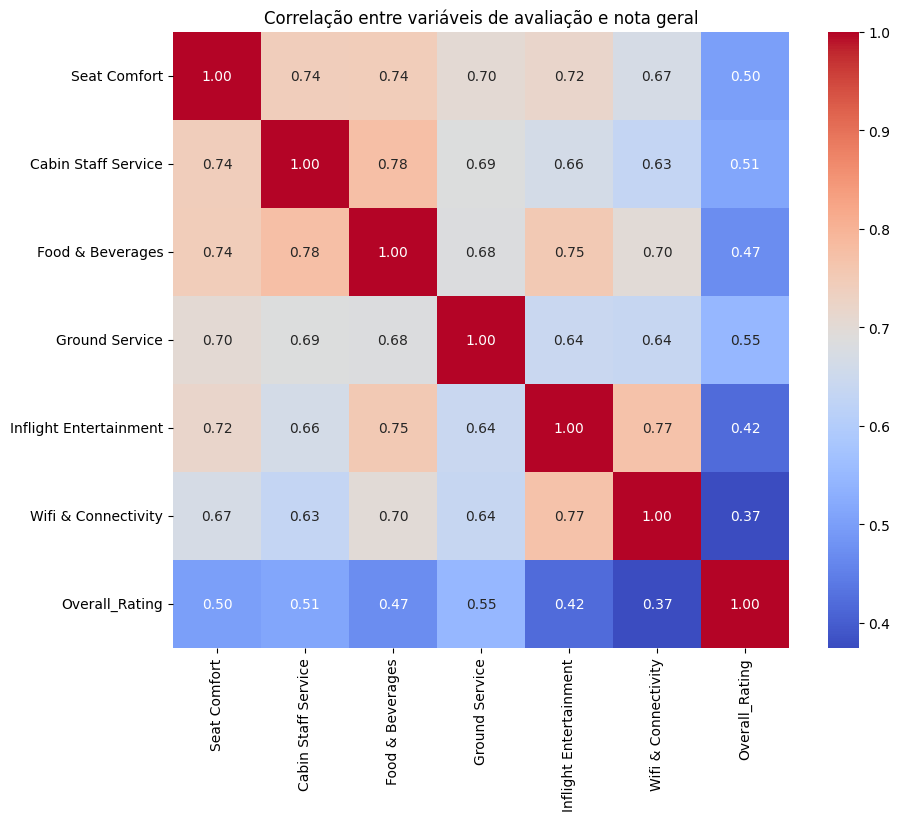

In [ ]:
matriz_correlacao = dados_corr_sem_nulos.corr(method='pearson')
plt.figure(figsize=(10, 8))
sns.heatmap(matriz_correlacao, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title('Correlação entre variáveis de avaliação e nota geral')
plt.show()

Nesta abordagem, todas as correlações entre as variáveis aumentaram ou permaneceram iguais. Podemos interpretar que essa abordagem pode ajudar o modelo a ter um desempenho melhor, **porém essa estratégia pode não ser uma boa opção.**

Como estamos removendo as informações, restou apenas 4767 registros na base de dados, comparados a 17368 registros totais. É uma perda de informação muito grande, o que pode não refletir a realidade e pode ser uma visão otimista enganosa.

### Correlação preenchendo valores nulos pelo valor mais frequente

Agora vamos tentar uma estratégia diferente, preenchendo os valores nulos pelo valor mais frequente. Como todas as variáveis possuem valor mais frequente igual a 1, como foi visto na exploração inicial dos dados, vamos preencher com esse valor.

In [ ]:
dados_corr_inferencia = dados[colunas_numericas].fillna(1.0)
dados_corr_inferencia

Seat Comfort  Cabin Staff Service  Food & Beverages  Ground Service  \
0               1.0                  1.0               1.0             1.0   
1               1.0                  1.0               1.0             1.0   
2               3.0                  4.0               4.0             1.0   
3               3.0                  4.0               0.0             1.0   
4               4.0                  4.0               4.0             1.0   
...             ...                  ...               ...             ...   
17668           1.0                  1.0               1.0             1.0   
17669           2.0                  2.0               1.0             1.0   
17670           1.0                  1.0               1.0             1.0   
17671           3.0                  4.0               1.0             4.0   
17672           3.0                  4.0               4.0             3.0   

       Inflight Entertainment  Wifi & Connectivity  Overall_Rating  
0                         1.0                  1.0             8.0  
1                         1.0                  1.0             1.0  
2                         2.0                  1.0             9.0  
3                         0.0                  1.0             8.0  
4                         0.0                  1.0             7.0  
...                       ...                  ...             ...  
17668                     1.0                  1.0             1.0  
17669                     1.0                  1.0             1.0  
17670                     1.0                  1.0             1.0  
17671                     1.0                  1.0             7.0  
17672                     1.0                  1.0             9.0  

[17368 rows x 7 columns]

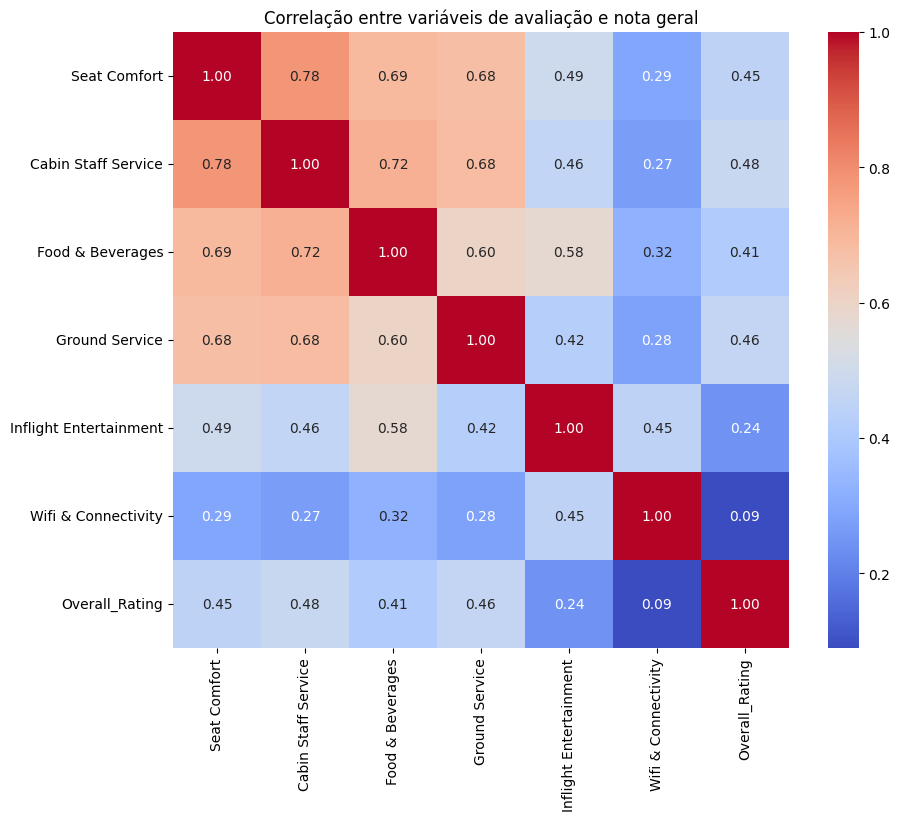

In [ ]:
matriz_correlacao = dados_corr_inferencia.corr(method='pearson')
plt.figure(figsize=(10, 8))
sns.heatmap(matriz_correlacao, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title('Correlação entre variáveis de avaliação e nota geral')
plt.show()

Nessa abordagem, a correlação das variáveis diminui, principalmente nas variáveis Inflight Entertainment e Wifi & Connectivity, que eram variáveis com a presença muito alta de dados nulos, 47% e 70% de dados nulos respectivamente. Isso fez com que a correlação dessas variáveis se tornasse nula ou irrelevante.

Apesar do menor desempenho, essa abordagem seria melhor aproveitada, uma vez que não descarta nenhum dado nulo e faz com que o modelo sempre consiga fazer a previsão do sentimento de um passageiro, uma vez que se o passageiro deixar algum valor nulo, será preenchido com valor 1 antes de realizar a previsão.

Contudo, essa abordagem também tem seus pontos negativos, uma vez que pode não refletir a realidade, já que estão sendo imputados dados.




## Classificação de sentimentos

### Transformando a variável resposta

Agora vamos iniciar o processo de modelagem. Vamos realizar a transformação da variável Overall_Rating em 3 categorias distintas para utilizar modelos de classificação.

Caso a nota do Overall_Rating seja menor que 4, será considerado o sentimento negativo. Caso a nota seja maior ou igual a 4 e menor que 7, será considerado sentimento neutro. E se a nota for maior ou igual a 7, será considerado sentimento positivo.

In [ ]:
def transforma_sentimento(nota):
    if nota < 4:
        return 'Negativo'
    elif 4 <= nota < 7:
        return 'Neutro'
    elif nota >= 7:
        return 'Positivo'

dados['sentimento'] = dados['Overall_Rating'].apply(transforma_sentimento)

In [ ]:
dados[['Overall_Rating', 'sentimento']]

Overall_Rating sentimento
0                 8.0   Positivo
1                 1.0   Negativo
2                 9.0   Positivo
3                 8.0   Positivo
4                 7.0   Positivo
...               ...        ...
17668             1.0   Negativo
17669             1.0   Negativo
17670             1.0   Negativo
17671             7.0   Positivo
17672             9.0   Positivo

[17368 rows x 2 columns]

Para treinamento e comparação dos modelos, vamos utilizar a divisão dos dados entre treino e teste, de forma estratificada, de modo que a variável resposta mantenha a proporção entre as categorias de sentimento.

Vamos utilizar 3 algoritmos que são bastante utilizados em classificação para análise de sentimentos:

- Naive Bayes
- Máquina de vetores de suporte
- Floresta aleatória

A implementação desses modelos na biblioteca Sci-kit Learn **permite a utilização da variável resposta no formato textual**, portanto não será necessário realizar transformação na variável resposta.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.metrics import classification_report

from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

Vamos comparar o treinamento do modelo usando as reviews processadas e as reviews lematizadas e visualizar aquela que tem o melhor desempenho.

In [ ]:
X_texto = dados[['Review processada', 'Review lematizada']]
y = dados['sentimento']

X_treino, X_teste, y_treino, y_teste = train_test_split(X_texto, y,
                                                        test_size=0.2,
                                                        random_state=42,
                                                        stratify = y)

Depois de realizar a separação entre conjunto de dados de treinamento e teste, vamos utilizar a estratégia de vetorização TF-IDF que atribui pesos as palavras que tem maior frequência e que ao mesmo tempo diferenciam mais as 3 categorias distintas.

Essa transformação nos dados fará com que a base de dados seja interpretada pelo modelo a partir de números.

In [ ]:
tf_idf = TfidfVectorizer(max_features=5000)
X_treino_tfidf = tf_idf.fit_transform(X_treino['Review processada'])
X_teste_tfidf = tf_idf.transform(X_teste['Review processada'])

In [ ]:
modelos = {
    'Naive Bayes': MultinomialNB(),
    'SVM': SVC(),
    'Random Forest': RandomForestClassifier()
}

for nome_modelo, modelo in modelos.items():
    modelo.fit(X_treino_tfidf, y_treino)
    y_previsto = modelo.predict(X_teste_tfidf)

    print(f'\nModelo: {nome_modelo}')
    print('Relatório de classificação:\n', classification_report(y_teste, y_previsto))
    print('---------------------------------------------------------------------')


Modelo: Naive Bayes
Relatório de classificação:
               precision    recall  f1-score   support

    Negativo       0.85      0.91      0.88      2458
      Neutro       0.40      0.01      0.01       339
    Positivo       0.58      0.71      0.64       677

    accuracy                           0.78      3474
   macro avg       0.61      0.54      0.51      3474
weighted avg       0.75      0.78      0.75      3474

---------------------------------------------------------------------

Modelo: SVM
Relatório de classificação:
               precision    recall  f1-score   support

    Negativo       0.84      0.94      0.89      2458
      Neutro       0.50      0.01      0.02       339
    Positivo       0.66      0.71      0.68       677

    accuracy                           0.80      3474
   macro avg       0.67      0.55      0.53      3474
weighted avg       0.77      0.80      0.76      3474

---------------------------------------------------------------------

Model

Comparando os resultados dos modelos utilizando as reviews processadas sem a lematização, percebemos que o desempenho do SVM se saiu um pouco melhor que os demais, com taxa de acerto de 80%, comparada com 78% do Naive Bayes e 77% do Random Forest.

A taxa de acerto da classe Negativo é a melhor dentre as classes. A classe Neutro tem um desempenho muito fraco, o modelo tem muita dificuldade em conseguir detectar corretamente análises com sentimento neutro.

Isso pode ter acontecido pela diferença da quantidade de registros de cada classe. Existem poucas análises consideradas neutras em comparação com a quantidade de análises positivas e negativas, como já havíamos observado na análise gráfica com o violinplot.

Agora vamos realizar o treinamento utilizando as reviews lematizadas.

In [ ]:
tf_idf = TfidfVectorizer(max_features=5000)
X_treino_tfidf = tf_idf.fit_transform(X_treino['Review lematizada'])
X_teste_tfidf = tf_idf.transform(X_teste['Review lematizada'])

In [ ]:
modelos = {
    'Naive Bayes': MultinomialNB(),
    'SVM': SVC(),
    'Random Forest': RandomForestClassifier()
}

for nome_modelo, modelo in modelos.items():
    modelo.fit(X_treino_tfidf, y_treino)
    y_previsto = modelo.predict(X_teste_tfidf)

    print(f'\nModelo: {nome_modelo}')
    print('Relatório de classificação:\n', classification_report(y_teste, y_previsto))
    print('---------------------------------------------------------------------')


Modelo: Naive Bayes
Relatório de classificação:
               precision    recall  f1-score   support

    Negativo       0.83      0.93      0.88      2458
      Neutro       0.00      0.00      0.00       339
    Positivo       0.61      0.65      0.63       677

    accuracy                           0.78      3474
   macro avg       0.48      0.53      0.50      3474
weighted avg       0.71      0.78      0.74      3474

---------------------------------------------------------------------

Modelo: SVM
Relatório de classificação:
               precision    recall  f1-score   support

    Negativo       0.84      0.93      0.88      2458
      Neutro       0.57      0.02      0.05       339
    Positivo       0.65      0.70      0.68       677

    accuracy                           0.80      3474
   macro avg       0.69      0.55      0.54      3474
weighted avg       0.78      0.80      0.76      3474

---------------------------------------------------------------------

Model

O desempenho dos modelos ficaram praticamente inalterados, portanto essa técnica não teve um impacto tão significativo e não é necessário. Podemos manter os textos sem essa técnica para evitar processamento de texto desnecessário no momento da previsão de novos dados.

Com isso, **podemos escolher o modelo SVM usando as reviews sem a lematização como o melhor modelo**.

### Modelos a partir das variáveis de notas

Agora vamos realizar o treinamento de modelos usando as variáveis numéricas, contendo as notas relativas a cada categoria. Vamos utilizar as duas abordagens em relação ao tratamento dos dados nulos.

Primeiramente vamos remover os dados nulos e realizar o treinamento do modelo e depois vamos realizar a substituição dos dados nulos pelo valor mais frequente de cada variável, que no caso é o valor 1.

In [ ]:
dados_avaliacoes_segmentadas = dados[['Seat Comfort',
                                      'Cabin Staff Service',
                                      'Food & Beverages' ,
                                      'Ground Service',
                                      'Inflight Entertainment',
                                      'Wifi & Connectivity',
                                      'sentimento']]

In [ ]:
dados_avaliacoes_segmentadas_sem_nulos = dados_avaliacoes_segmentadas.dropna()

In [ ]:
X = dados_avaliacoes_segmentadas_sem_nulos.drop(['sentimento'], axis=1)
y = dados_avaliacoes_segmentadas_sem_nulos['sentimento']

In [ ]:
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y,
                                                        test_size=0.2,
                                                        random_state=42,
                                                        stratify = y)

In [ ]:
modelos = {
    'SVM': SVC(),
    'Random Forest Classifier': RandomForestClassifier()
}

for nome_modelo, modelo in modelos.items():
    modelo.fit(X_treino, y_treino)
    y_previsto = modelo.predict(X_teste)

    print(f'\nModelo: {nome_modelo}')
    print('Relatório de classificação:\n', classification_report(y_teste, y_previsto))
    print('---------------------------------------------------------------------')


Modelo: SVM
Relatório de classificação:
               precision    recall  f1-score   support

    Negativo       0.90      0.94      0.92       772
      Neutro       0.29      0.05      0.09        74
    Positivo       0.60      0.75      0.67       108

    accuracy                           0.85       954
   macro avg       0.59      0.58      0.56       954
weighted avg       0.82      0.85      0.82       954

---------------------------------------------------------------------

Modelo: Random Forest Classifier
Relatório de classificação:
               precision    recall  f1-score   support

    Negativo       0.90      0.92      0.91       772
      Neutro       0.32      0.20      0.25        74
    Positivo       0.58      0.60      0.59       108

    accuracy                           0.83       954
   macro avg       0.60      0.58      0.58       954
weighted avg       0.82      0.83      0.82       954

---------------------------------------------------------------

O desempenho dos modelos usando as variáveis numéricas ao remover completamente os dados nulos, ficaram melhores se comparados com os modelos baseados nas reviews. Porém, já temos uma ideia de que essa visão pode ser otimista demais e enganosa, uma vez que removemos muita informação relevante que poderia alterar o entendimento do modelo em relação aos dados.

Utilizar essa abordagem pode fazer com que o modelo, **ao ser exposto a um novo dado que contenha alguma informação nula** durante a previsão, não conseguirá realizar a previsão, porque nenhum tratamento foi realizado.

Ele pode funcionar muito bem quando todas as notas foram dadas pelos passageiros, mas isso não é a realidade, tendo em vista os dados que temos a disposição.

#### Modelos treinados a partir de substituição dos dados nulos

Agora vamos substituir os dados nulos pelo valor mais frequente, que no caso é o valor 1.

In [ ]:
dados_avaliacoes_segmentadas_inferencia = dados_avaliacoes_segmentadas.fillna(1)

In [ ]:
X = dados_avaliacoes_segmentadas_inferencia.drop(['sentimento'], axis=1)
y = dados_avaliacoes_segmentadas_inferencia['sentimento']

In [ ]:
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y,
                                                        test_size=0.2,
                                                        random_state=42,
                                                        stratify = y)

In [ ]:
modelos = {
    'SVM': SVC(),
    'Random Forest Classifier': RandomForestClassifier()
}

for nome_modelo, modelo in modelos.items():
    modelo.fit(X_treino, y_treino)
    y_previsto = modelo.predict(X_teste)

    print(f'\nModelo: {nome_modelo}')
    print('Relatório de classificação:\n', classification_report(y_teste, y_previsto))
    print('---------------------------------------------------------------------')


Modelo: SVM
Relatório de classificação:
               precision    recall  f1-score   support

    Negativo       0.85      0.92      0.89      2458
      Neutro       0.51      0.10      0.17       339
    Positivo       0.67      0.74      0.71       677

    accuracy                           0.81      3474
   macro avg       0.68      0.59      0.59      3474
weighted avg       0.78      0.81      0.78      3474

---------------------------------------------------------------------

Modelo: Random Forest Classifier
Relatório de classificação:
               precision    recall  f1-score   support

    Negativo       0.86      0.91      0.88      2458
      Neutro       0.41      0.24      0.30       339
    Positivo       0.67      0.66      0.67       677

    accuracy                           0.80      3474
   macro avg       0.65      0.60      0.62      3474
weighted avg       0.78      0.80      0.78      3474

---------------------------------------------------------------

Estes modelos tem um desempenho bem próximo do modelo que utiliza as reviews como ponto de partida. Com taxa de acerto de 81% e 80% respectivamente.

Esses mnodelos também se saem um pouco melhor na detecção de análises neutras se comparado com o modelo baseado em reviews.

Apesar do desempenho ser um pouco melhor, o modelo selecionado será o modelo baseado em reviews. Ele é mais consistente e totalmente baseado na realidade dos passageiros, porque não fizemos nenhuma inferência nos dados e não modificamos o valor real dos dados para obter um modelo. **A coluna de reviews não possuía nenhum dado nulo.**

Novamente esse desempenho melhor pode ser uma visão otimista e irreal dos dados. Caso os passageiros sempre avaliassem as categorias de forma isolada, poderia ser um modelo melhor e certamente poderia seria escolhido, mas como tem um desempenho muito próximo ao modelo baseado em reviews, vamos escolhê-lo pela consistência maior e maior segurança.

### Modelo final

A partir do modelo escolhido, baseado nas reviews sem lematização, vamos realizar o treinamento em toda a base de dados para aproveitar ao máximo as informações. Vamos usar o algoritmo SVM e usar a técnica de TF-IDF para vetorizar os textos.

In [ ]:
X_texto = dados['Review processada']
y = dados['sentimento']

tf_idf = TfidfVectorizer(max_features=5000)
X_texto_tfidf = tf_idf.fit_transform(X_texto)

modelo = SVC()

modelo.fit(X_texto_tfidf, y)

dados['previsao'] = modelo.predict(X_texto_tfidf)

In [199]:
import pickle

In [202]:
with open('tfidf_sentimentos.pkl', 'wb') as arquivo:
    pickle.dump(tf_idf, arquivo)

with open('modelo_sentimentos.pkl', 'wb') as arquivo:
    pickle.dump(modelo, arquivo)

## Análise de impacto do NPS

Agora vamos analisar o impacto do atraso nos voos usando a métrica de NPS. Com base na análise da nuvem de palavras, as palavras mais frequentes em análises relacionadas a atraso de voo são:

- delayed
- flight delayed
- delay
- late
- wait
- waiting

Vamos utilizar essa informação para categorizar voos que tiveram atraso e comparar o NPS entre voos que atrasaram e voos que não atrasaram de 3 companhias aéreas distintas.

In [ ]:
def detectar_atraso(texto):
    palavras_atraso = ['delayed','flight delayed', 'delay', 'late', 'wait', 'waiting']
    return 1 if any(palavra in texto for palavra in palavras_atraso) else 0

dados['atraso'] = dados['Review processada'].apply(detectar_atraso)

In [ ]:
dados['atraso']

0        0
1        1
2        1
3        1
4        0
        ..
17668    1
17669    0
17670    1
17671    0
17672    1
Name: atraso, Length: 17368, dtype: int64

Vamos criar uma função que calcula o NPS baseado em um conjunto de dados. Para calcular o NPS, vamos encontrar a porcentagem de promotores e detratores e subtrair essas porcentagens.

In [ ]:
def calcular_nps(grupo):

    promotores = grupo[grupo['previsao'] == 'Positivo']
    detratores = grupo[grupo['previsao'] == 'Negativo']

    percentual_promotores = len(promotores) / len(grupo) * 100
    percentual_detratores = len(detratores) / len(grupo) * 100


    nps = percentual_promotores - percentual_detratores
    return nps

Agora vamos calcular para cada companhia aérea, o NPS geral da companhia, o NPS considerando apenas os voos que tiveram atraso e depois apenas o NPS considerando os voos que não tiveram atraso. Com isso será possível ver o impacto do atraso no NPS de cada companhia aérea.

In [ ]:
nps_geral = {}
nps_com_atraso = {}
nps_sem_atraso = {}

companhias_aereas = dados['Airline Name'].unique()
for companhia in companhias_aereas:

    dados_companhia = dados[dados['Airline Name'] == companhia]

    nps_geral[companhia] = calcular_nps(dados_companhia)

    dados_atraso = dados_companhia[dados_companhia['atraso'] == 1]
    nps_com_atraso[companhia] = calcular_nps(dados_atraso)

    dados_sem_atraso = dados_companhia[dados_companhia['atraso'] == 0]
    nps_sem_atraso[companhia] = calcular_nps(dados_sem_atraso)

In [ ]:
nps_companhias_aereas = pd.DataFrame([nps_geral, nps_com_atraso, nps_sem_atraso]).T
nps_companhias_aereas.columns = ['NPS Geral', 'NPS com atraso', 'NPS sem atraso']

In [ ]:
nps_companhias_aereas

NPS Geral  NPS com atraso  NPS sem atraso
Air Seychelles        -45.454545      -61.111111      -39.583333
CityJet               -30.927835      -39.534884      -24.074074
Shanghai Airlines       6.153846      -41.379310       44.444444
Aerolineas Argentinas -24.742268      -54.166667        4.081633
Adria Airways           8.108108      -48.484848       53.658537
...                          ...             ...             ...
Singapore Airlines    -18.000000      -24.137931      -15.492958
Qantas Airways        -74.000000      -81.481481      -65.217391
Luxair                 18.867925      -36.363636       33.333333
Thai AirAsia          -17.171717      -29.032258      -11.764706
WOW air               -72.000000      -72.972973      -71.428571

[182 rows x 3 columns]

Podemos ordenar as companhias aéreas com base na maior variação do NPS considerando os atrasos. Vamos utilizar o critério de que o impacto causado pelo atraso altera drasticamente o valor do NPS com atraso e sem atraso.

In [ ]:
nps_companhias_aereas['Variacao'] = nps_companhias_aereas['NPS sem atraso'] - nps_companhias_aereas['NPS com atraso']
nps_companhias_aereas.sort_values('Variacao', ascending = False).head(5)

NPS Geral  NPS com atraso  NPS sem atraso    Variacao
Adria Airways       8.108108      -48.484848       53.658537  102.143385
Cubana Airlines   -33.707865      -56.923077       29.166667   86.089744
Shanghai Airlines   6.153846      -41.379310       44.444444   85.823755
Kulula            -59.701493      -92.307692      -14.285714   78.021978
Tunisair           -5.970149      -40.540541       36.666667   77.207207

Com isso, obtemos que as 5 companhias mais afetadas pelo atraso avaliando o NPS são:

- Adria Airways: O NPS geral é de 8.10. Se não houvessem atrasos, a companhia poderia ter um NPS de 53.65. uma alteração de quase 45 pontos.

- Cubana Airlines: O NPS geral é de -33.70. Se não houvessem atrasos, a companhia poderia ter um NPS de 29.16. uma alteração de quase 63 pontos.

- Shanghai Airlines: O NPS geral é de 6.15. Se não houvessem atrasos, a companhia poderia ter um NPS de 44.44. uma alteração de quase 38 pontos.

- Kulula: O NPS geral é de -59.70. Se não houvessem atrasos, a companhia poderia ter um NPS de -14.28. uma alteração de quase 45 pontos.

- Tunisair: O NPS geral é de -5.90. Se não houvessem atrasos, a companhia poderia ter um NPS de 36.66. uma alteração de quase 41 pontos.

Podemos considerar outra abordagem, avaliando o quanto o NPS poderia aumentar se não houvessem atrasos.

In [203]:
nps_companhias_aereas['Variacao_2'] = nps_companhias_aereas['NPS sem atraso'] - nps_companhias_aereas['NPS Geral']
nps_companhias_aereas.sort_values('Variacao_2', ascending = False).head(5)

NPS Geral  NPS com atraso  NPS sem atraso    Variacao  \
Cubana Airlines   -33.707865      -56.923077       29.166667   86.089744   
Adria Airways       8.108108      -48.484848       53.658537  102.143385   
Kulula            -59.701493      -92.307692      -14.285714   78.021978   
Tunisair           -5.970149      -40.540541       36.666667   77.207207   
Shanghai Airlines   6.153846      -41.379310       44.444444   85.823755   

                   Variacao_2  
Cubana Airlines     62.874532  
Adria Airways       45.550428  
Kulula              45.415778  
Tunisair            42.636816  
Shanghai Airlines   38.290598

Nesta outra abordagem, as mesmas 5 companhias aéreas estão no top 5, apenas alterando a ordenação.

As análises feitas durante o projeto permitiram a identificação das companhias aéreas e aeronaves mais bem avaliadas com base na opinião dos clientes. Além disso, foram observados os principais motivos da satisfação e insatisfação dos passageiros, a partir da nuvem de palavras.

A partir do projeto, obtemos um modelo capaz de realizar a previsão da análise de sentimento de passageiros com uma taxa de acerto média de 80%.

Usando o modelo, será possível monitorar o NPS de cada companhia aérea ou aeronave e ver o impacto de possíveis causas na qualidade do serviço, podendo ser o atraso nos voos ou outras causas, como preços, serviço de atendimento, comida oferecida, entre tais coisas.